#### **Importing Necessary Packages**

In [ ]:
# Import python packages
from imblearn.over_sampling import SMOTE, ADASYN                 # For handling imbalanced datasets using oversampling techniques
from sklearn.ensemble import RandomForestClassifier              # For creating a Random Forest classification model
from sklearn.preprocessing import LabelEncoder                   # For encoding categorical labels into numeric form
import pickle                                                    # For saving and loading Python objects, such as models or data
from sklearn.experimental import enable_iterative_imputer        # Enables experimental features for data imputation
from sklearn.impute import IterativeImputer                      # For imputing missing values using iterative methods
import datetime as dt                                            # For handling date and time
import pandas as pd                                              # For data manipulation and analysis
import numpy as np                                               # For numerical operations
import seaborn as sns                                            # For data visualization
import matplotlib.pyplot as plt                                  # For creating visualizations

# To ignore warnings
import warnings                                                  # To handle warnings
warnings.filterwarnings("ignore")                                # Suppress all warnings

#### **Merging the training dataset**

###### The dataset that will be used is in two parts, transaction and identity. Here i will merge them together into a single dataset.

In [ ]:
# MERGING THE TRAIN DATASET

train_transaction = pd.read_csv('/content/drive/MyDrive/IEEE-CIS Data/train_transaction.csv')
train_identity = pd.read_csv('/content/drive/MyDrive/IEEE-CIS Data/train_identity.csv')

train_data = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')
train_data.head()

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5  ...                id_31  id_32  \
0    NaN  150.0    discover  142.0  ...                  NaN    NaN   
1  404.0  150.0  mastercard  102.0  ...                  NaN    NaN   
2  490.0  150.0        visa  166.0  ...                  NaN    NaN   
3  567.0  150.0  mastercard  117.0  ...                  NaN    NaN   
4  514.0  150.0  mastercard  102.0  ...  samsung browser 6.2   32.0   

       id_33           id_34  id_35 id_36 id_37  id_38  DeviceType  \
0        NaN             NaN    NaN   NaN   NaN    NaN         NaN   
1        NaN             NaN    NaN   NaN   NaN    NaN         NaN   
2        NaN             NaN    NaN   NaN   NaN    NaN         NaN   
3        NaN             NaN    NaN   NaN   NaN    NaN         NaN   
4  2220x1080  match_status:2      T     F     T      T      mobile   

                      DeviceInfo  
0                            NaN  
1                            NaN  
2                            NaN  
3                            NaN  
4  SAMSUNG SM-G892A Build/NRD90M  

[5 rows x 434 columns]

#### **Data Structure Validation**

###### This exercise revealed that the merged dataset has over 590 thousand records and 434 attributes. The dataset also consists of three data; float64, int64, and object. We also figure the dataset has 403 numerical variables and 31 categorical variables.


In [ ]:
# Checking the shape of the data
train_data.shape

(590540, 434)

In [ ]:
# Checking basic info about the data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 1.9+ GB


In [ ]:
# Checking the description of the numerical features of the data
train_data.describe()

TransactionID        isFraud  TransactionDT  TransactionAmt  \
count   5.905400e+05  590540.000000   5.905400e+05   590540.000000   
mean    3.282270e+06       0.034990   7.372311e+06      135.027176   
std     1.704744e+05       0.183755   4.617224e+06      239.162522   
min     2.987000e+06       0.000000   8.640000e+04        0.251000   
25%     3.134635e+06       0.000000   3.027058e+06       43.321000   
50%     3.282270e+06       0.000000   7.306528e+06       68.769000   
75%     3.429904e+06       0.000000   1.124662e+07      125.000000   
max     3.577539e+06       1.000000   1.581113e+07    31937.391000   

               card1          card2          card3          card5  \
count  590540.000000  581607.000000  588975.000000  586281.000000   
mean     9898.734658     362.555488     153.194925     199.278897   
std      4901.170153     157.793246      11.336444      41.244453   
min      1000.000000     100.000000     100.000000     100.000000   
25%      6019.000000     214.000000     150.000000     166.000000   
50%      9678.000000     361.000000     150.000000     226.000000   
75%     14184.000000     512.000000     150.000000     226.000000   
max     18396.000000     600.000000     231.000000     237.000000   

               addr1          addr2  ...          id_17         id_18  \
count  524834.000000  524834.000000  ...  139369.000000  45113.000000   
mean      290.733794      86.800630  ...     189.451377     14.237337   
std       101.741072       2.690623  ...      30.375360      1.561302   
min       100.000000      10.000000  ...     100.000000     10.000000   
25%       204.000000      87.000000  ...     166.000000     13.000000   
50%       299.000000      87.000000  ...     166.000000     15.000000   
75%       330.000000      87.000000  ...     225.000000     15.000000   
max       540.000000     102.000000  ...     229.000000     29.000000   

               id_19          id_20        id_21        id_22        id_24  \
count  139318.000000  139261.000000  5159.000000  5169.000000  4747.000000   
mean      353.128174     403.882666   368.269820    16.002708    12.800927   
std       141.095343     152.160327   198.847038     6.897665     2.372447   
min       100.000000     100.000000   100.000000    10.000000    11.000000   
25%       266.000000     256.000000   252.000000    14.000000    11.000000   
50%       341.000000     472.000000   252.000000    14.000000    11.000000   
75%       427.000000     533.000000   486.500000    14.000000    15.000000   
max       671.000000     661.000000   854.000000    44.000000    26.000000   

             id_25        id_26         id_32  
count  5132.000000  5163.000000  77586.000000  
mean    329.608924   149.070308     26.508597  
std      97.461089    32.101995      3.737502  
min     100.000000   100.000000      0.000000  
25%     321.000000   119.000000     24.000000  
50%     321.000000   149.000000     24.000000  
75%     371.000000   169.000000     32.000000  
max     548.000000   216.000000     32.000000  

[8 rows x 403 columns]

In [ ]:
# Checking the description of the categorical features of the data
train_data.describe(include='object')

ProductCD   card4   card6 P_emaildomain R_emaildomain      M1      M2  \
count     590540  588963  588969        496084        137291  319440  319440   
unique         5       4       4            59            60       2       2   
top            W    visa   debit     gmail.com     gmail.com       T       T   
freq      439670  384767  439938        228355         57147  319415  285468   

            M3      M4      M5  ...       id_30        id_31      id_33  \
count   319440  309096  240058  ...       77565       140282      73289   
unique       2       3       2  ...          75          130        260   
top          T      M0       F  ...  Windows 10  chrome 63.0  1920x1080   
freq    251731  196405  132491  ...       21155        22000      16874   

                 id_34   id_35   id_36   id_37   id_38 DeviceType DeviceInfo  
count            77805  140985  140985  140985  140985     140810     118666  
unique               4       2       2       2       2          2       1786  
top     match_status:2       T       F       T       F    desktop    Windows  
freq             60011   77814  134066  110452   73922      85165      47722  

[4 rows x 31 columns]

In [ ]:
# Separate numerical and categorical features
numerical_features = train_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = train_data.select_dtypes(include=['object', 'category']).columns.tolist()

# Get counts
num_numerical = len(numerical_features)
num_categorical = len(categorical_features)

# Display the results
print("Numerical Features ({}):\n{}".format(num_numerical, numerical_features))
print("\nCategorical Features ({}):\n{}".format(num_categorical, categorical_features))

Numerical Features (403):
['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95

#### **Fraud Indicator Analysis**

###### In this part, i will explore some attributes of the dataset, and also try to assess the fraudulent and non-fraudulent components of the dataset.

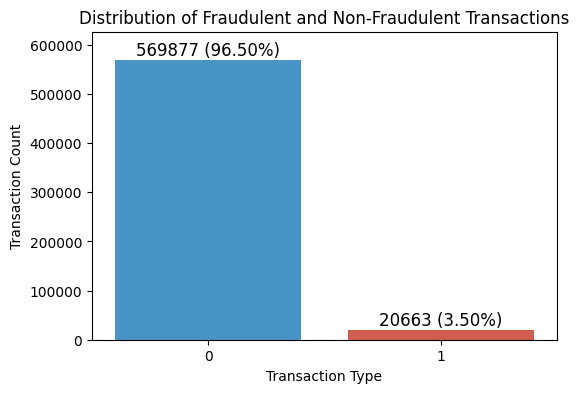

In [ ]:
# Analysis of the target column in train_data
fraud_counts = train_data['isFraud'].value_counts()
fraud_labels = ['0', '1']

# Calculate the percentage of each class
fraud_percentages = (fraud_counts / fraud_counts.sum()) * 100

# Plotting
plt.figure(figsize=(6, 4))
sns.barplot(x=fraud_labels, y=fraud_counts, palette=['#3498db', '#e74c3c'])

# Add counts and percentages on top of bars
for i, count in enumerate(fraud_counts):
    plt.text(i, count + 1000, f'{count} ({fraud_percentages[i]:.2f}%)',
             ha='center', va='bottom', fontsize=12, color='black')

# Customize the plot
plt.title('Distribution of Fraudulent and Non-Fraudulent Transactions')
plt.ylabel('Transaction Count')
plt.xlabel('Transaction Type')
plt.ylim(0, max(fraud_counts) * 1.1)  # Add some space above bars for text

plt.show()


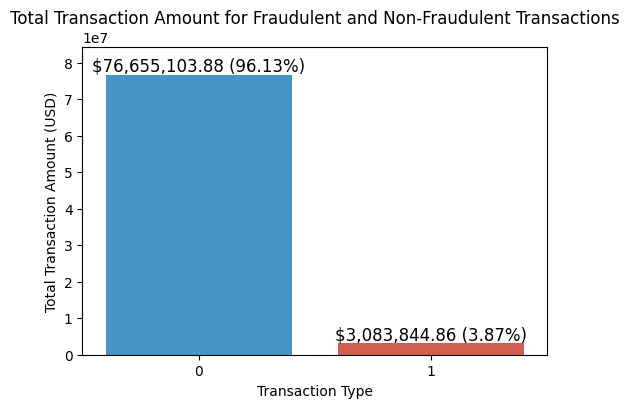

In [ ]:
# Calculate the sum of TransactionAmt for fraudulent and non-fraudulent transactions
amt_sums = train_data.groupby('isFraud')['TransactionAmt'].sum()
amt_labels = ['0', '1']

# Calculate the percentage for each class
amt_percentages = (amt_sums / amt_sums.sum()) * 100

# Plotting
plt.figure(figsize=(6, 4))
sns.barplot(x=amt_labels, y=amt_sums, palette=['#3498db', '#e74c3c'])

# Add sums and percentages on top of bars
for i, amt in enumerate(amt_sums):
    plt.text(i, amt + 10000, f'${amt:,.2f} ({amt_percentages[i]:.2f}%)',
             ha='center', va='bottom', fontsize=12, color='black')

# Customize the plot
plt.title('Total Transaction Amount for Fraudulent and Non-Fraudulent Transactions')
plt.ylabel('Total Transaction Amount (USD)')
plt.xlabel('Transaction Type')
plt.ylim(0, max(amt_sums) * 1.1)  # Add some space above bars for text

plt.show()

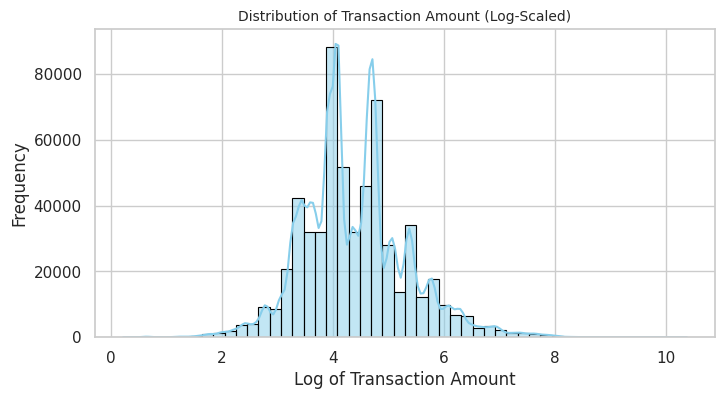

In [ ]:
# Transaction amount distribution plot

# Set the figure size and style for clarity
plt.figure(figsize=(8, 4))
sns.set(style="whitegrid")

# Apply a log transformation for better visualization of skewed data
train_data['LogTransactionAmt'] = np.log1p(train_data['TransactionAmt'])

# Plot the histogram and KDE of the log-transformed TransactionAmt
sns.histplot(train_data['LogTransactionAmt'], bins=50, kde=True, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Distribution of Transaction Amount (Log-Scaled)', fontsize=10)
plt.xlabel('Log of Transaction Amount')
plt.ylabel('Frequency')

# Show the plot
plt.show()

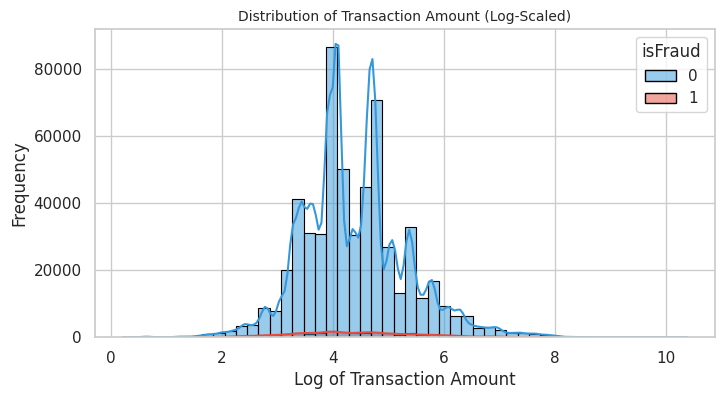

In [ ]:
# Set the figure size and style for clarity
plt.figure(figsize=(8, 4))
sns.set(style="whitegrid")

# Apply a log transformation for better visualization of skewed data
train_data['LogTransactionAmt'] = np.log1p(train_data['TransactionAmt'])

# Plot the histogram and KDE of the log-transformed TransactionAmt
sns.histplot(train_data, x='LogTransactionAmt', hue='isFraud', bins=50, kde=True,
             palette=['#3498db', '#e74c3c'], edgecolor='black')

# Add titles and labels
plt.title('Distribution of Transaction Amount (Log-Scaled)', fontsize=10)
plt.xlabel('Log of Transaction Amount')
plt.ylabel('Frequency')

# Show the plot
plt.show()

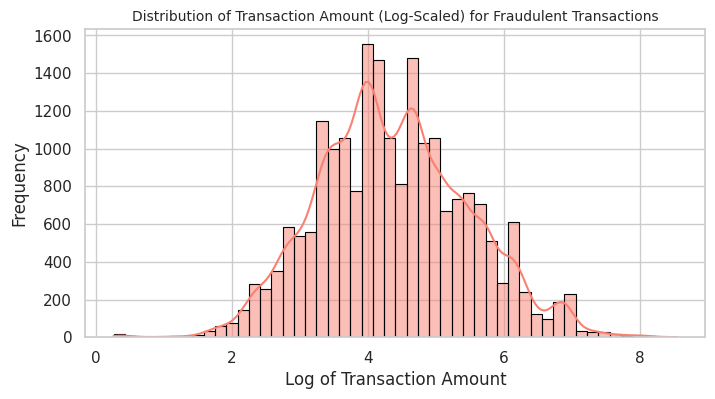

In [ ]:
# Filter for only fraudulent transactions
fraud_data = train_data[train_data['isFraud'] == 1]

# Apply a log transformation for better visualization of skewed data
fraud_data['LogTransactionAmt'] = np.log1p(fraud_data['TransactionAmt'])

# Set the figure size and style
plt.figure(figsize=(8, 4))
sns.set(style="whitegrid")

# Plot the histogram and KDE of the log-transformed TransactionAmt for fraudulent transactions
sns.histplot(fraud_data['LogTransactionAmt'], bins=50, kde=True, color='salmon', edgecolor='black')

# Add titles and labels
plt.title('Distribution of Transaction Amount (Log-Scaled) for Fraudulent Transactions', fontsize=10)
plt.xlabel('Log of Transaction Amount')
plt.ylabel('Frequency')

# Show the plot
plt.show()

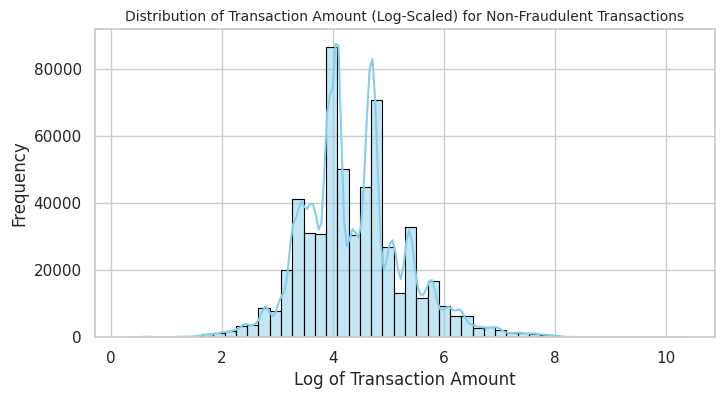

In [ ]:
# Filter for only fraudulent transactions
fraud_data = train_data[train_data['isFraud'] == 0]

# Apply a log transformation for better visualization of skewed data
fraud_data['LogTransactionAmt'] = np.log1p(fraud_data['TransactionAmt'])

# Set the figure size and style
plt.figure(figsize=(8, 4))
sns.set(style="whitegrid")

# Plot the histogram and KDE of the log-transformed TransactionAmt for fraudulent transactions
sns.histplot(fraud_data['LogTransactionAmt'], bins=50, kde=True, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Distribution of Transaction Amount (Log-Scaled) for Non-Fraudulent Transactions', fontsize=10)
plt.xlabel('Log of Transaction Amount')
plt.ylabel('Frequency')

# Show the plot
plt.show()

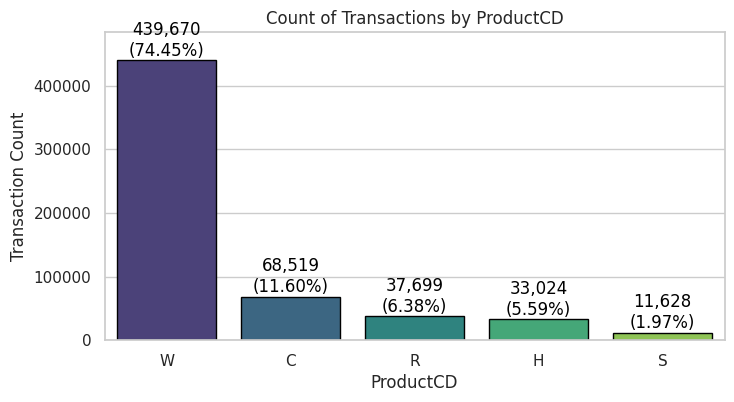

In [ ]:
# Calculate the count of each unique ProductCD value
product_counts = train_data['ProductCD'].value_counts()
product_labels = product_counts.index  # Unique ProductCD values

# Calculate the percentage of each ProductCD category's count relative to the total
product_percentages = (product_counts / product_counts.sum()) * 100

# Plotting
plt.figure(figsize=(8, 4))
sns.barplot(x=product_labels, y=product_counts, palette='viridis', edgecolor='black')

# Add counts and percentages on top of bars
for i, count in enumerate(product_counts):
    plt.text(i, count + 1000, f'{count:,}\n({product_percentages[i]:.2f}%)',
             ha='center', va='bottom', fontsize=12, color='black')

# Customize the plot
plt.title('Count of Transactions by ProductCD')
plt.ylabel('Transaction Count')
plt.xlabel('ProductCD')
plt.ylim(0, max(product_counts) * 1.1)  # Add some space above bars for text

plt.show()

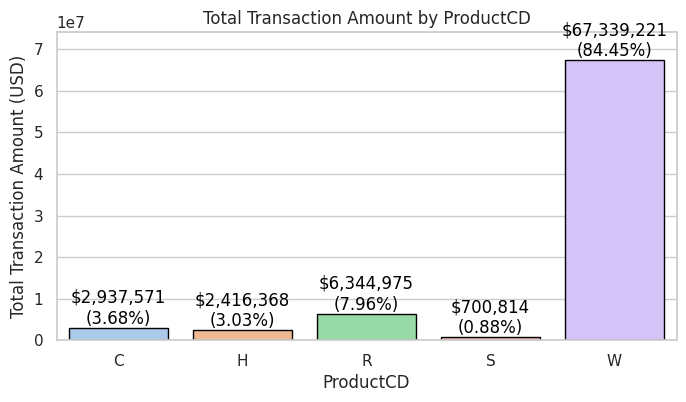

In [ ]:
# Calculate the sum of TransactionAmt for each unique ProductCD value
product_sums = train_data.groupby('ProductCD')['TransactionAmt'].sum()
product_labels = product_sums.index  # Unique ProductCD values

# Calculate the percentage of each ProductCD category's transaction amount relative to the total
product_percentages = (product_sums / product_sums.sum()) * 100

# Plotting
plt.figure(figsize=(8, 4))
sns.barplot(x=product_labels, y=product_sums, palette='pastel', edgecolor='black')

# Add sums and percentages on top of bars
for i, amt in enumerate(product_sums):
    plt.text(i, amt + 100000, f'${amt:,.0f}\n({product_percentages[i]:.2f}%)',
             ha='center', va='bottom', fontsize=12, color='black')

# Customize the plot
plt.title('Total Transaction Amount by ProductCD')
plt.ylabel('Total Transaction Amount (USD)')
plt.xlabel('ProductCD')
plt.ylim(0, max(product_sums) * 1.1)  # Add some space above bars for text

plt.show()

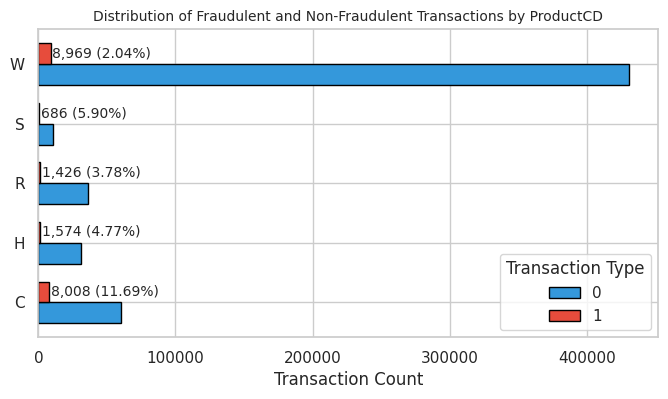

In [ ]:
# Count the fraudulent and non-fraudulent transactions for each ProductCD category
product_counts = train_data.groupby(['ProductCD', 'isFraud']).size().unstack(fill_value=0)
product_counts['Fraud_Percentage'] = (product_counts[1] / product_counts.sum(axis=1)) * 100

# Define bar width and positions
bar_width = 0.35
index = np.arange(len(product_counts))

# Set up the figure
fig, ax = plt.subplots(figsize=(8, 4))

# Plot horizontal bars for non-fraudulent and fraudulent counts
bars1 = ax.barh(index - bar_width / 2, product_counts[0], bar_width, label='0', color='#3498db', edgecolor='black')
bars2 = ax.barh(index + bar_width / 2, product_counts[1], bar_width, label='1', color='#e74c3c', edgecolor='black')

# Add annotations for fraudulent counts and percentages
for i, (fraud_count, fraud_pct) in enumerate(zip(product_counts[1], product_counts['Fraud_Percentage'])):
    ax.text(fraud_count + 1000, i + bar_width / 2, f'{fraud_count:,} ({fraud_pct:.2f}%)', va='center', fontsize=10)

# Customize the plot
ax.set_title('Distribution of Fraudulent and Non-Fraudulent Transactions by ProductCD', fontsize=10)
ax.set_xlabel('Transaction Count')
ax.set_yticks(index)
ax.set_yticklabels(product_counts.index)
ax.legend(title='Transaction Type')

plt.show()

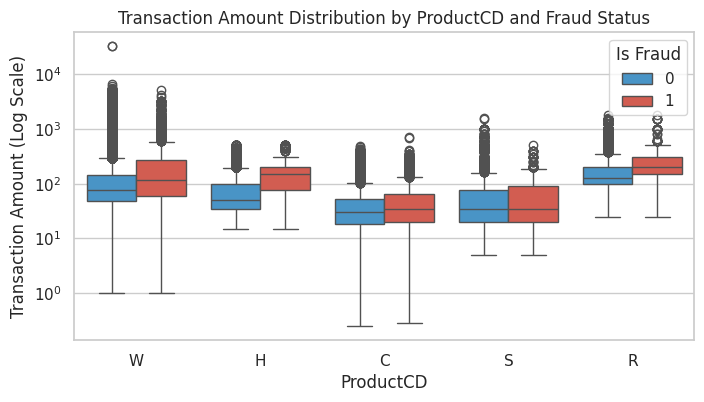

In [ ]:
plt.figure(figsize=(8, 4))

# Plot a box plot of TransactionAmt grouped by ProductCD and colored by isFraud
sns.boxplot(x='ProductCD', y='TransactionAmt', hue='isFraud', data=train_data, palette=['#3498db', '#e74c3c'])

# Customize the plot
plt.yscale('log')  # Log scale helps handle skewness in TransactionAmt
plt.title('Transaction Amount Distribution by ProductCD and Fraud Status')
plt.xlabel('ProductCD')
plt.ylabel('Transaction Amount (Log Scale)')
plt.legend(title='Is Fraud', loc='upper right')
plt.show()

#### Card Features (card1 - 6)

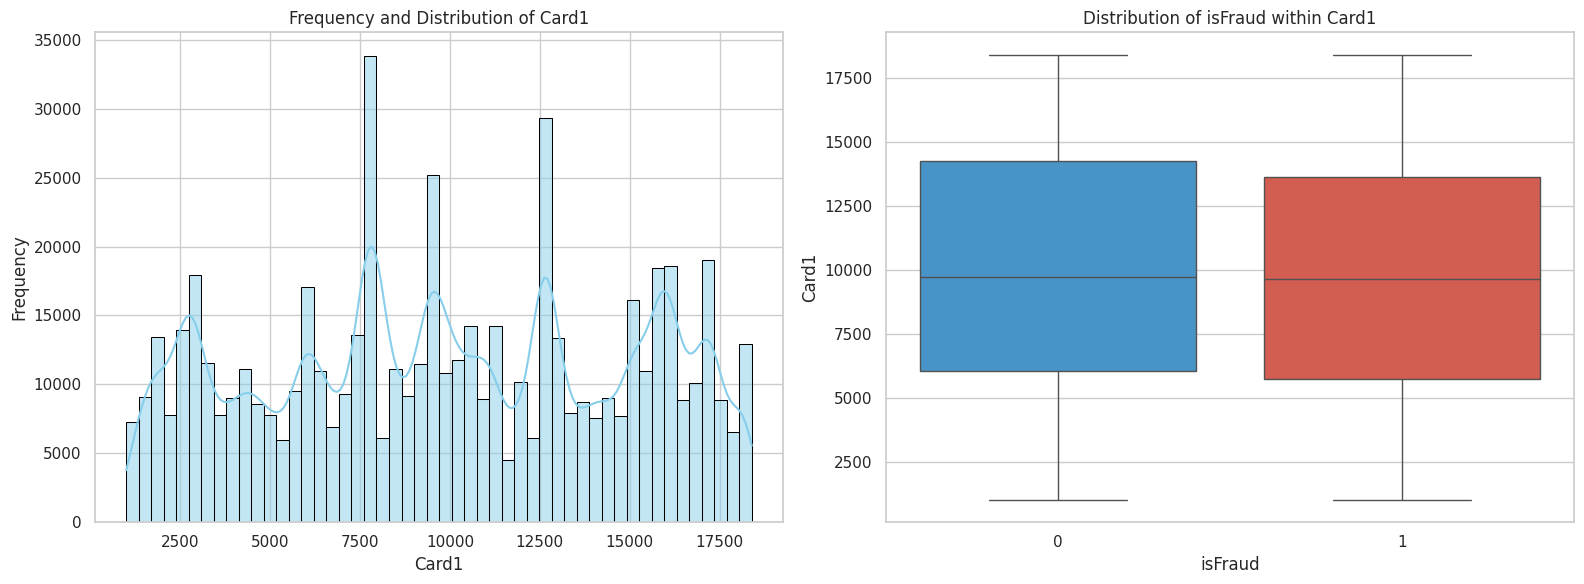

In [ ]:
# Set figure size for better readability
plt.figure(figsize=(16, 6))

# Plot 1: Frequency and distribution of Card1 values
plt.subplot(1, 2, 1)
sns.histplot(train_data['card1'], bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('Frequency and Distribution of Card1')
plt.xlabel('Card1')
plt.ylabel('Frequency')

# Plot 2: Distribution of isFraud within Card1
plt.subplot(1, 2, 2)
sns.boxplot(x='isFraud', y='card1', data=train_data, palette=['#3498db', '#e74c3c'])
plt.title('Distribution of isFraud within Card1')
plt.xlabel('isFraud')
plt.ylabel('Card1')

# Display the plots
plt.tight_layout()
plt.show()

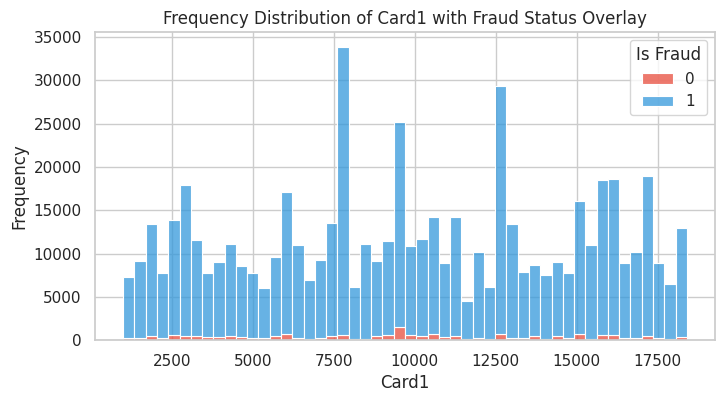

In [ ]:
plt.figure(figsize=(8, 4))

# Overlayed histogram with isFraud as hue
sns.histplot(data=train_data, x='card1', hue='isFraud', bins=50, kde=False, palette=['#3498db', '#e74c3c'], multiple='stack')

# Customize the plot
plt.title('Frequency Distribution of Card1 with Fraud Status Overlay')
plt.xlabel('Card1')
plt.ylabel('Frequency')
plt.legend(title='Is Fraud', labels=['0', '1'])

plt.show()

## Card2

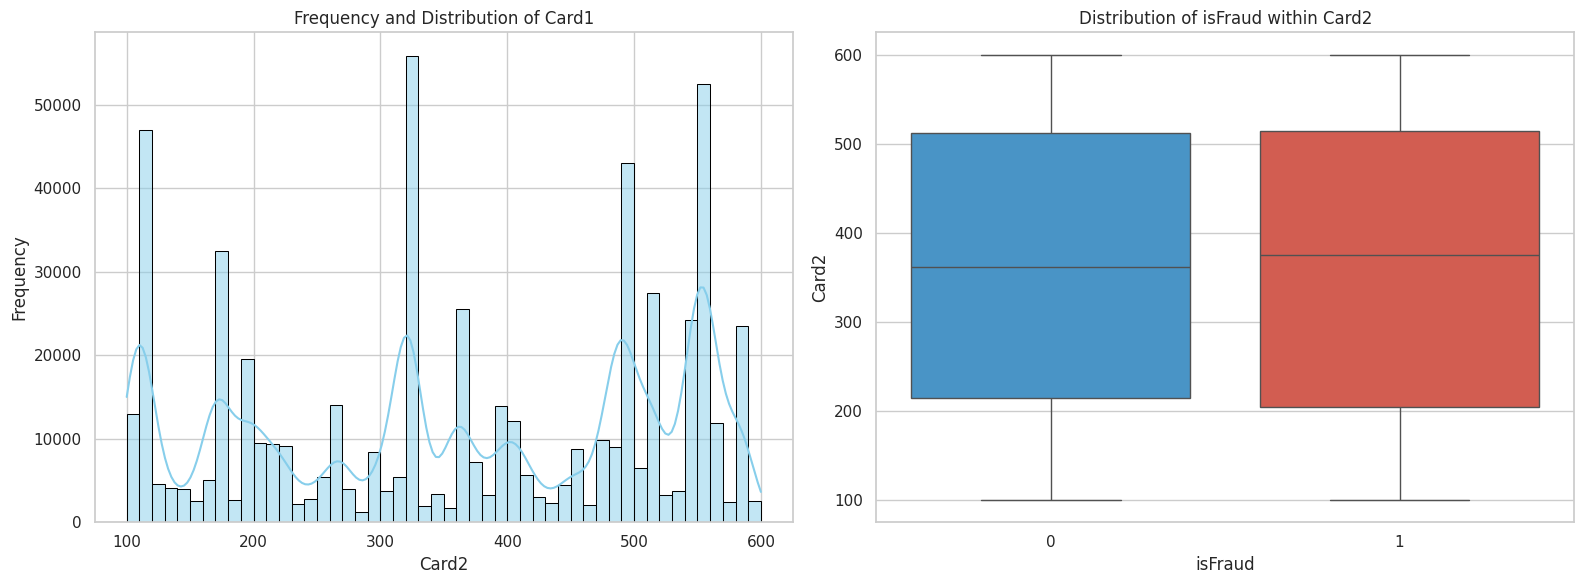

In [ ]:
# Set figure size for better readability
plt.figure(figsize=(16, 6))

# Plot 1: Frequency and distribution of Card2 values
plt.subplot(1, 2, 1)
sns.histplot(train_data['card2'], bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('Frequency and Distribution of Card1')
plt.xlabel('Card2')
plt.ylabel('Frequency')

# Plot 2: Distribution of isFraud within Card2
plt.subplot(1, 2, 2)
sns.boxplot(x='isFraud', y='card2', data=train_data, palette=['#3498db', '#e74c3c'])
plt.title('Distribution of isFraud within Card2')
plt.xlabel('isFraud')
plt.ylabel('Card2')

# Display the plots
plt.tight_layout()
plt.show()

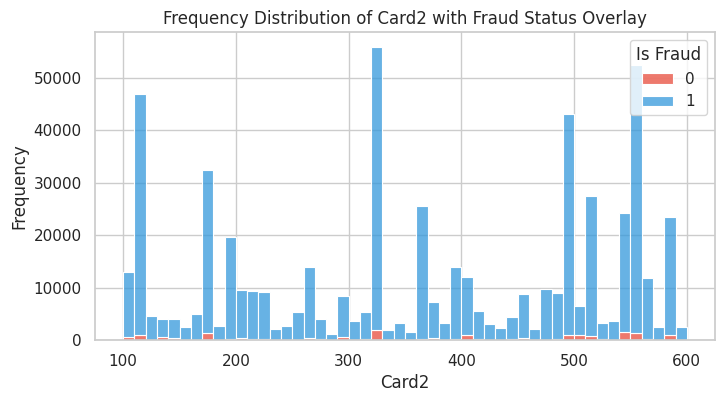

In [ ]:
plt.figure(figsize=(8, 4))

# Overlayed histogram with isFraud as hue
sns.histplot(data=train_data, x='card2', hue='isFraud', bins=50, kde=False, palette=['#3498db', '#e74c3c'], multiple='stack')

# Customize the plot
plt.title('Frequency Distribution of Card2 with Fraud Status Overlay')
plt.xlabel('Card2')
plt.ylabel('Frequency')
plt.legend(title='Is Fraud', labels=['0', '1'])

plt.show()

## Card3

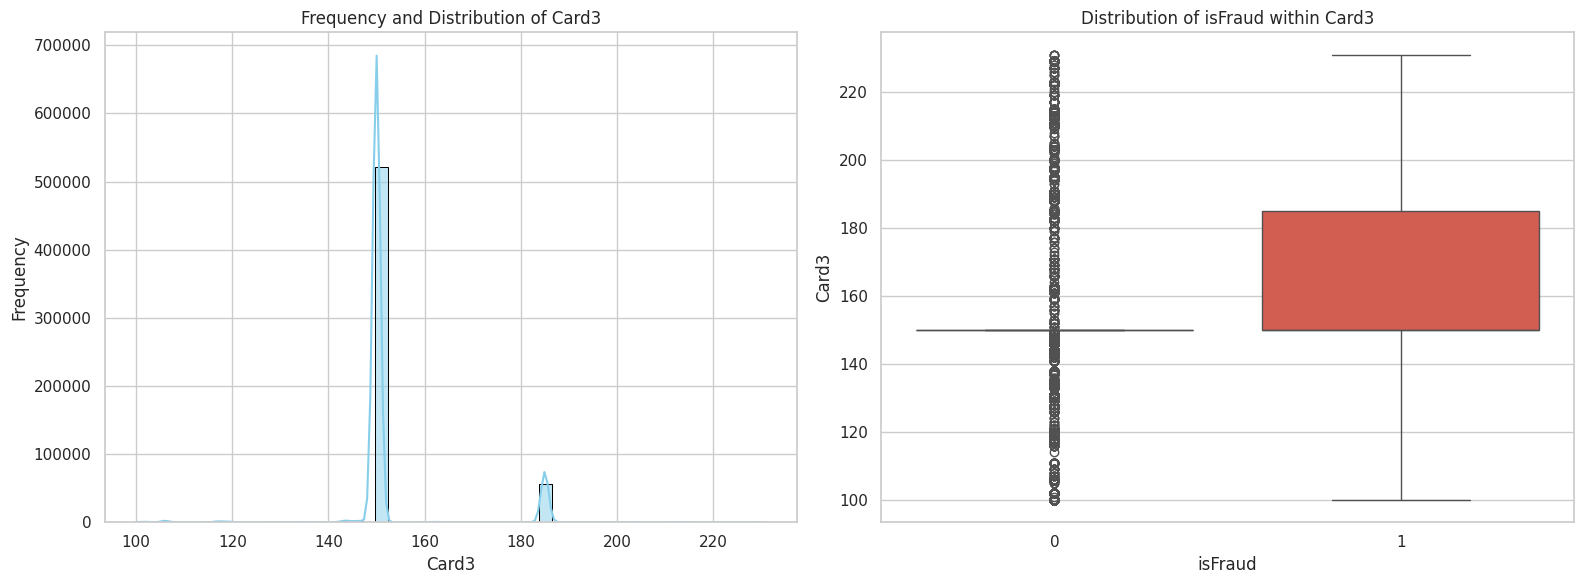

In [ ]:
# Set figure size for better readability
plt.figure(figsize=(16, 6))

# Plot 1: Frequency and distribution of Card3 values
plt.subplot(1, 2, 1)
sns.histplot(train_data['card3'], bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('Frequency and Distribution of Card3')
plt.xlabel('Card3')
plt.ylabel('Frequency')

# Plot 2: Distribution of isFraud within Card3
plt.subplot(1, 2, 2)
sns.boxplot(x='isFraud', y='card3', data=train_data, palette=['#3498db', '#e74c3c'])
plt.title('Distribution of isFraud within Card3')
plt.xlabel('isFraud')
plt.ylabel('Card3')

# Display the plots
plt.tight_layout()
plt.show()

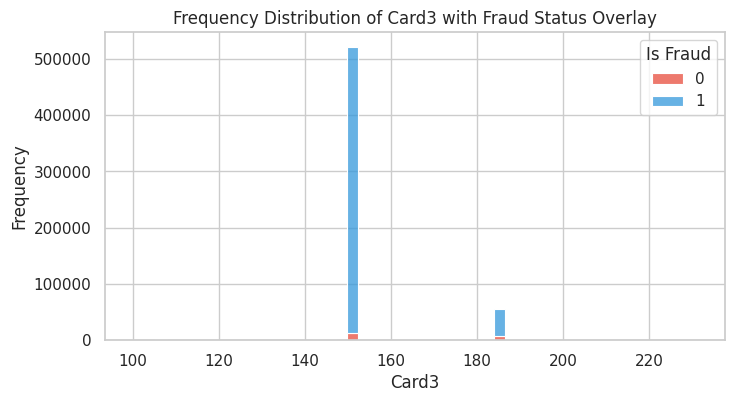

In [ ]:
plt.figure(figsize=(8, 4))

# Overlayed histogram with isFraud as hue
sns.histplot(data=train_data, x='card3', hue='isFraud', bins=50, kde=False, palette=['#3498db', '#e74c3c'], multiple='stack')

# Customize the plot
plt.title('Frequency Distribution of Card3 with Fraud Status Overlay')
plt.xlabel('Card3')
plt.ylabel('Frequency')
plt.legend(title='Is Fraud', labels=['0', '1'])

plt.show()

## Card4

Text(0, 0.5, 'Frequency')

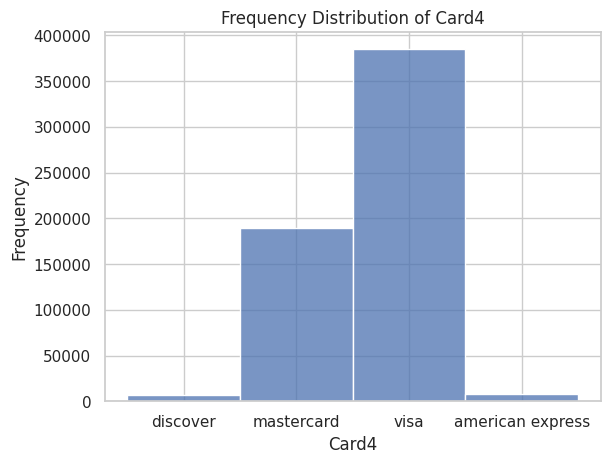

In [ ]:
# plot 2: Frequency distribution of Card4
sns.histplot(train_data['card4'])

plt.title('Frequency Distribution of Card4')
plt.xlabel('Card4')
plt.ylabel('Frequency')

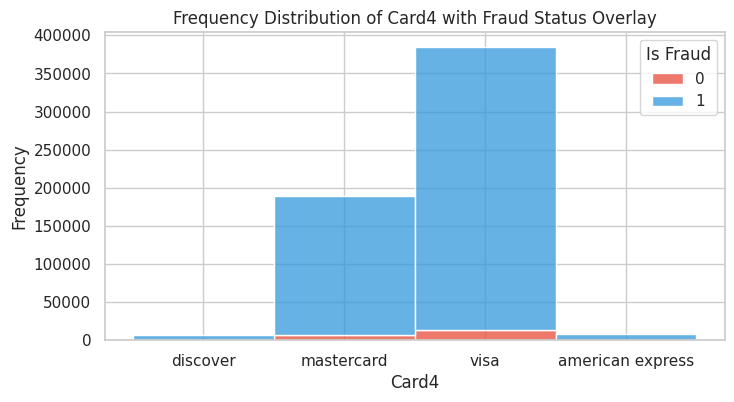

In [ ]:
plt.figure(figsize=(8, 4))

# Overlayed histogram with isFraud as hue
sns.histplot(data=train_data, x='card4', hue='isFraud', bins=50, kde=False, palette=['#3498db', '#e74c3c'], multiple='stack')

# Customize the plot
plt.title('Frequency Distribution of Card4 with Fraud Status Overlay')
plt.xlabel('Card4')
plt.ylabel('Frequency')
plt.legend(title='Is Fraud', labels=['0', '1'])

plt.show()

### Card5

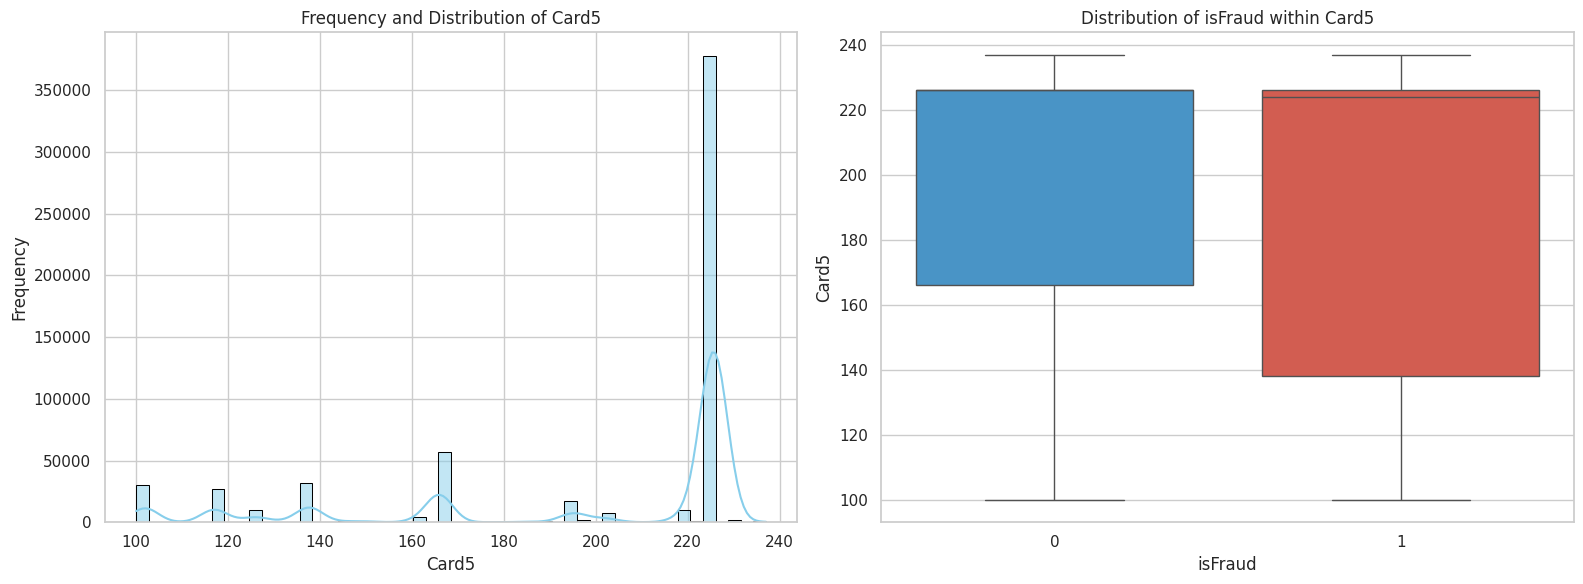

In [ ]:
# Set figure size for better readability
plt.figure(figsize=(16, 6))

# Plot 1: Frequency and distribution of Card5 values
plt.subplot(1, 2, 1)
sns.histplot(train_data['card5'], bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('Frequency and Distribution of Card5')
plt.xlabel('Card5')
plt.ylabel('Frequency')

# Plot 2: Distribution of isFraud within Card5
plt.subplot(1, 2, 2)
sns.boxplot(x='isFraud', y='card5', data=train_data, palette=['#3498db', '#e74c3c'])
plt.title('Distribution of isFraud within Card5')
plt.xlabel('isFraud')
plt.ylabel('Card5')

# Display the plots
plt.tight_layout()
plt.show()

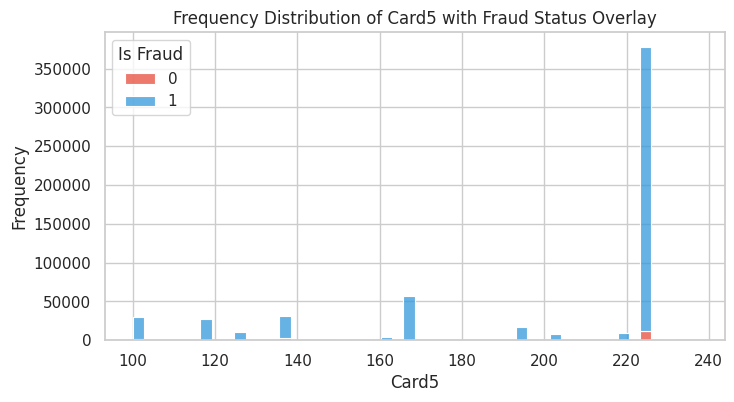

In [ ]:
plt.figure(figsize=(8, 4))

# Overlayed histogram with isFraud as hue
sns.histplot(data=train_data, x='card5', hue='isFraud', bins=50, kde=False, palette=['#3498db', '#e74c3c'], multiple='stack')

# Customize the plot
plt.title('Frequency Distribution of Card5 with Fraud Status Overlay')
plt.xlabel('Card5')
plt.ylabel('Frequency')
plt.legend(title='Is Fraud', labels=['0', '1'])

plt.show()

### Card6

Text(0, 0.5, 'Frequency')

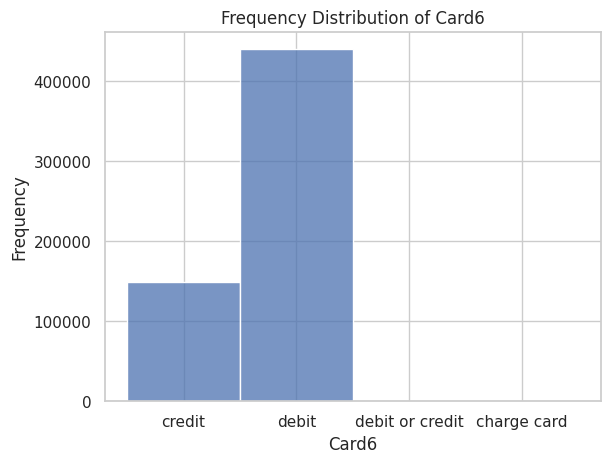

In [ ]:
# plot 2: Frequency distribution of Card4
sns.histplot(train_data['card6'])

plt.title('Frequency Distribution of Card6')
plt.xlabel('Card6')
plt.ylabel('Frequency')

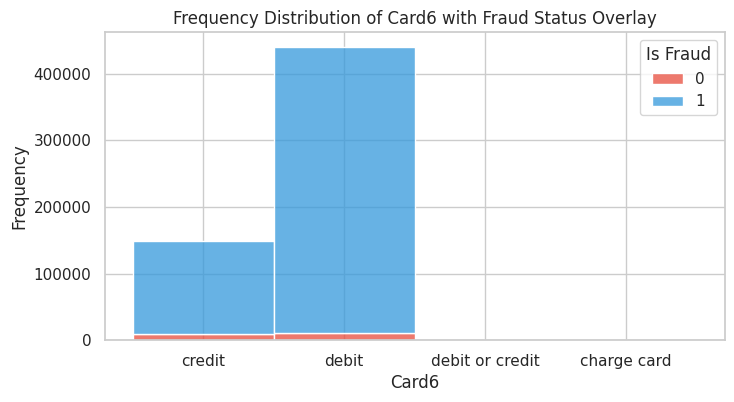

In [ ]:
plt.figure(figsize=(8, 4))

# Overlayed histogram with isFraud as hue
sns.histplot(data=train_data, x='card6', hue='isFraud', bins=50, kde=False, palette=['#3498db', '#e74c3c'], multiple='stack')

# Customize the plot
plt.title('Frequency Distribution of Card6 with Fraud Status Overlay')
plt.xlabel('Card6')
plt.ylabel('Frequency')
plt.legend(title='Is Fraud', labels=['0', '1'])

plt.show()

## Address Features

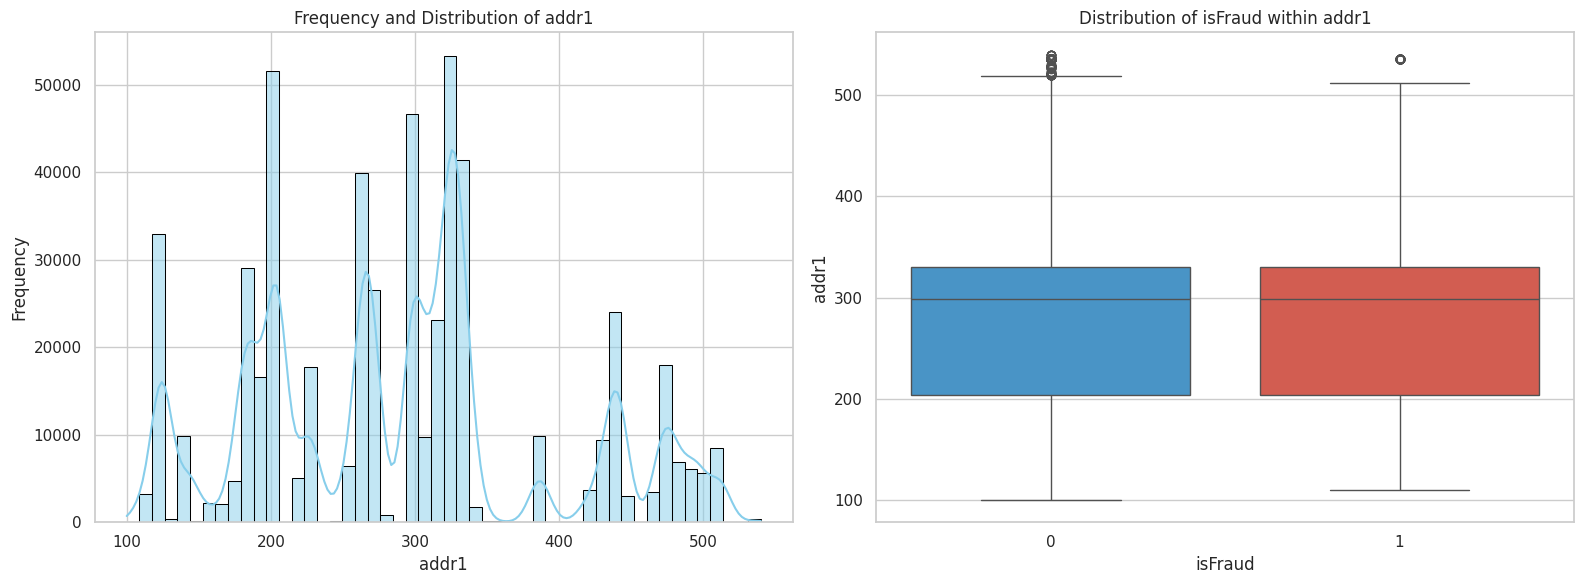

In [ ]:
# Set figure size for better readability
plt.figure(figsize=(16, 6))

# Plot 1: Frequency and distribution of Addr1 values
plt.subplot(1, 2, 1)
sns.histplot(train_data['addr1'], bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('Frequency and Distribution of addr1')
plt.xlabel('addr1')
plt.ylabel('Frequency')

# Plot 2: Distribution of isFraud within Addr1
plt.subplot(1, 2, 2)
sns.boxplot(x='isFraud', y='addr1', data=train_data, palette=['#3498db', '#e74c3c'])
plt.title('Distribution of isFraud within addr1')
plt.xlabel('isFraud')
plt.ylabel('addr1')

# Display the plots
plt.tight_layout()
plt.show()

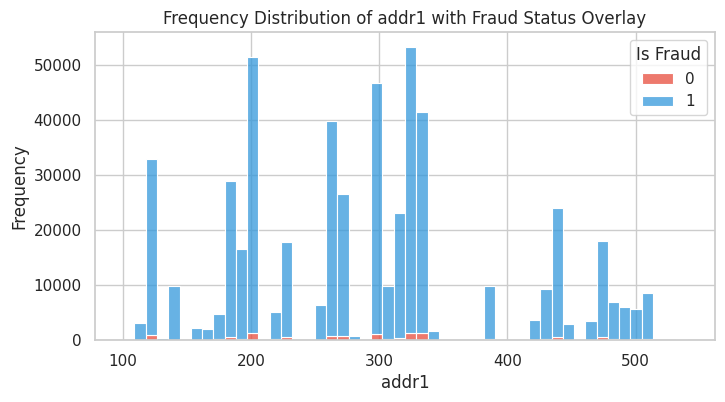

In [ ]:
plt.figure(figsize=(8, 4))

# Overlayed histogram with isFraud as hue
sns.histplot(data=train_data, x='addr1', hue='isFraud', bins=50, kde=False, palette=['#3498db', '#e74c3c'], multiple='stack')

# Customize the plot
plt.title('Frequency Distribution of addr1 with Fraud Status Overlay')
plt.xlabel('addr1')
plt.ylabel('Frequency')
plt.legend(title='Is Fraud', labels=['0', '1'])

plt.show()

### Addr2

Text(0, 0.5, 'Frequency')

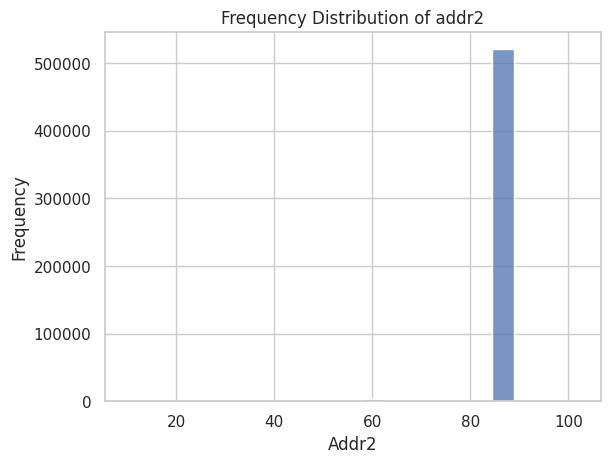

In [ ]:
# plot 2: Frequency distribution of Addr2
sns.histplot(train_data['addr2'])

plt.title('Frequency Distribution of addr2')
plt.xlabel('Addr2')
plt.ylabel('Frequency')

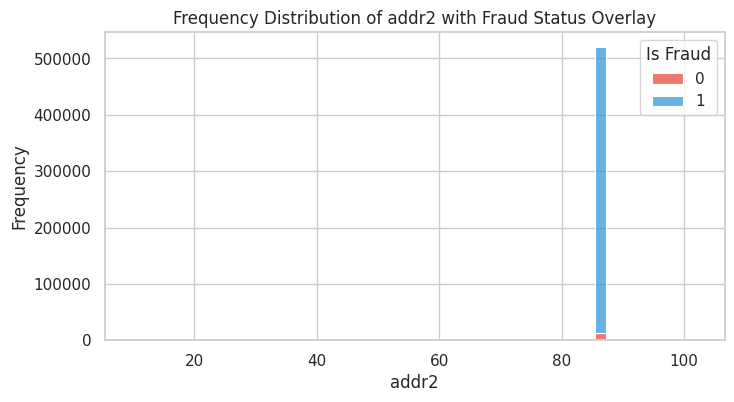

In [ ]:
plt.figure(figsize=(8, 4))

# Overlayed histogram with isFraud as hue
sns.histplot(data=train_data, x='addr2', hue='isFraud', bins=50, kde=False, palette=['#3498db', '#e74c3c'], multiple='stack')

# Customize the plot
plt.title('Frequency Distribution of addr2 with Fraud Status Overlay')
plt.xlabel('addr2')
plt.ylabel('Frequency')
plt.legend(title='Is Fraud', labels=['0', '1'])

plt.show()

## E-mail Domains

#### P_emaildomain

Text(0, 0.5, 'P_emaildomain')

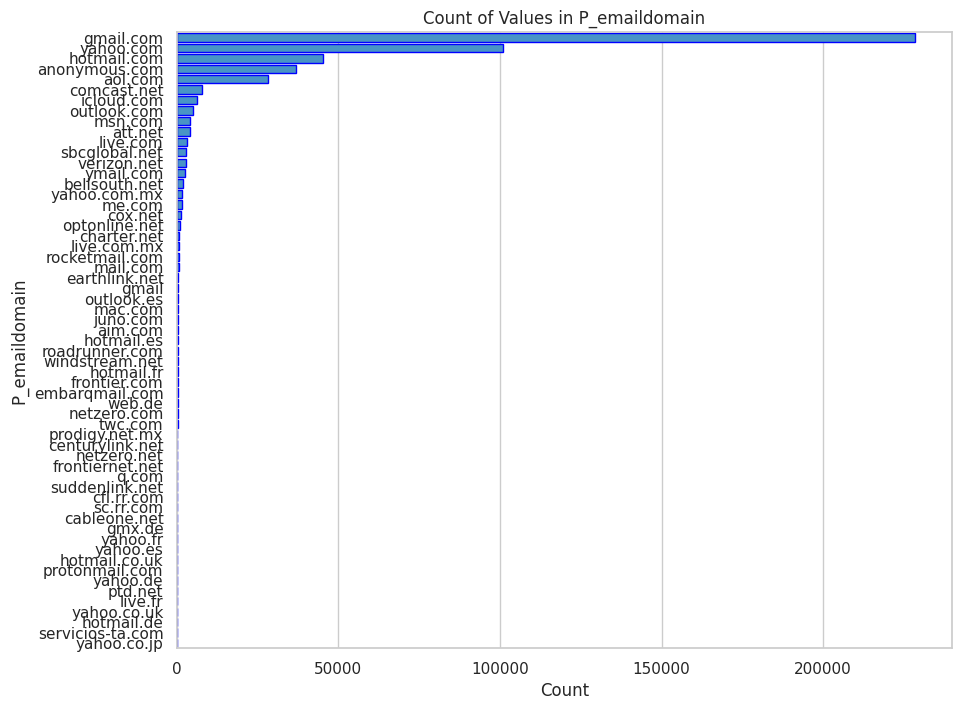

In [ ]:
# Count the occurrences of each value in P_emaildomain
email_counts = train_data['P_emaildomain'].value_counts()

# Set the figure size
plt.figure(figsize=(10, 8))

# Plot the horizontal bar chart
sns.barplot(y=email_counts.index, x=email_counts.values,palette=['#3498db'], edgecolor='blue')

# Customize the plot
plt.title('Count of Values in P_emaildomain')
plt.xlabel('Count')
plt.ylabel('P_emaildomain')

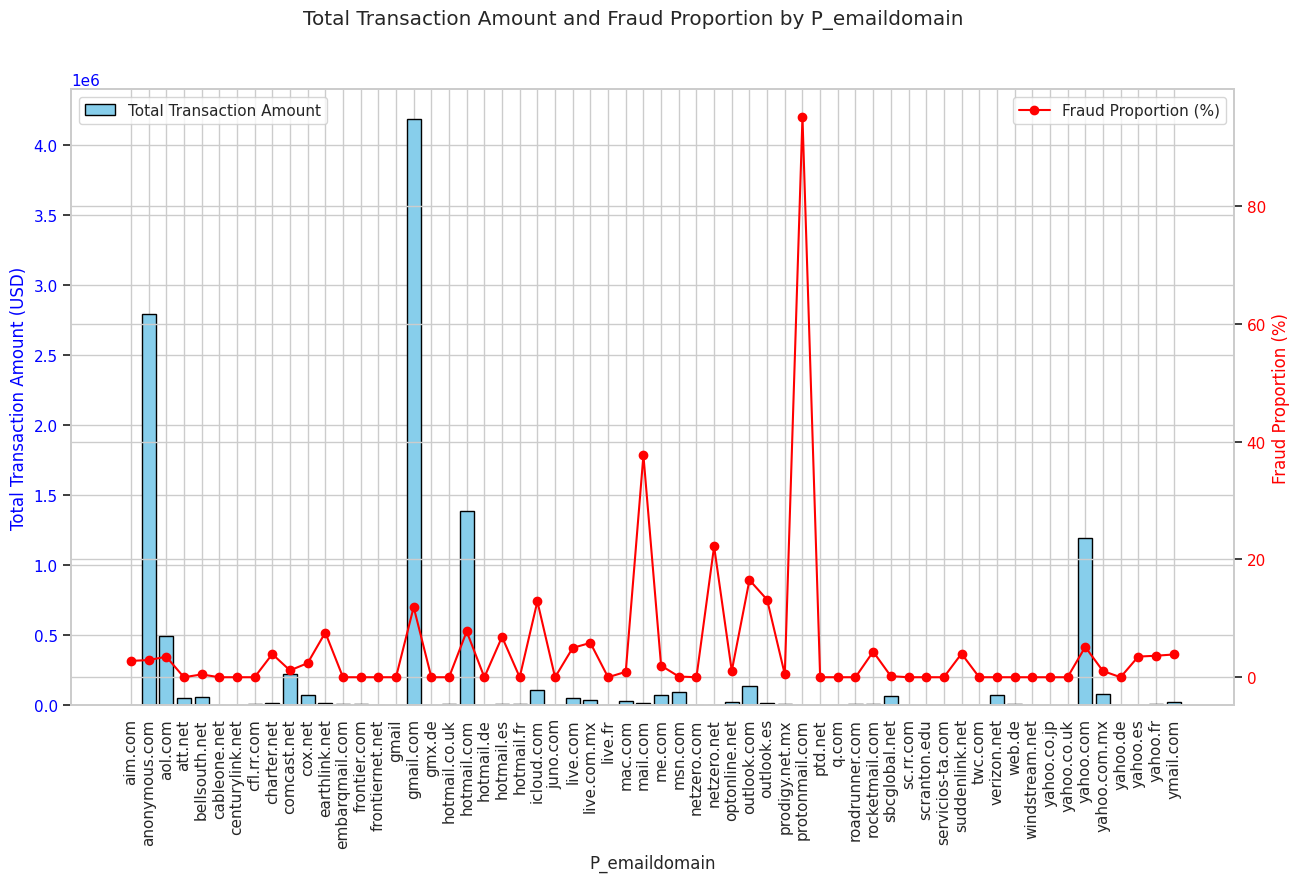

In [ ]:
# Group by R_emaildomain and calculate total transaction amount and fraud proportion
email_amt_sum = train_data.groupby('R_emaildomain')['TransactionAmt'].sum()  # Total transaction amount
email_fraud_prop = train_data.groupby('R_emaildomain')['isFraud'].mean() * 100  # Fraud proportion in percentage

# Plotting
fig, ax1 = plt.subplots(figsize=(15, 8))  # Adjusted figure size for better readability

# Bar plot for transaction amount
ax1.bar(email_amt_sum.index, email_amt_sum.values, color='skyblue', edgecolor='black', label='Total Transaction Amount')
ax1.set_xlabel('P_emaildomain')
ax1.set_ylabel('Total Transaction Amount (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Rotate x-axis labels to vertical for readability
plt.xticks(rotation=90)

# Secondary y-axis for fraud proportion
ax2 = ax1.twinx()
ax2.plot(email_fraud_prop.index, email_fraud_prop.values, color='red', marker='o', label='Fraud Proportion (%)')
ax2.set_ylabel('Fraud Proportion (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add title and legends
fig.suptitle('Total Transaction Amount and Fraud Proportion by P_emaildomain')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

### R_emaildomain

Text(0, 0.5, 'R_emaildomain')

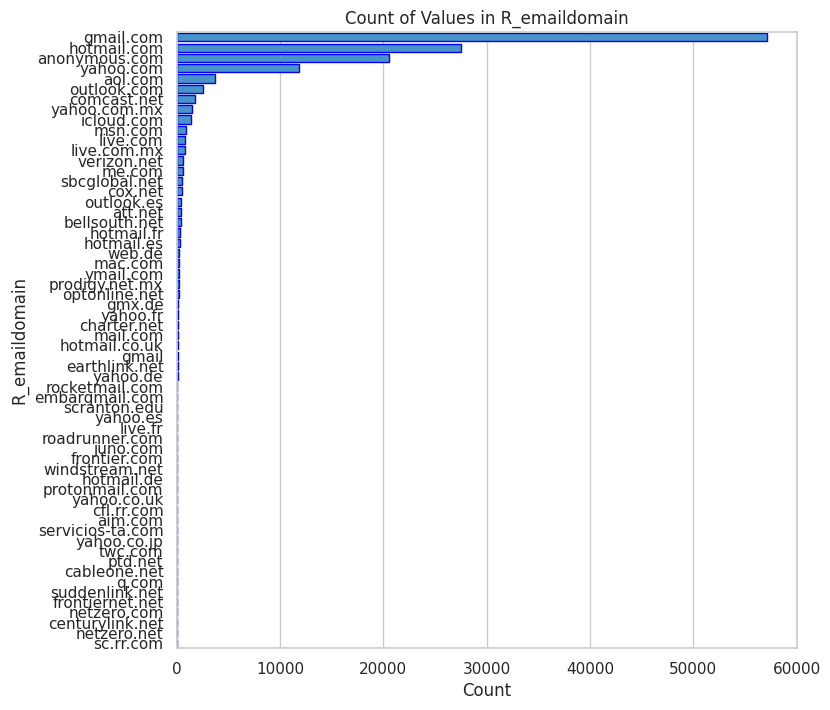

In [ ]:
# Count the occurrences of each value in P_emaildomain
email_counts = train_data['R_emaildomain'].value_counts()

# Set the figure size
plt.figure(figsize=(8, 8))

# Plot the horizontal bar chart
sns.barplot(y=email_counts.index, x=email_counts.values,palette=['#3498db'], edgecolor='blue')

# Customize the plot
plt.title('Count of Values in R_emaildomain')
plt.xlabel('Count')
plt.ylabel('R_emaildomain')

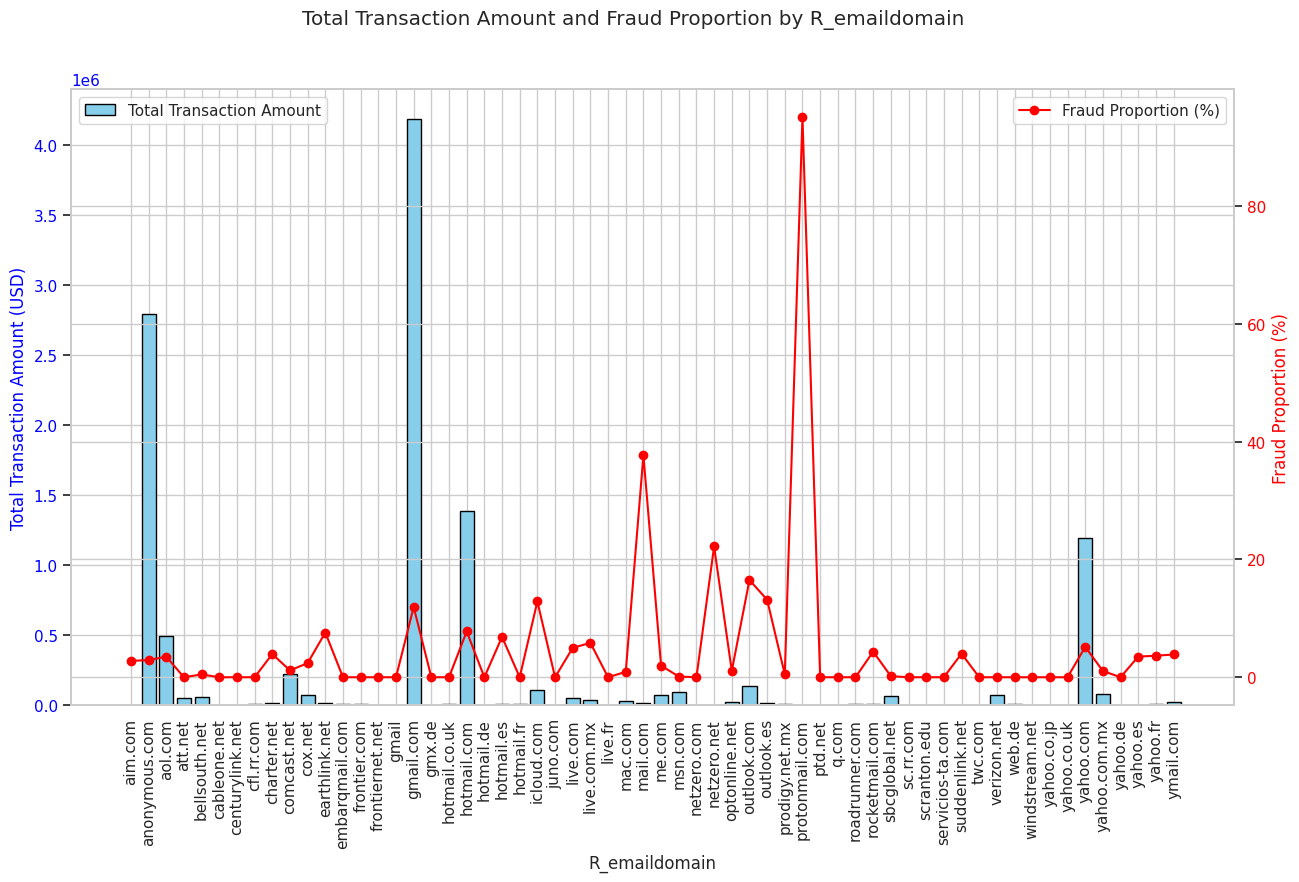

In [ ]:

# Group by R_emaildomain and calculate total transaction amount and fraud proportion
email_amt_sum = train_data.groupby('R_emaildomain')['TransactionAmt'].sum()  # Total transaction amount
email_fraud_prop = train_data.groupby('R_emaildomain')['isFraud'].mean() * 100  # Fraud proportion in percentage

# Plotting
fig, ax1 = plt.subplots(figsize=(15, 8))  # Adjusted figure size for better readability

# Bar plot for transaction amount
ax1.bar(email_amt_sum.index, email_amt_sum.values, color='skyblue', edgecolor='black', label='Total Transaction Amount')
ax1.set_xlabel('R_emaildomain')
ax1.set_ylabel('Total Transaction Amount (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Rotate x-axis labels to vertical for readability
plt.xticks(rotation=90)

# Secondary y-axis for fraud proportion
ax2 = ax1.twinx()
ax2.plot(email_fraud_prop.index, email_fraud_prop.values, color='red', marker='o', label='Fraud Proportion (%)')
ax2.set_ylabel('Fraud Proportion (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add title and legends
fig.suptitle('Total Transaction Amount and Fraud Proportion by R_emaildomain')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

## M FEATURES (M1-M9)

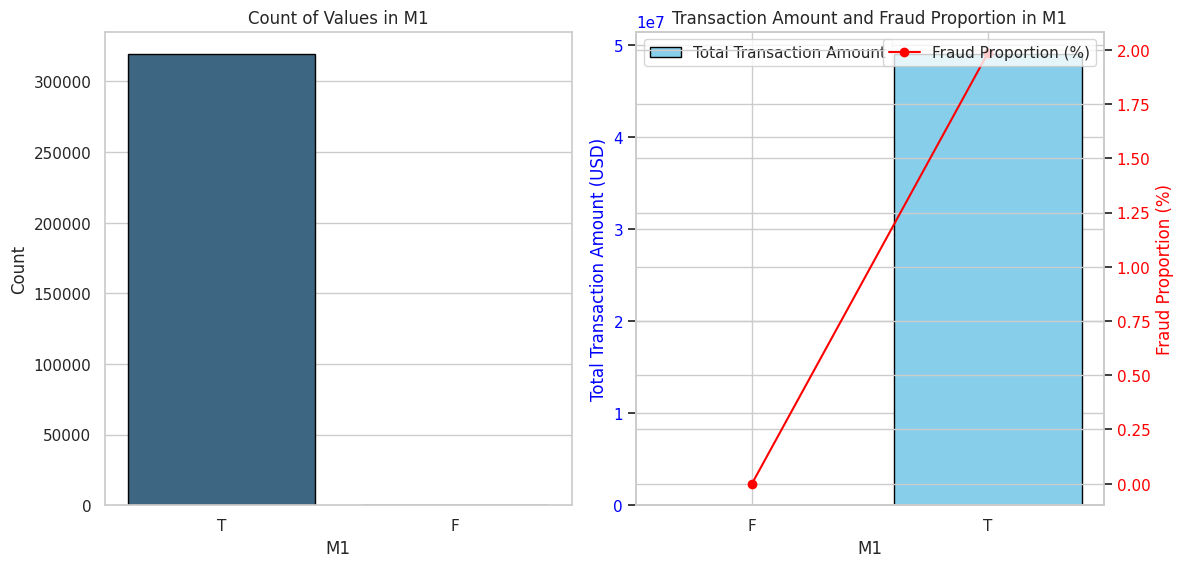

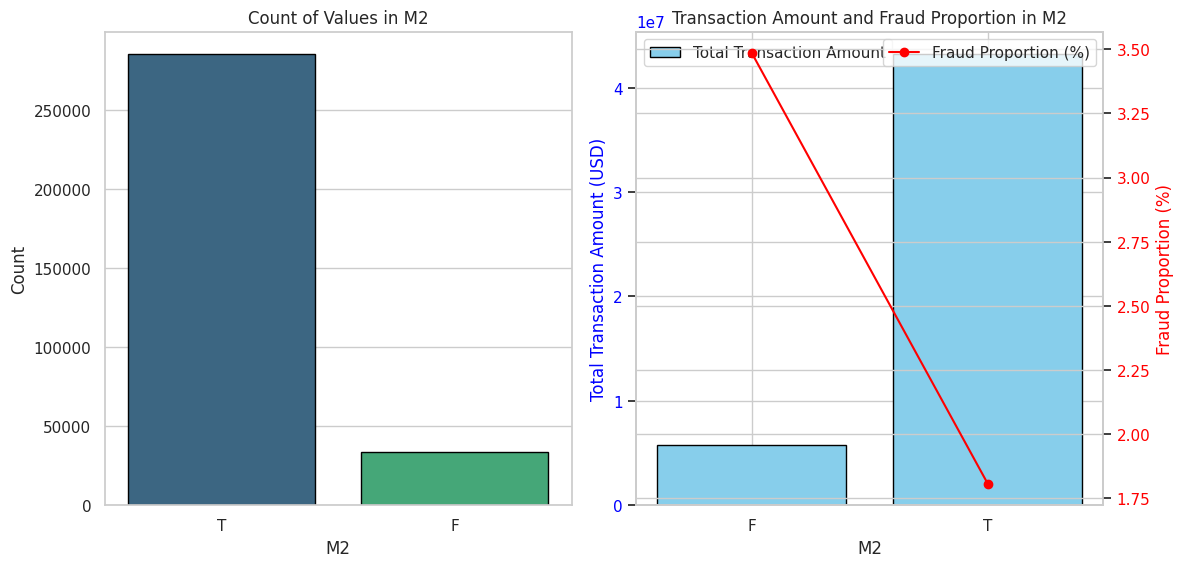

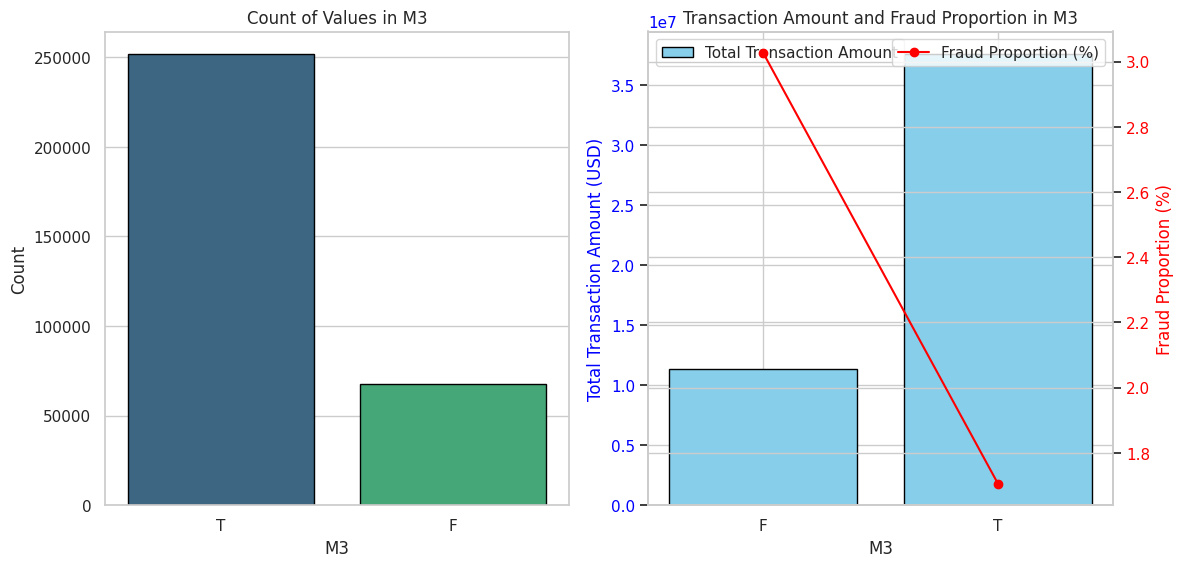

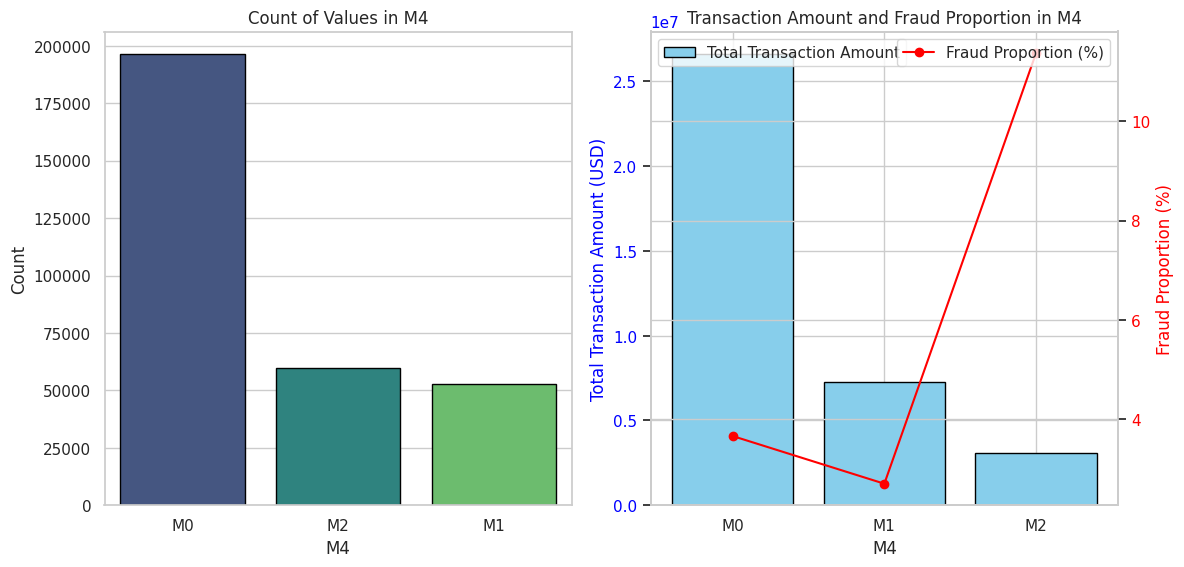

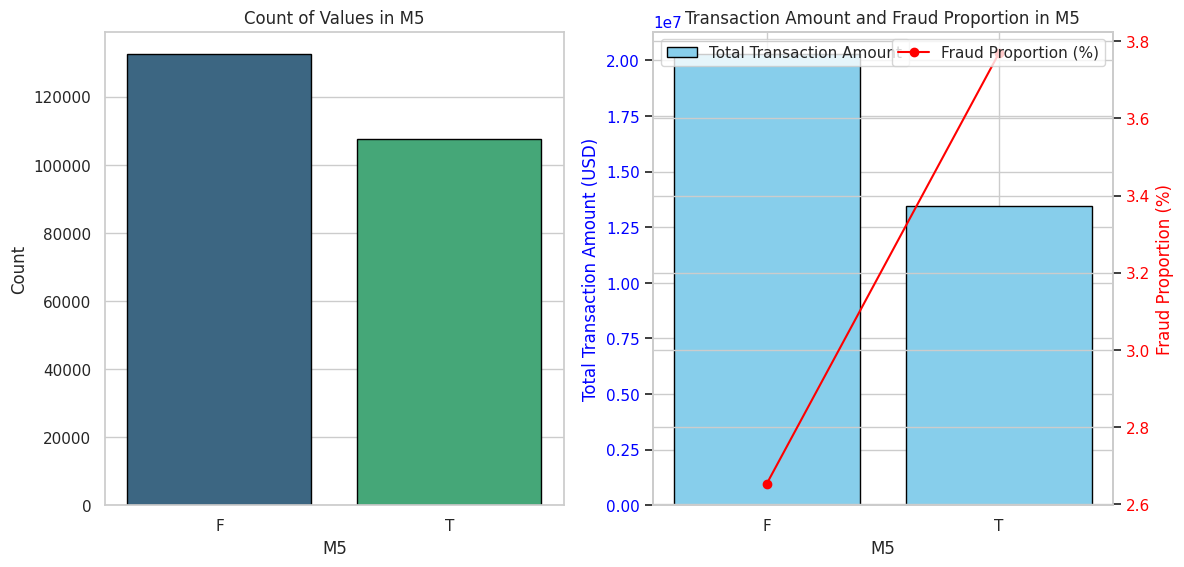

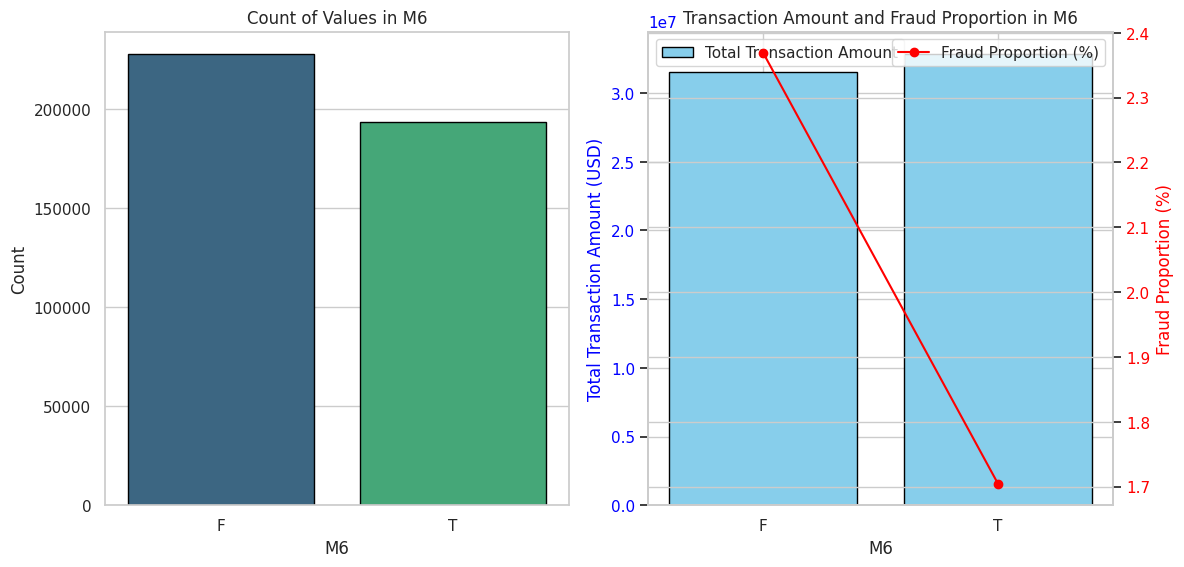

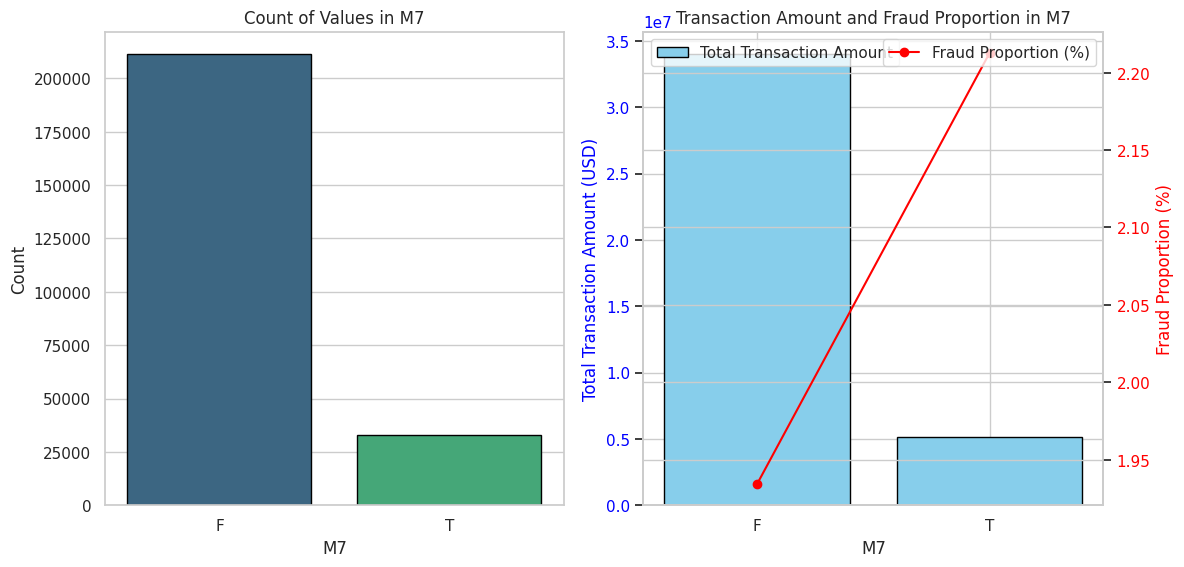

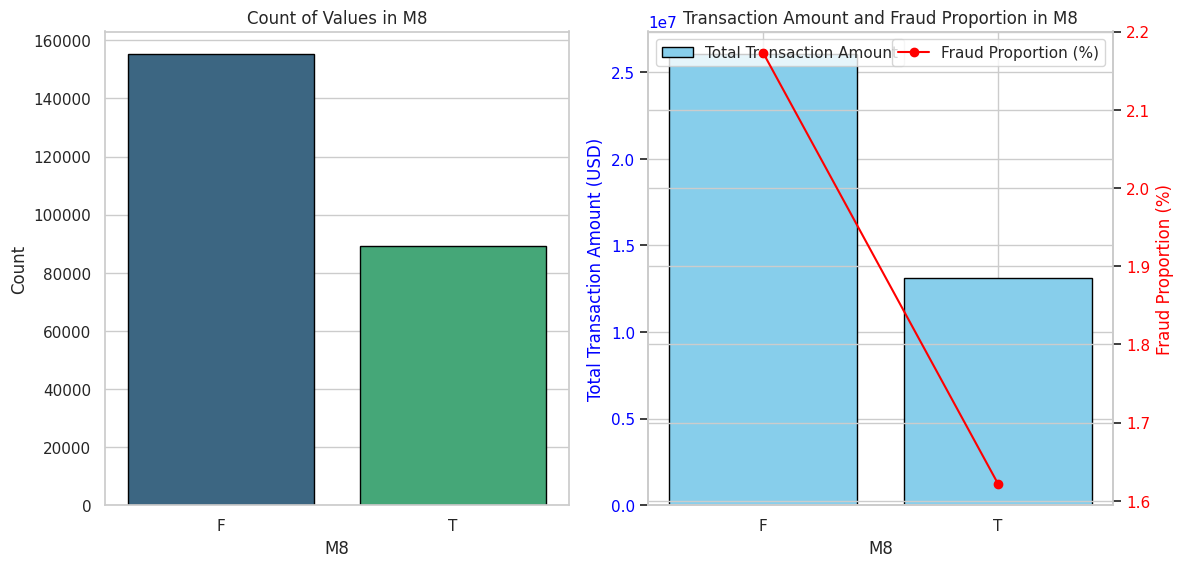

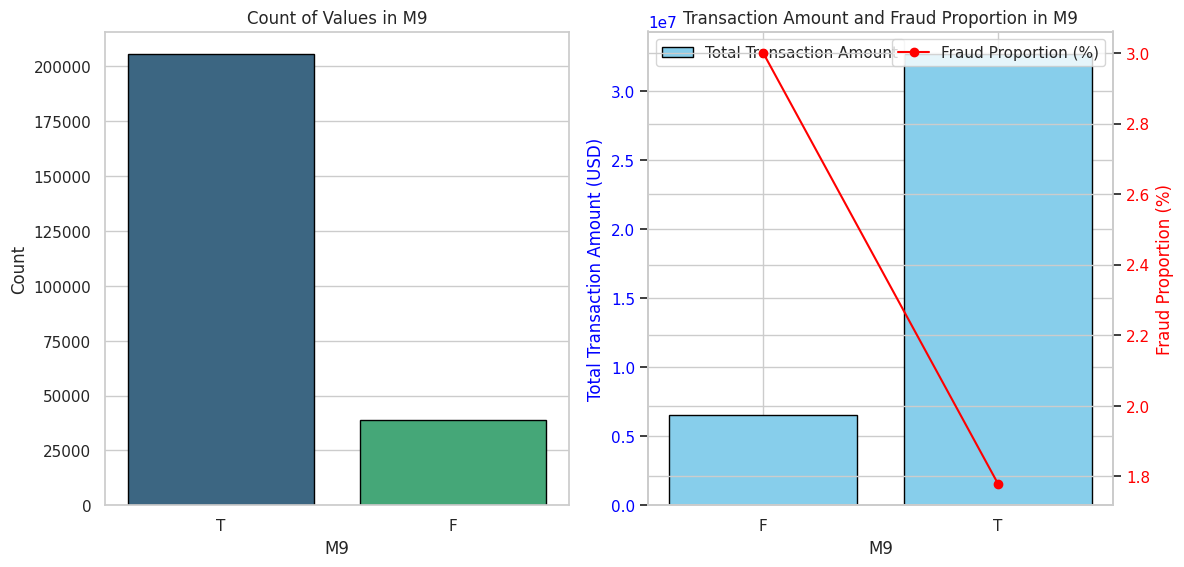

In [ ]:
# Function to plot two charts for a given M feature
def plot_m_feature_distributions(feature_name):
    # Count of each variable in the M feature
    feature_counts = train_data[feature_name].value_counts()

    # Total transaction amount and fraud proportion for each variable in the M feature
    feature_amt_sum = train_data.groupby(feature_name)['TransactionAmt'].sum()
    feature_fraud_prop = train_data.groupby(feature_name)['isFraud'].mean() * 100  # Fraud proportion as percentage

    # Plotting
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot 1: Count plot for the M feature
    sns.barplot(x=feature_counts.index, y=feature_counts.values, palette="viridis", ax=axes[0], edgecolor='black')
    axes[0].set_title(f'Count of Values in {feature_name}')
    axes[0].set_xlabel(feature_name)
    axes[0].set_ylabel('Count')

    # Plot 2: Bar and line plot for Transaction Amount and Fraud Proportion
    axes[1].bar(feature_amt_sum.index, feature_amt_sum.values, color='skyblue', edgecolor='black', label='Total Transaction Amount')
    axes[1].set_xlabel(feature_name)
    axes[1].set_ylabel('Total Transaction Amount (USD)', color='blue')
    axes[1].tick_params(axis='y', labelcolor='blue')

    # Secondary y-axis for fraud proportion
    ax2 = axes[1].twinx()
    ax2.plot(feature_fraud_prop.index, feature_fraud_prop.values, color='red', marker='o', label='Fraud Proportion (%)')
    ax2.set_ylabel('Fraud Proportion (%)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Titles and Legends
    axes[1].set_title(f'Transaction Amount and Fraud Proportion in {feature_name}')
    axes[1].legend(loc='upper left')
    ax2.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

# Loop through M1 to M9 and plot the charts for each feature
for feature in [f'M{i}' for i in range(1, 10)]:
    plot_m_feature_distributions(feature)

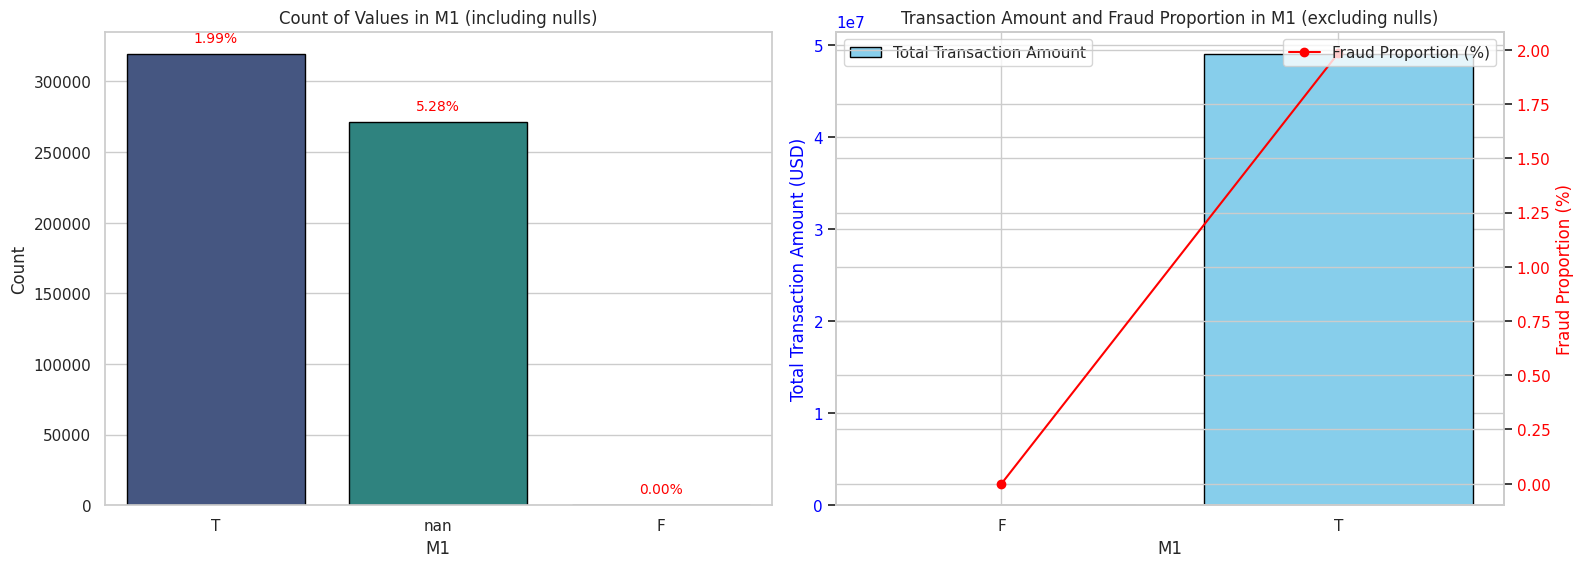

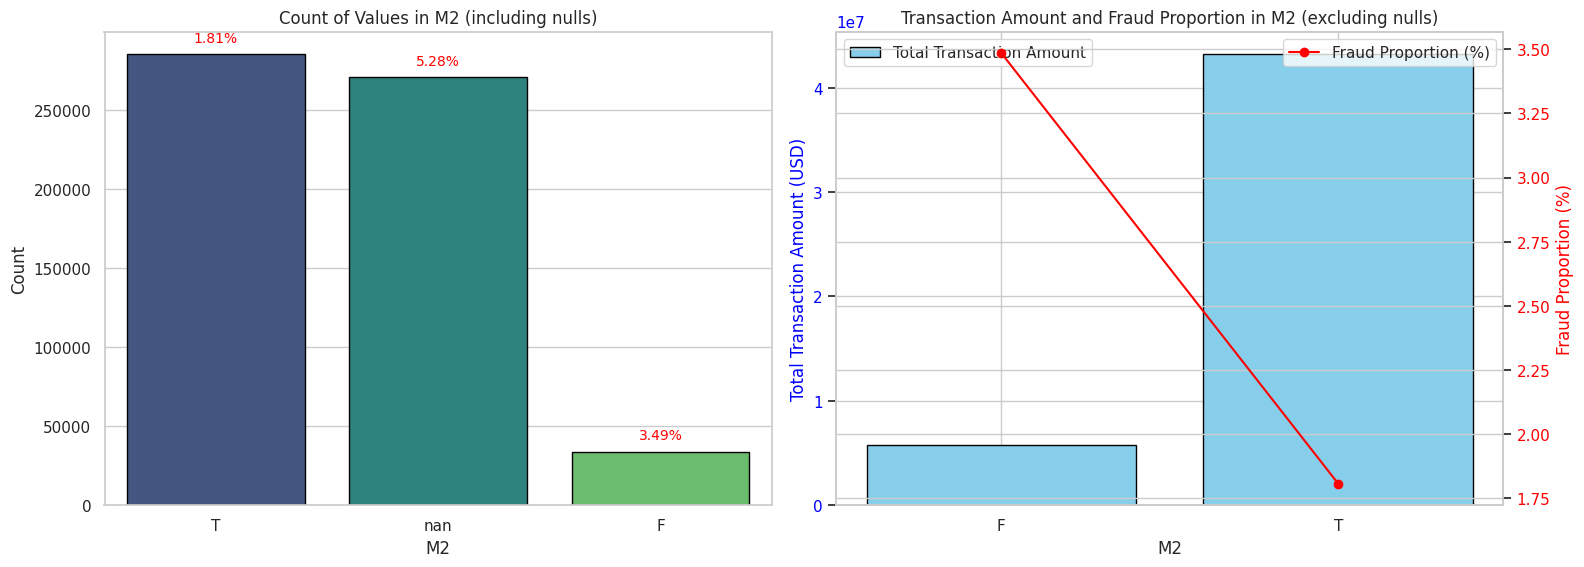

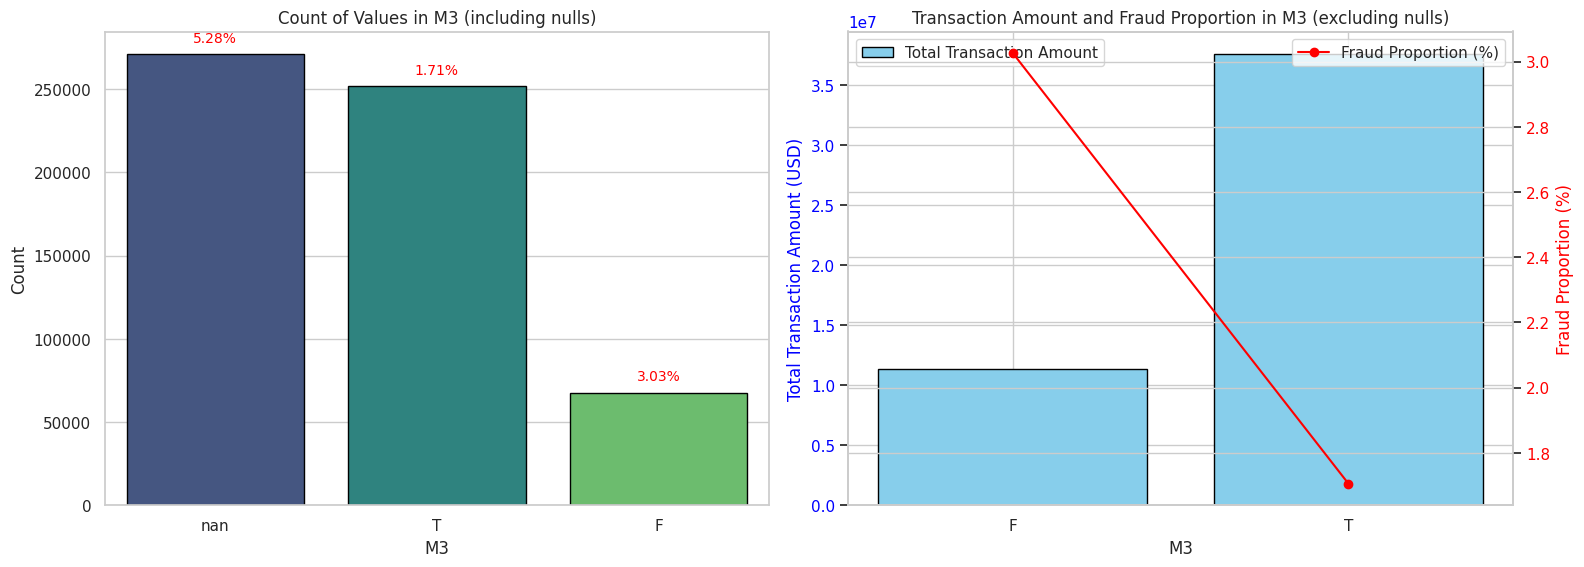

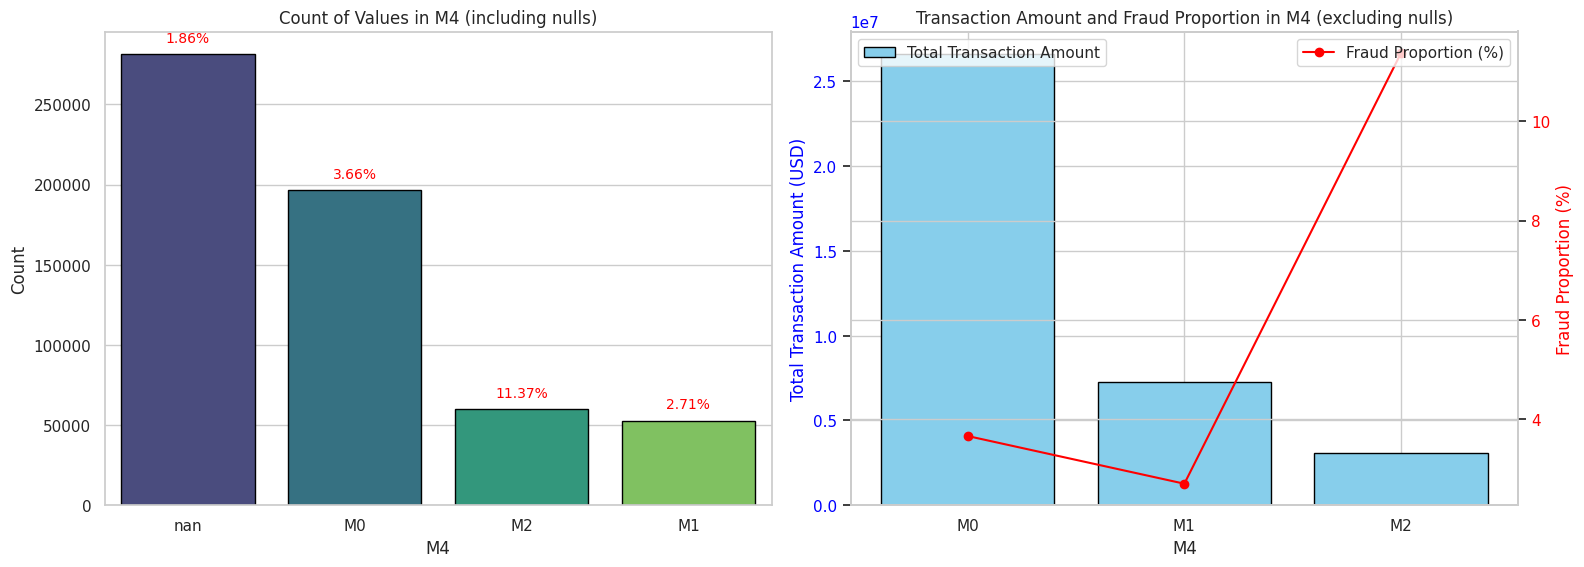

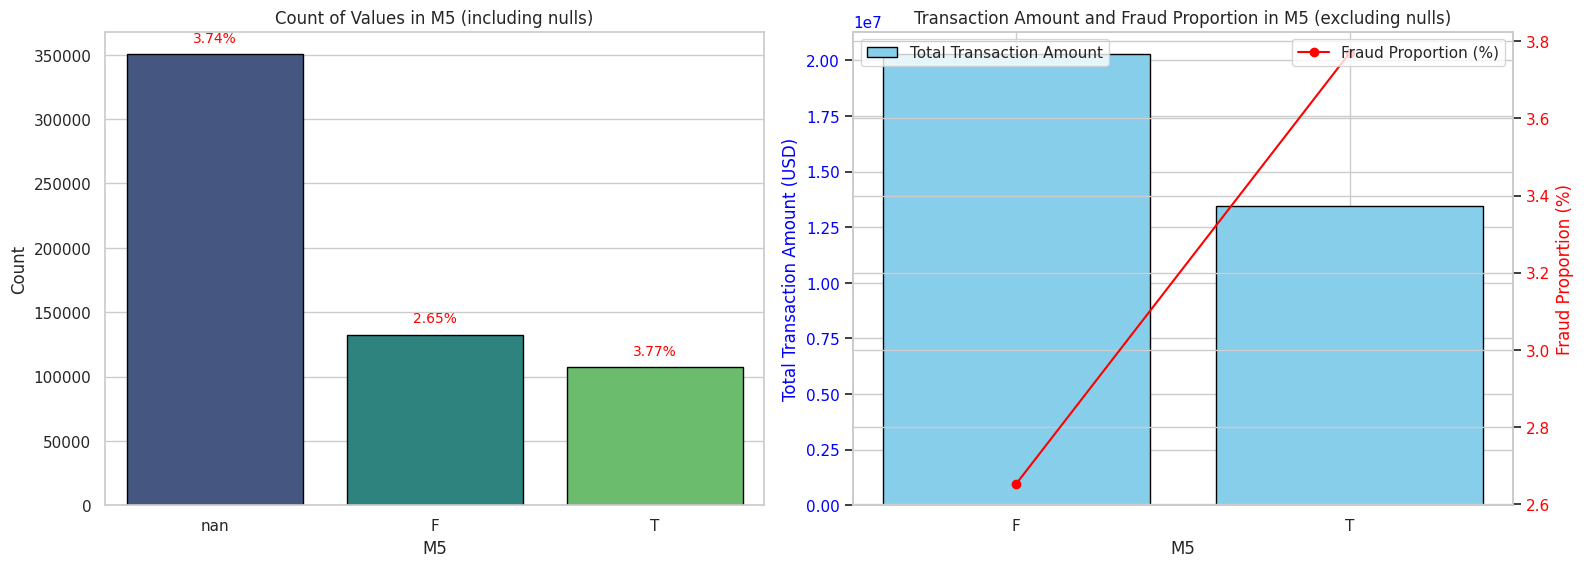

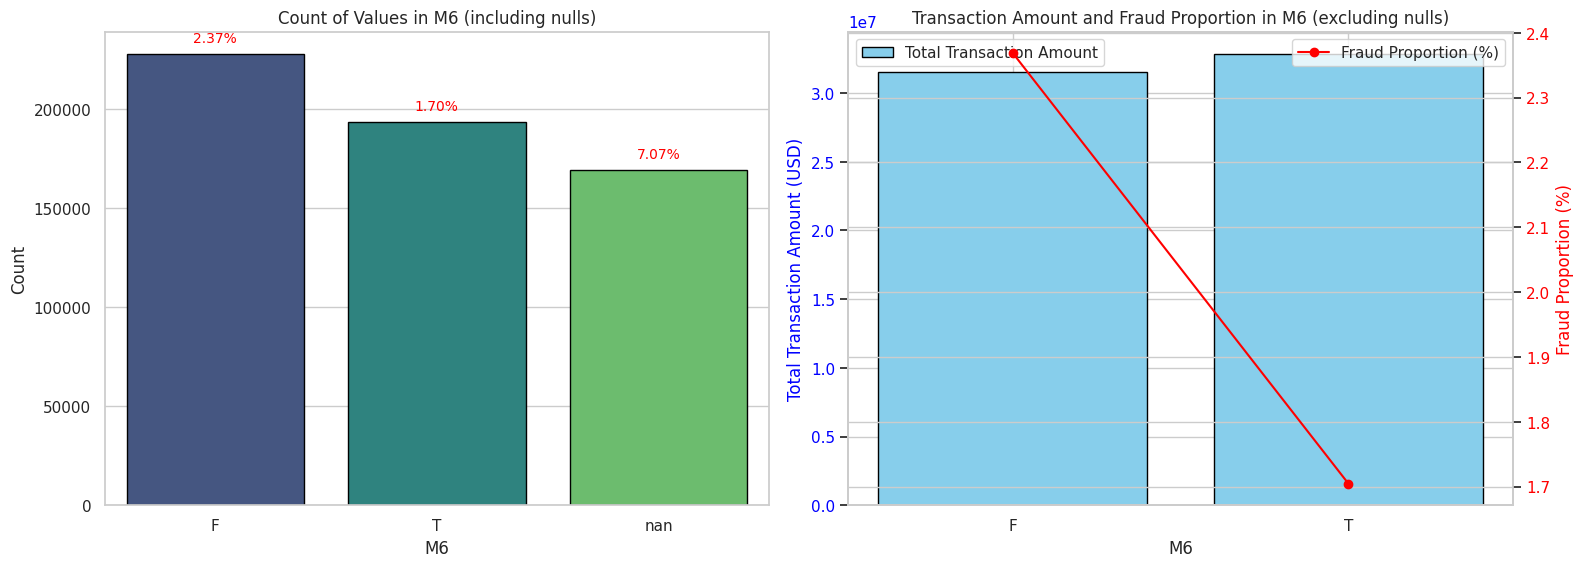

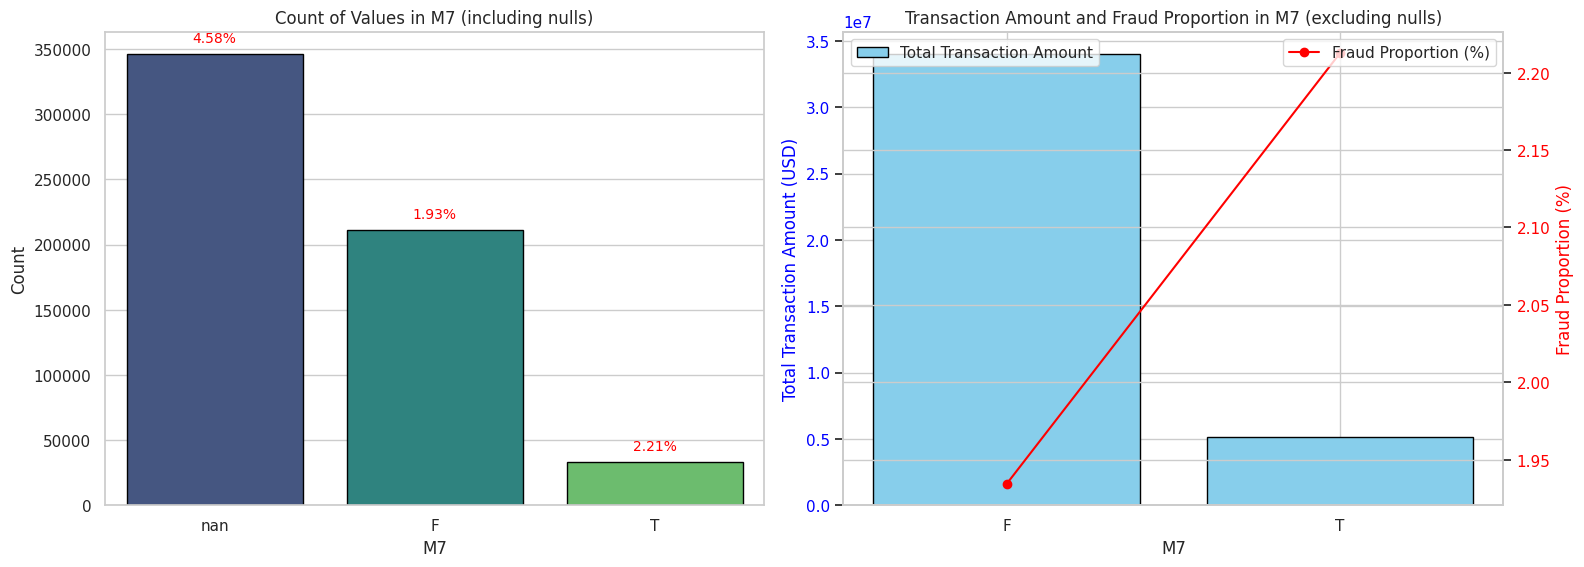

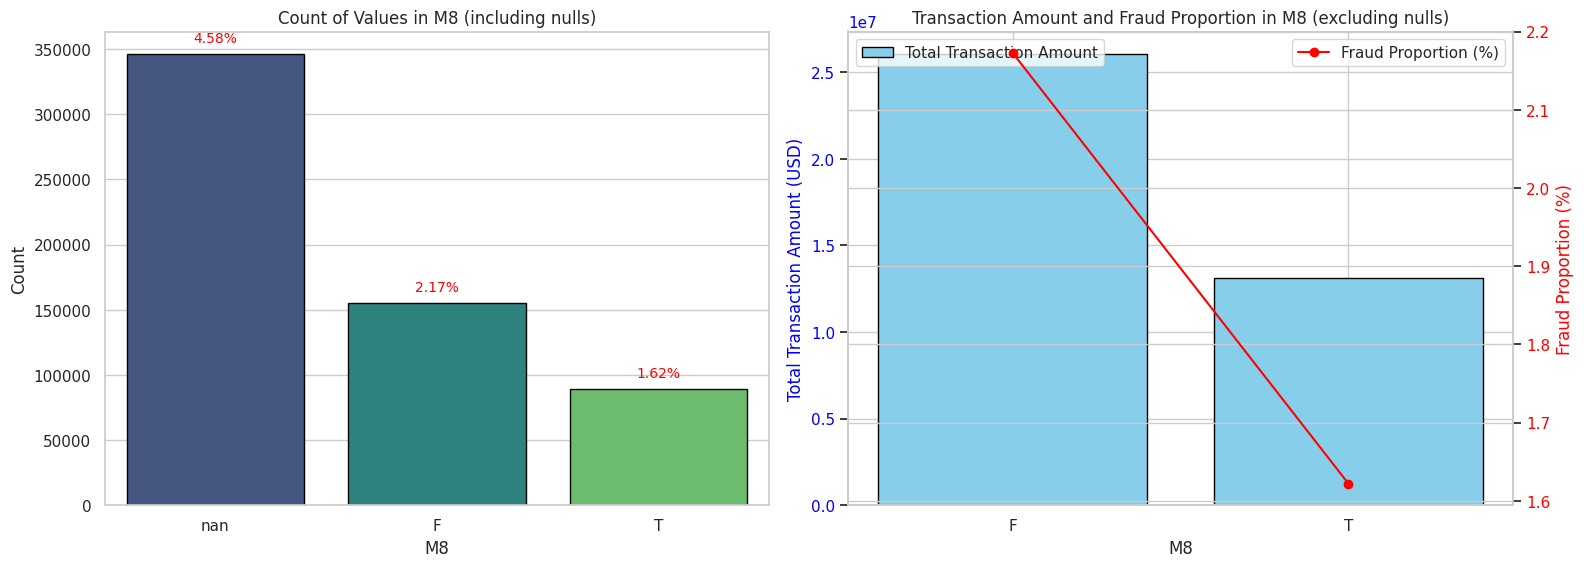

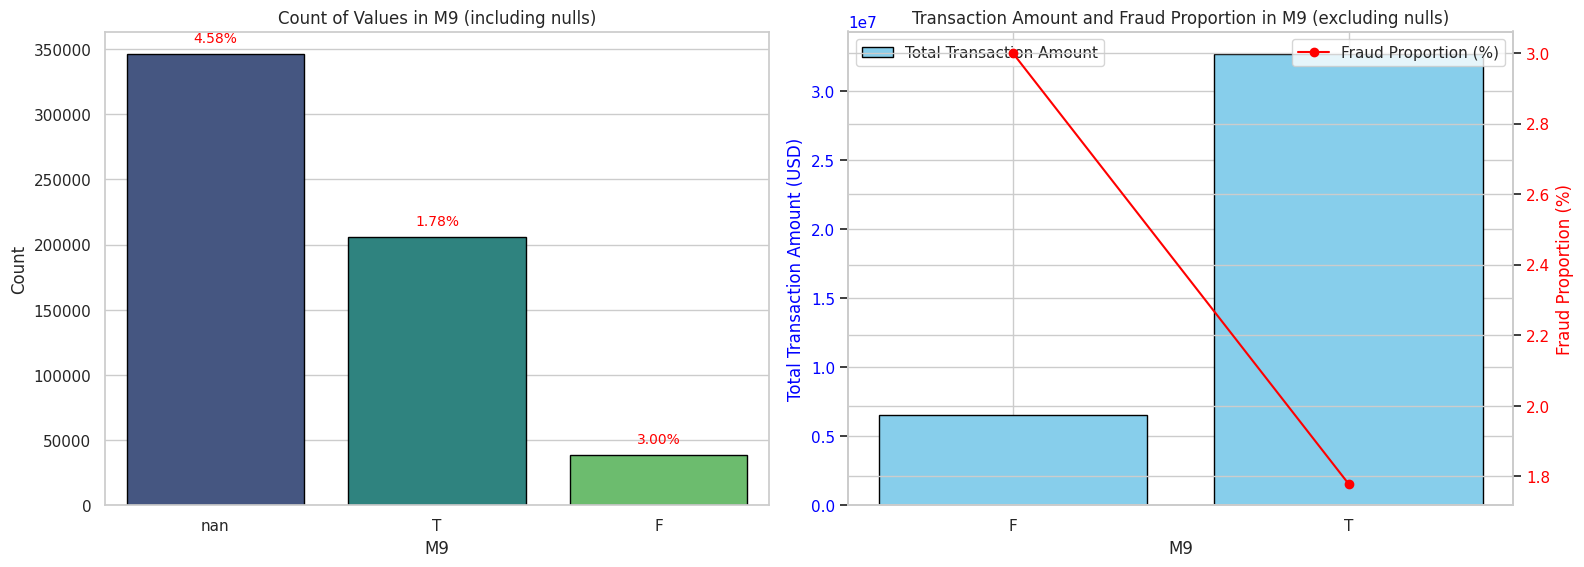

In [ ]:
# Function to plot two charts for a given M feature, including null counts and fraud proportions for all values
def plot_m_feature_distributions(feature_name):
    # Count of each variable in the M feature, including the count of null values
    feature_counts = train_data[feature_name].value_counts(dropna=False)

    # Total transaction amount and fraud proportion for each variable in the M feature (including nulls)
    feature_amt_sum = train_data.groupby(feature_name)['TransactionAmt'].sum()
    feature_fraud_prop = train_data.groupby(feature_name)['isFraud'].mean() * 100  # Fraud proportion as percentage

    # Calculate count and fraud proportion for nulls specifically
    null_count = train_data[feature_name].isnull().sum()
    null_fraud_prop = train_data[train_data[feature_name].isnull()]['isFraud'].mean() * 100  # Fraud proportion for nulls

    # Plotting
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Plot 1: Count plot for the M feature (including null values)
    sns.barplot(x=feature_counts.index.astype(str), y=feature_counts.values, palette="viridis", ax=axes[0], edgecolor='black')
    axes[0].set_title(f'Count of Values in {feature_name} (including nulls)')
    axes[0].set_xlabel(feature_name)
    axes[0].set_ylabel('Count')

    # Annotate fraud proportions for each value in the M feature, including nulls
    for i, (val, count) in enumerate(feature_counts.items()):
        fraud_prop = feature_fraud_prop.get(val, null_fraud_prop if pd.isnull(val) else 0)  # Use null fraud prop for NaN
        axes[0].text(i, count + max(feature_counts.values) * 0.02, f'{fraud_prop:.2f}%', ha='center', va='bottom', fontsize=10, color='red')

    # Plot 2: Bar and line plot for Transaction Amount and Fraud Proportion (excluding null values)
    feature_amt_sum_nonnull = feature_amt_sum.dropna()
    feature_fraud_prop_nonnull = feature_fraud_prop.dropna()

    axes[1].bar(feature_amt_sum_nonnull.index.astype(str), feature_amt_sum_nonnull.values, color='skyblue', edgecolor='black', label='Total Transaction Amount')
    axes[1].set_xlabel(feature_name)
    axes[1].set_ylabel('Total Transaction Amount (USD)', color='blue')
    axes[1].tick_params(axis='y', labelcolor='blue')

    # Secondary y-axis for fraud proportion
    ax2 = axes[1].twinx()
    ax2.plot(feature_fraud_prop_nonnull.index.astype(str), feature_fraud_prop_nonnull.values, color='red', marker='o', label='Fraud Proportion (%)')
    ax2.set_ylabel('Fraud Proportion (%)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Titles and Legends
    axes[1].set_title(f'Transaction Amount and Fraud Proportion in {feature_name} (excluding nulls)')
    axes[1].legend(loc='upper left')
    ax2.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

# Loop through M1 to M9 and plot the charts for each feature
for feature in [f'M{i}' for i in range(1, 10)]:
    plot_m_feature_distributions(feature)


### C1-14 FEATURES

#### C1

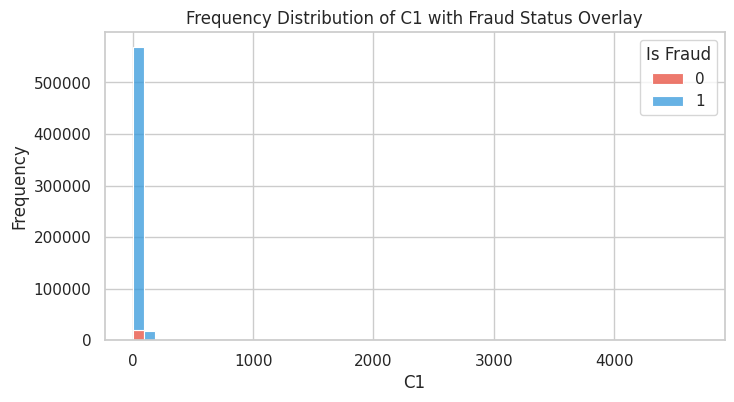

In [ ]:
plt.figure(figsize=(8, 4))

# Overlayed histogram with isFraud as hue
sns.histplot(data=train_data, x='C1', hue='isFraud', bins=50, kde=False, palette=['#3498db', '#e74c3c'], multiple='stack')

# Customize the plot
plt.title('Frequency Distribution of C1 with Fraud Status Overlay')
plt.xlabel('C1')
plt.ylabel('Frequency')
plt.legend(title='Is Fraud', labels=['0', '1'])

plt.show()

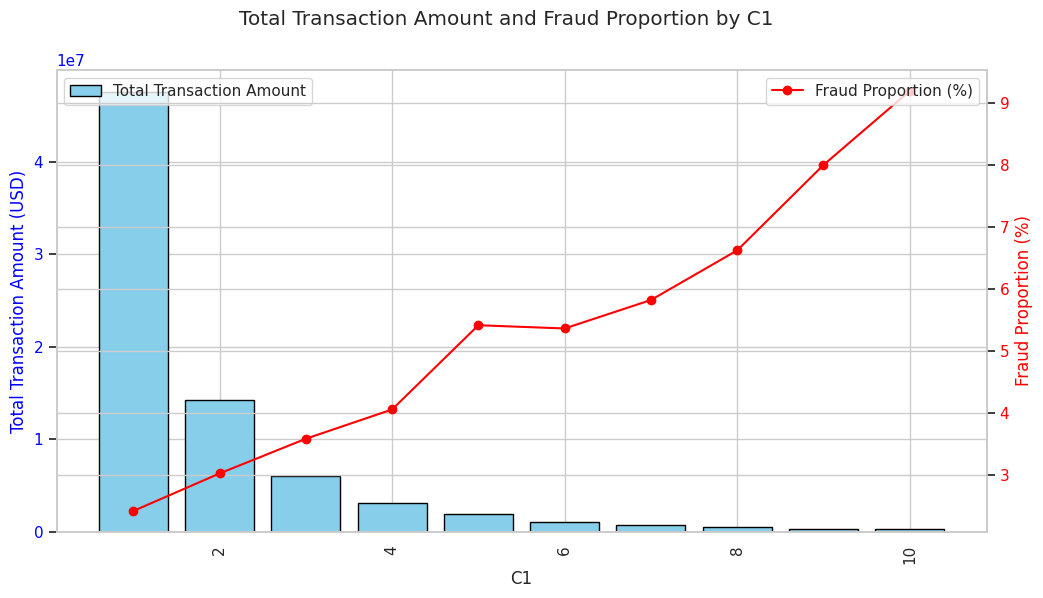

In [ ]:
# Group by C1 and calculate total transaction amount and fraud proportion
C1_amt_sum = train_data.groupby('C1')['TransactionAmt'].sum()  # Total transaction amount
C1_fraud_prop = train_data.groupby('C1')['isFraud'].mean() * 100  # Fraud proportion in percentage

# Select the top 10 R_emaildomain values by total transaction amount for clarity
top_C1 = C1_amt_sum.nlargest(10).index
C1_amt_sum_top = C1_amt_sum[top_C1]
C1_fraud_prop_top = C1_fraud_prop[top_C1]


# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for transaction amount
ax1.bar(top_C1, C1_amt_sum_top, color='skyblue', edgecolor='black', label='Total Transaction Amount')
ax1.set_xlabel('C1')
ax1.set_ylabel('Total Transaction Amount (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Rotate x-axis labels to vertical
plt.xticks(rotation=90)

# Secondary y-axis for fraud proportion
ax2 = ax1.twinx()
ax2.plot(top_C1, C1_fraud_prop_top, color='red', marker='o', label='Fraud Proportion (%)')
ax2.set_ylabel('Fraud Proportion (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add title and legends
fig.suptitle('Total Transaction Amount and Fraud Proportion by C1')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


#### C2

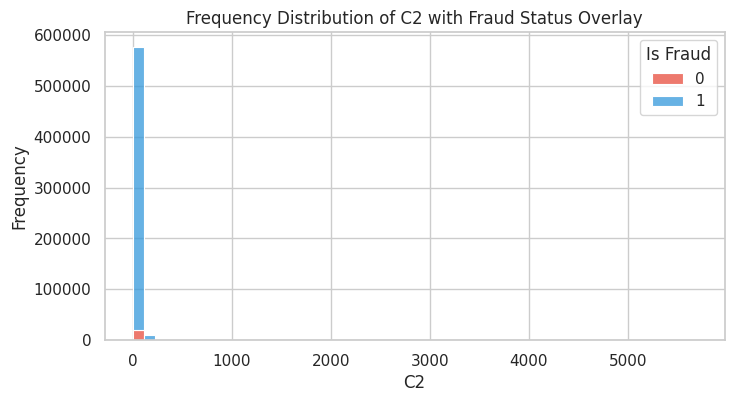

In [ ]:
plt.figure(figsize=(8, 4))

# Overlayed histogram with isFraud as hue
sns.histplot(data=train_data, x='C2', hue='isFraud', bins=50, kde=False, palette=['#3498db', '#e74c3c'], multiple='stack')

# Customize the plot
plt.title('Frequency Distribution of C2 with Fraud Status Overlay')
plt.xlabel('C2')
plt.ylabel('Frequency')
plt.legend(title='Is Fraud', labels=['0', '1'])

plt.show()

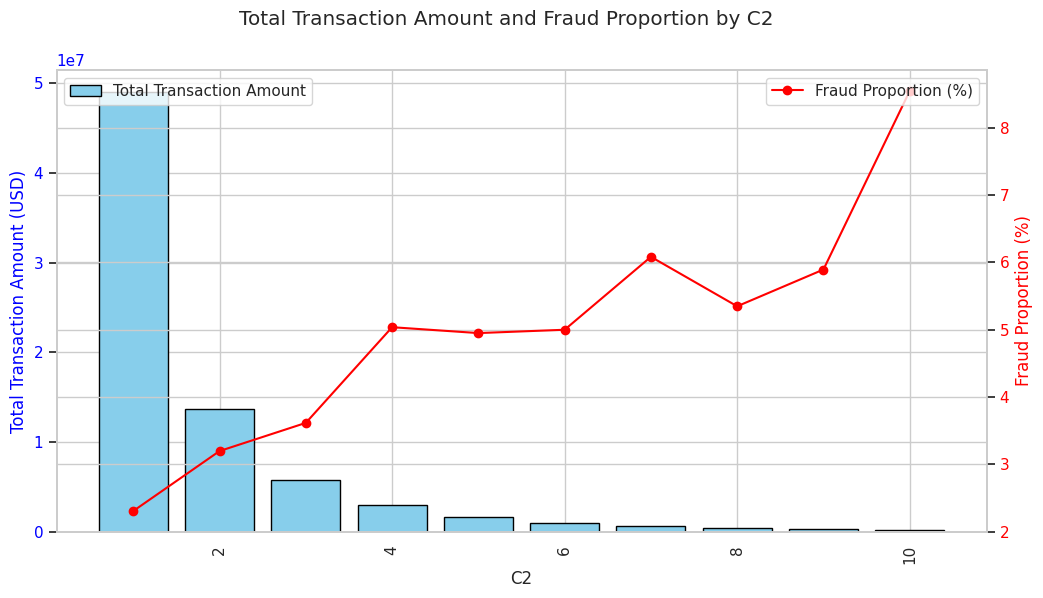

In [ ]:
# Group by C2 and calculate total transaction amount and fraud proportion
C2_amt_sum = train_data.groupby('C2')['TransactionAmt'].sum()  # Total transaction amount
C2_fraud_prop = train_data.groupby('C2')['isFraud'].mean() * 100  # Fraud proportion in percentage

# Select the top 10 R_emaildomain values by total transaction amount for clarity
top_C2 = C2_amt_sum.nlargest(10).index
C2_amt_sum_top = C2_amt_sum[top_C2]
C2_fraud_prop_top = C2_fraud_prop[top_C2]


# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for transaction amount
ax1.bar(top_C2, C2_amt_sum_top, color='skyblue', edgecolor='black', label='Total Transaction Amount')
ax1.set_xlabel('C2')
ax1.set_ylabel('Total Transaction Amount (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Rotate x-axis labels to vertical
plt.xticks(rotation=90)

# Secondary y-axis for fraud proportion
ax2 = ax1.twinx()
ax2.plot(top_C2, C2_fraud_prop_top, color='red', marker='o', label='Fraud Proportion (%)')
ax2.set_ylabel('Fraud Proportion (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add title and legends
fig.suptitle('Total Transaction Amount and Fraud Proportion by C2')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


#### C3

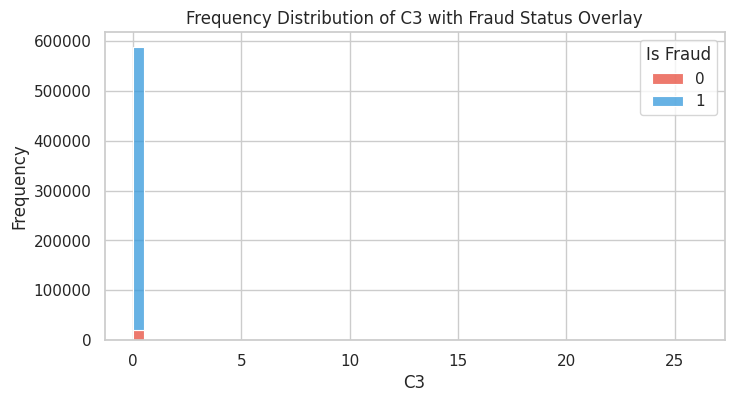

In [ ]:
plt.figure(figsize=(8, 4))

# Overlayed histogram with isFraud as hue
sns.histplot(data=train_data, x='C3', hue='isFraud', bins=50, kde=False, palette=['#3498db', '#e74c3c'], multiple='stack')

# Customize the plot
plt.title('Frequency Distribution of C3 with Fraud Status Overlay')
plt.xlabel('C3')
plt.ylabel('Frequency')
plt.legend(title='Is Fraud', labels=['0', '1'])

plt.show()

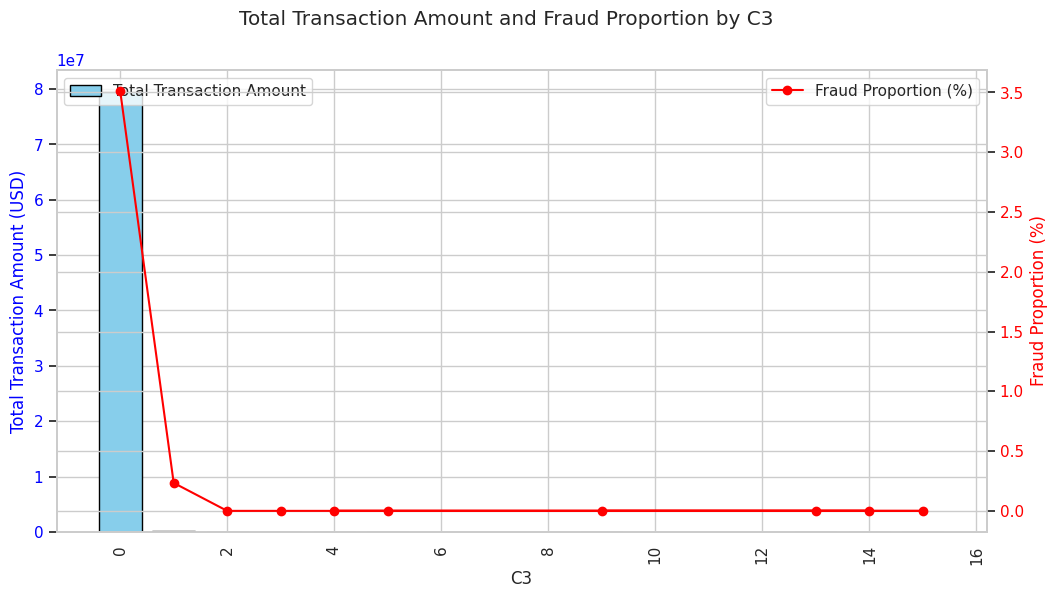

In [ ]:
# Group by C3 and calculate total transaction amount and fraud proportion
C3_amt_sum = train_data.groupby('C3')['TransactionAmt'].sum()  # Total transaction amount
C3_fraud_prop = train_data.groupby('C3')['isFraud'].mean() * 100  # Fraud proportion in percentage

# Select the top 10 C3 values by total transaction amount for clarity
top_C3 = C3_amt_sum.nlargest(10).index
C3_amt_sum_top = C3_amt_sum[top_C3]
C3_fraud_prop_top = C3_fraud_prop[top_C3]


# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for transaction amount
ax1.bar(top_C3, C3_amt_sum_top, color='skyblue', edgecolor='black', label='Total Transaction Amount')
ax1.set_xlabel('C3')
ax1.set_ylabel('Total Transaction Amount (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Rotate x-axis labels to vertical
plt.xticks(rotation=90)

# Secondary y-axis for fraud proportion
ax2 = ax1.twinx()
ax2.plot(top_C3, C3_fraud_prop_top, color='red', marker='o', label='Fraud Proportion (%)')
ax2.set_ylabel('Fraud Proportion (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add title and legends
fig.suptitle('Total Transaction Amount and Fraud Proportion by C3')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

#### C4

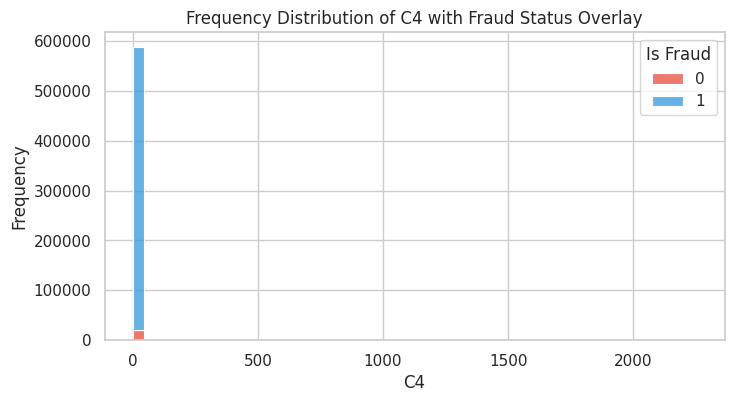

In [ ]:
plt.figure(figsize=(8, 4))

# Overlayed histogram with isFraud as hue
sns.histplot(data=train_data, x='C4', hue='isFraud', bins=50, kde=False, palette=['#3498db', '#e74c3c'], multiple='stack')

# Customize the plot
plt.title('Frequency Distribution of C4 with Fraud Status Overlay')
plt.xlabel('C4')
plt.ylabel('Frequency')
plt.legend(title='Is Fraud', labels=['0', '1'])

plt.show()

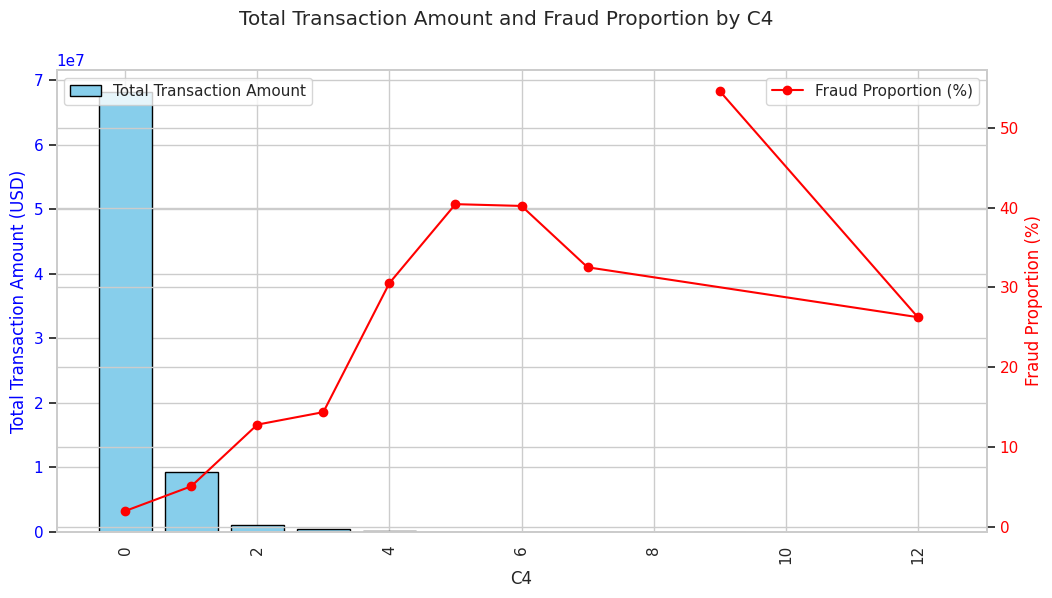

In [ ]:
# Group by C4 and calculate total transaction amount and fraud proportion
C4_amt_sum = train_data.groupby('C4')['TransactionAmt'].sum()  # Total transaction amount
C4_fraud_prop = train_data.groupby('C4')['isFraud'].mean() * 100  # Fraud proportion in percentage

# Select the top 10 C4 values by total transaction amount for clarity
top_C4 = C4_amt_sum.nlargest(10).index
C4_amt_sum_top = C4_amt_sum[top_C4]
C4_fraud_prop_top = C4_fraud_prop[top_C4]


# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for transaction amount
ax1.bar(top_C4, C4_amt_sum_top, color='skyblue', edgecolor='black', label='Total Transaction Amount')
ax1.set_xlabel('C4')
ax1.set_ylabel('Total Transaction Amount (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Rotate x-axis labels to vertical
plt.xticks(rotation=90)

# Secondary y-axis for fraud proportion
ax2 = ax1.twinx()
ax2.plot(top_C4, C4_fraud_prop_top, color='red', marker='o', label='Fraud Proportion (%)')
ax2.set_ylabel('Fraud Proportion (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add title and legends
fig.suptitle('Total Transaction Amount and Fraud Proportion by C4')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

#### C5

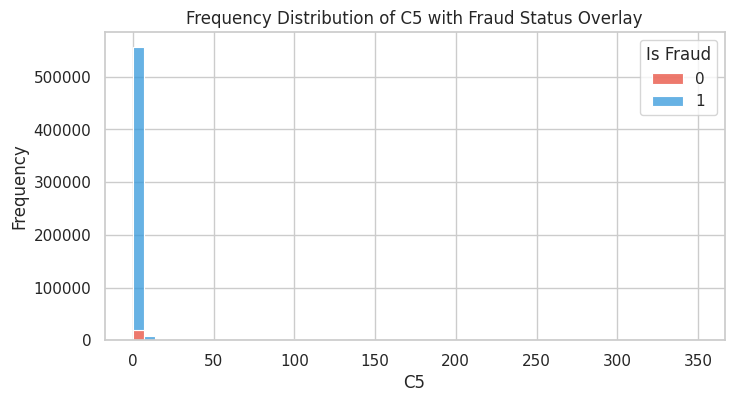

In [ ]:
plt.figure(figsize=(8, 4))

# Overlayed histogram with isFraud as hue
sns.histplot(data=train_data, x='C5', hue='isFraud', bins=50, kde=False, palette=['#3498db', '#e74c3c'], multiple='stack')

# Customize the plot
plt.title('Frequency Distribution of C5 with Fraud Status Overlay')
plt.xlabel('C5')
plt.ylabel('Frequency')
plt.legend(title='Is Fraud', labels=['0', '1'])

plt.show()

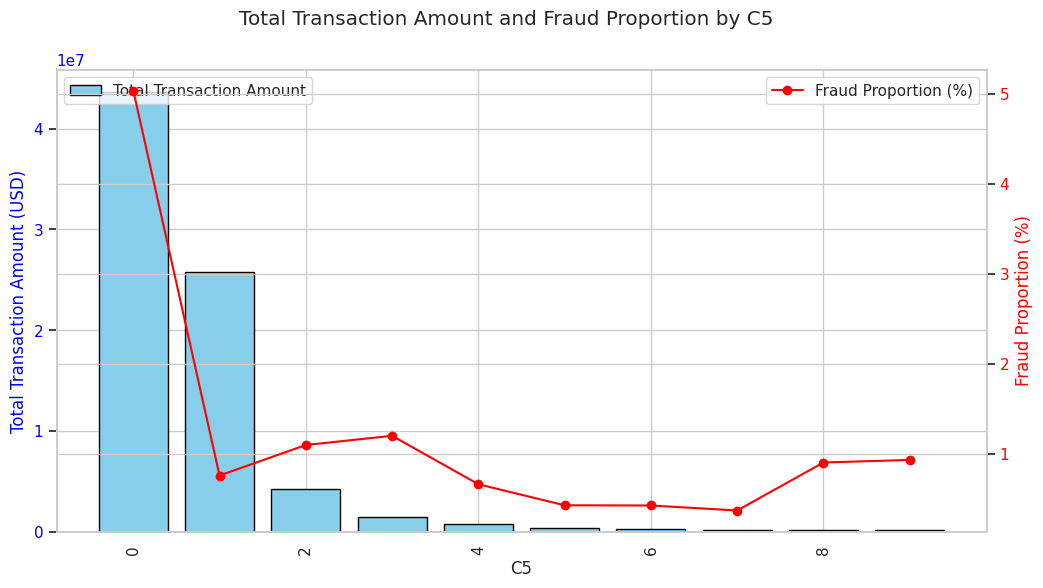

In [ ]:
# Group by C5 and calculate total transaction amount and fraud proportion
C5_amt_sum = train_data.groupby('C5')['TransactionAmt'].sum()  # Total transaction amount
C5_fraud_prop = train_data.groupby('C5')['isFraud'].mean() * 100  # Fraud proportion in percentage

# Select the top 10 C4 values by total transaction amount for clarity
top_C5 = C5_amt_sum.nlargest(10).index
C5_amt_sum_top = C5_amt_sum[top_C5]
C5_fraud_prop_top = C5_fraud_prop[top_C5]


# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for transaction amount
ax1.bar(top_C5, C5_amt_sum_top, color='skyblue', edgecolor='black', label='Total Transaction Amount')
ax1.set_xlabel('C5')
ax1.set_ylabel('Total Transaction Amount (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Rotate x-axis labels to vertical
plt.xticks(rotation=90)

# Secondary y-axis for fraud proportion
ax2 = ax1.twinx()
ax2.plot(top_C5, C5_fraud_prop_top, color='red', marker='o', label='Fraud Proportion (%)')
ax2.set_ylabel('Fraud Proportion (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add title and legends
fig.suptitle('Total Transaction Amount and Fraud Proportion by C5')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

#### C6

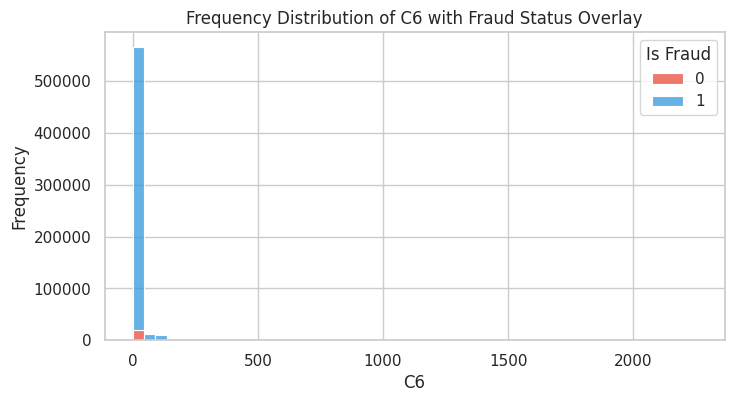

In [ ]:
plt.figure(figsize=(8, 4))

# Overlayed histogram with isFraud as hue
sns.histplot(data=train_data, x='C6', hue='isFraud', bins=50, kde=False, palette=['#3498db', '#e74c3c'], multiple='stack')

# Customize the plot
plt.title('Frequency Distribution of C6 with Fraud Status Overlay')
plt.xlabel('C6')
plt.ylabel('Frequency')
plt.legend(title='Is Fraud', labels=['0', '1'])

plt.show()

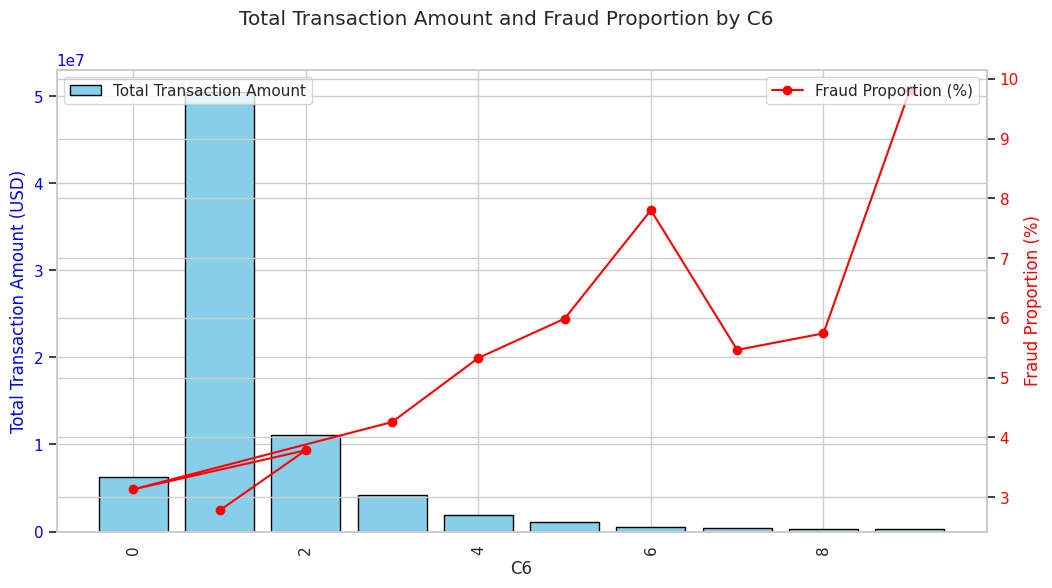

In [ ]:
# Group by C6 and calculate total transaction amount and fraud proportion
C6_amt_sum = train_data.groupby('C6')['TransactionAmt'].sum()  # Total transaction amount
C6_fraud_prop = train_data.groupby('C6')['isFraud'].mean() * 100  # Fraud proportion in percentage

# Select the top 10 C6 values by total transaction amount for clarity
top_C6 = C6_amt_sum.nlargest(10).index
C6_amt_sum_top = C6_amt_sum[top_C6]
C6_fraud_prop_top = C6_fraud_prop[top_C6]


# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for transaction amount
ax1.bar(top_C6, C6_amt_sum_top, color='skyblue', edgecolor='black', label='Total Transaction Amount')
ax1.set_xlabel('C6')
ax1.set_ylabel('Total Transaction Amount (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Rotate x-axis labels to vertical
plt.xticks(rotation=90)

# Secondary y-axis for fraud proportion
ax2 = ax1.twinx()
ax2.plot(top_C6, C6_fraud_prop_top, color='red', marker='o', label='Fraud Proportion (%)')
ax2.set_ylabel('Fraud Proportion (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add title and legends
fig.suptitle('Total Transaction Amount and Fraud Proportion by C6')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

#### C7

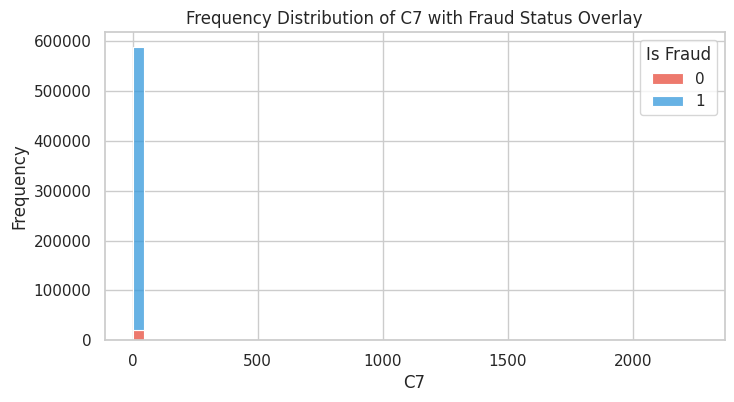

In [ ]:
plt.figure(figsize=(8, 4))

# Overlayed histogram with isFraud as hue
sns.histplot(data=train_data, x='C7', hue='isFraud', bins=50, kde=False, palette=['#3498db', '#e74c3c'], multiple='stack')

# Customize the plot
plt.title('Frequency Distribution of C7 with Fraud Status Overlay')
plt.xlabel('C7')
plt.ylabel('Frequency')
plt.legend(title='Is Fraud', labels=['0', '1'])

plt.show()

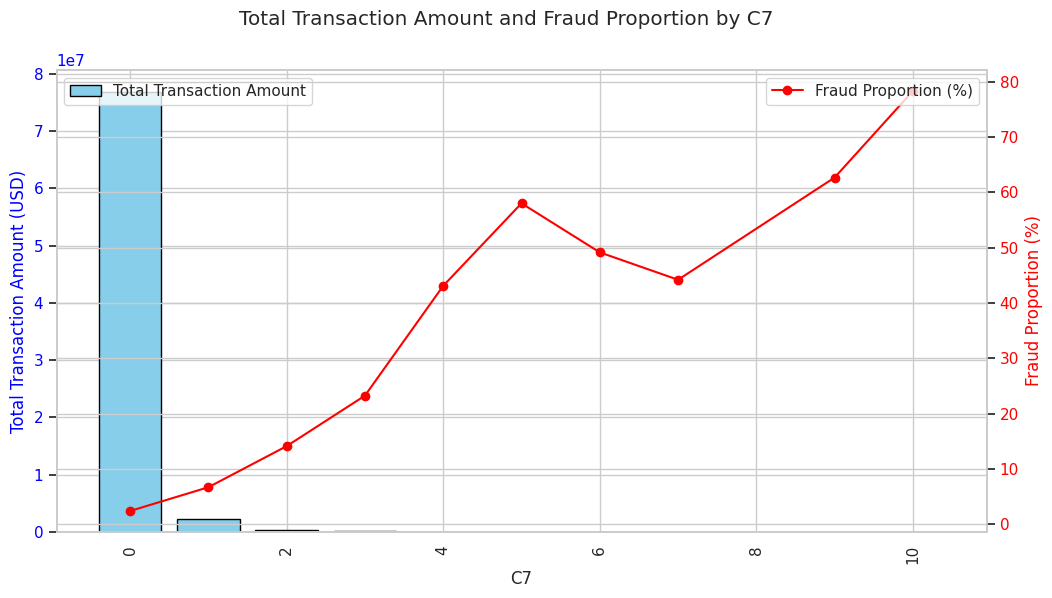

In [ ]:
# Group by C7 and calculate total transaction amount and fraud proportion
C7_amt_sum = train_data.groupby('C7')['TransactionAmt'].sum()  # Total transaction amount
C7_fraud_prop = train_data.groupby('C7')['isFraud'].mean() * 100  # Fraud proportion in percentage

# Select the top 10 C7 values by total transaction amount for clarity
top_C7 = C7_amt_sum.nlargest(10).index
C7_amt_sum_top = C7_amt_sum[top_C7]
C7_fraud_prop_top = C7_fraud_prop[top_C7]


# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for transaction amount
ax1.bar(top_C7, C7_amt_sum_top, color='skyblue', edgecolor='black', label='Total Transaction Amount')
ax1.set_xlabel('C7')
ax1.set_ylabel('Total Transaction Amount (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Rotate x-axis labels to vertical
plt.xticks(rotation=90)

# Secondary y-axis for fraud proportion
ax2 = ax1.twinx()
ax2.plot(top_C7, C7_fraud_prop_top, color='red', marker='o', label='Fraud Proportion (%)')
ax2.set_ylabel('Fraud Proportion (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add title and legends
fig.suptitle('Total Transaction Amount and Fraud Proportion by C7')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

#### C8

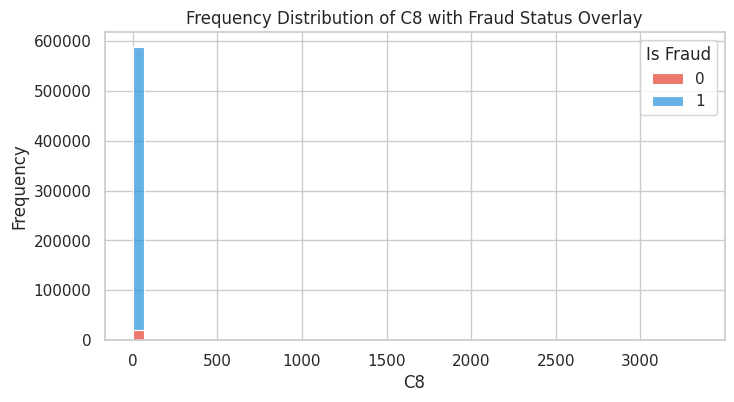

In [ ]:
plt.figure(figsize=(8, 4))

# Overlayed histogram with isFraud as hue
sns.histplot(data=train_data, x='C8', hue='isFraud', bins=50, kde=False, palette=['#3498db', '#e74c3c'], multiple='stack')

# Customize the plot
plt.title('Frequency Distribution of C8 with Fraud Status Overlay')
plt.xlabel('C8')
plt.ylabel('Frequency')
plt.legend(title='Is Fraud', labels=['0', '1'])

plt.show()

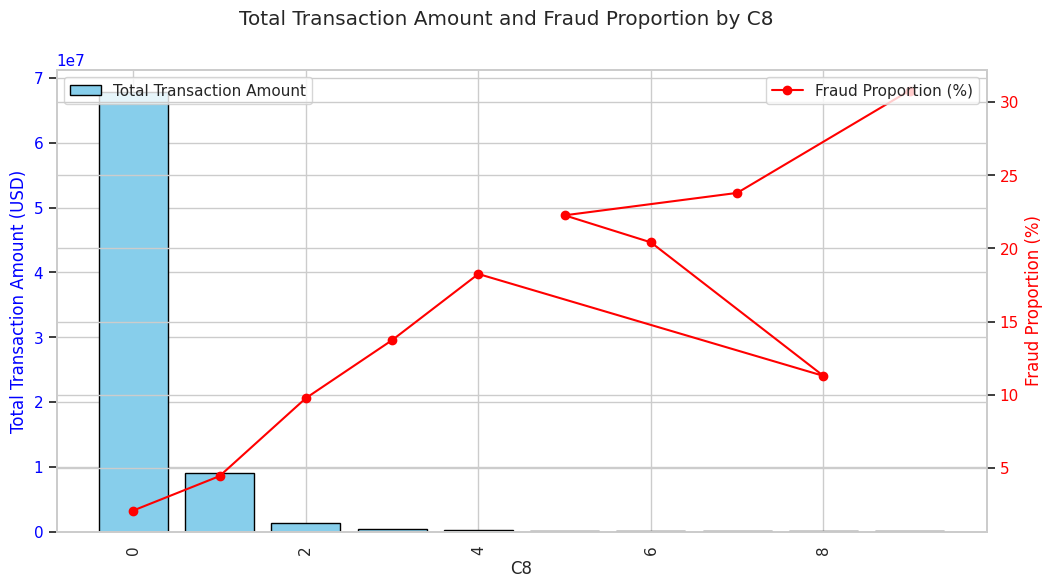

In [ ]:
# Group by C8 and calculate total transaction amount and fraud proportion
C8_amt_sum = train_data.groupby('C8')['TransactionAmt'].sum()  # Total transaction amount
C8_fraud_prop = train_data.groupby('C8')['isFraud'].mean() * 100  # Fraud proportion in percentage

# Select the top 10 C8 values by total transaction amount for clarity
top_C8 = C8_amt_sum.nlargest(10).index
C8_amt_sum_top = C8_amt_sum[top_C8]
C8_fraud_prop_top = C8_fraud_prop[top_C8]


# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for transaction amount
ax1.bar(top_C8, C8_amt_sum_top, color='skyblue', edgecolor='black', label='Total Transaction Amount')
ax1.set_xlabel('C8')
ax1.set_ylabel('Total Transaction Amount (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Rotate x-axis labels to vertical
plt.xticks(rotation=90)

# Secondary y-axis for fraud proportion
ax2 = ax1.twinx()
ax2.plot(top_C8, C8_fraud_prop_top, color='red', marker='o', label='Fraud Proportion (%)')
ax2.set_ylabel('Fraud Proportion (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add title and legends
fig.suptitle('Total Transaction Amount and Fraud Proportion by C8')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

#### C9

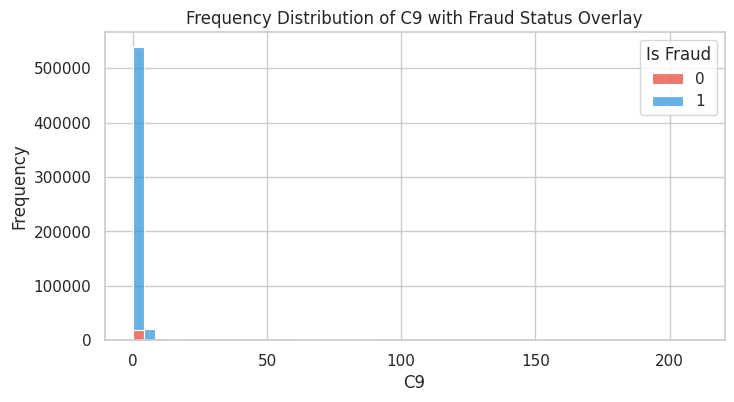

In [ ]:
plt.figure(figsize=(8, 4))

# Overlayed histogram with isFraud as hue
sns.histplot(data=train_data, x='C9', hue='isFraud', bins=50, kde=False, palette=['#3498db', '#e74c3c'], multiple='stack')

# Customize the plot
plt.title('Frequency Distribution of C9 with Fraud Status Overlay')
plt.xlabel('C9')
plt.ylabel('Frequency')
plt.legend(title='Is Fraud', labels=['0', '1'])

plt.show()

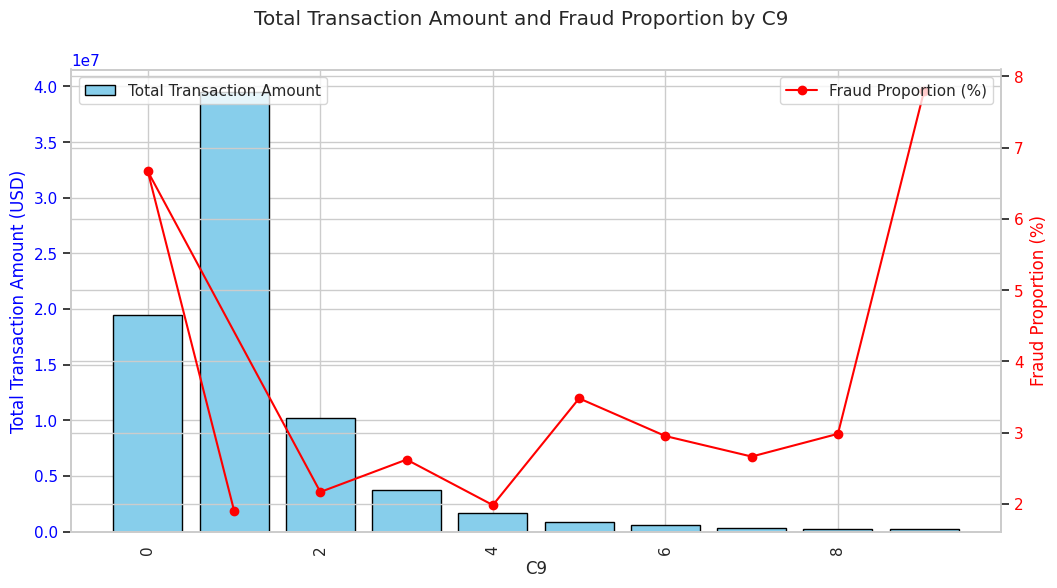

In [ ]:
# Group by C9 and calculate total transaction amount and fraud proportion
C9_amt_sum = train_data.groupby('C9')['TransactionAmt'].sum()  # Total transaction amount
C9_fraud_prop = train_data.groupby('C9')['isFraud'].mean() * 100  # Fraud proportion in percentage

# Select the top 10 C9 values by total transaction amount for clarity
top_C9 = C9_amt_sum.nlargest(10).index
C9_amt_sum_top = C9_amt_sum[top_C9]
C9_fraud_prop_top = C9_fraud_prop[top_C9]


# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for transaction amount
ax1.bar(top_C9, C9_amt_sum_top, color='skyblue', edgecolor='black', label='Total Transaction Amount')
ax1.set_xlabel('C9')
ax1.set_ylabel('Total Transaction Amount (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Rotate x-axis labels to vertical
plt.xticks(rotation=90)

# Secondary y-axis for fraud proportion
ax2 = ax1.twinx()
ax2.plot(top_C9, C9_fraud_prop_top, color='red', marker='o', label='Fraud Proportion (%)')
ax2.set_ylabel('Fraud Proportion (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add title and legends
fig.suptitle('Total Transaction Amount and Fraud Proportion by C9')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

#### C10

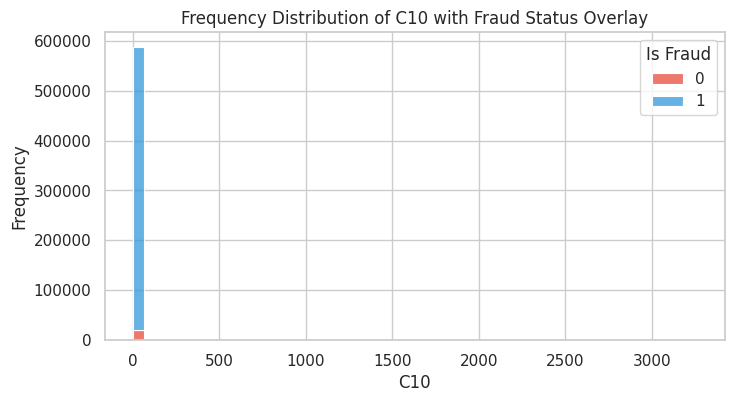

In [ ]:
plt.figure(figsize=(8, 4))

# Overlayed histogram with isFraud as hue
sns.histplot(data=train_data, x='C10', hue='isFraud', bins=50, kde=False, palette=['#3498db', '#e74c3c'], multiple='stack')

# Customize the plot
plt.title('Frequency Distribution of C10 with Fraud Status Overlay')
plt.xlabel('C10')
plt.ylabel('Frequency')
plt.legend(title='Is Fraud', labels=['0', '1'])

plt.show()

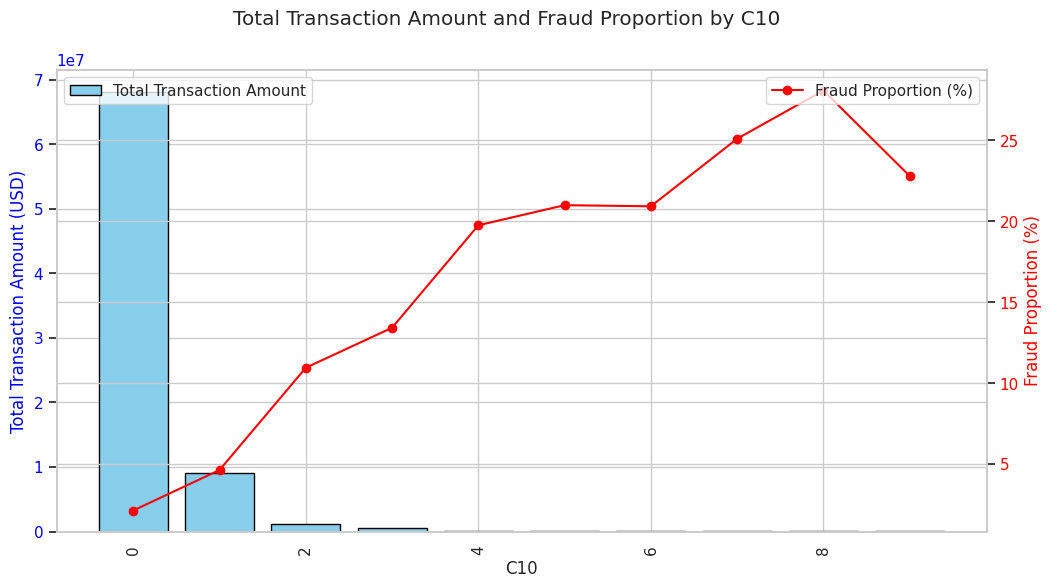

In [ ]:
# Group by C10 and calculate total transaction amount and fraud proportion
C10_amt_sum = train_data.groupby('C10')['TransactionAmt'].sum()  # Total transaction amount
C10_fraud_prop = train_data.groupby('C10')['isFraud'].mean() * 100  # Fraud proportion in percentage

# Select the top 10 C10 values by total transaction amount for clarity
top_C10 = C10_amt_sum.nlargest(10).index
C10_amt_sum_top = C10_amt_sum[top_C10]
C10_fraud_prop_top = C10_fraud_prop[top_C10]


# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for transaction amount
ax1.bar(top_C10, C10_amt_sum_top, color='skyblue', edgecolor='black', label='Total Transaction Amount')
ax1.set_xlabel('C10')
ax1.set_ylabel('Total Transaction Amount (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Rotate x-axis labels to vertical
plt.xticks(rotation=90)

# Secondary y-axis for fraud proportion
ax2 = ax1.twinx()
ax2.plot(top_C10, C10_fraud_prop_top, color='red', marker='o', label='Fraud Proportion (%)')
ax2.set_ylabel('Fraud Proportion (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add title and legends
fig.suptitle('Total Transaction Amount and Fraud Proportion by C10')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

#### C11

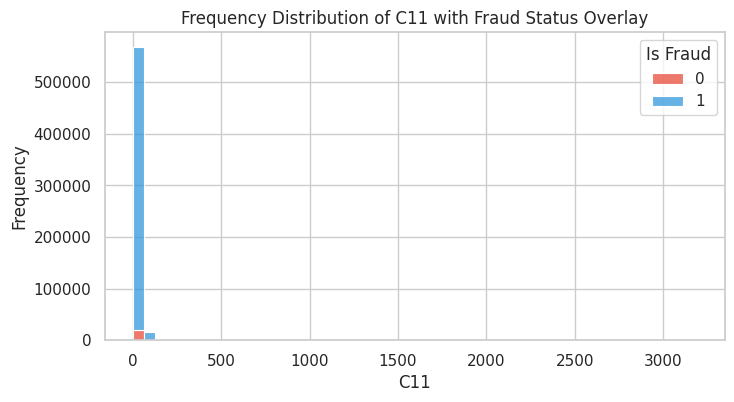

In [ ]:
plt.figure(figsize=(8, 4))

# Overlayed histogram with isFraud as hue
sns.histplot(data=train_data, x='C11', hue='isFraud', bins=50, kde=False, palette=['#3498db', '#e74c3c'], multiple='stack')

# Customize the plot
plt.title('Frequency Distribution of C11 with Fraud Status Overlay')
plt.xlabel('C11')
plt.ylabel('Frequency')
plt.legend(title='Is Fraud', labels=['0', '1'])

plt.show()

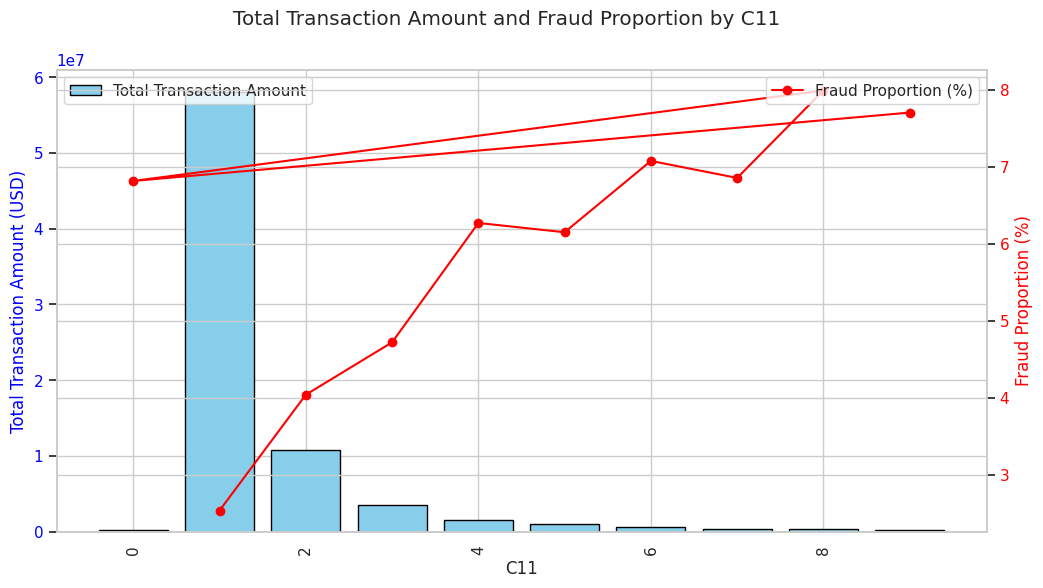

In [ ]:
# Group by C11 and calculate total transaction amount and fraud proportion
C11_amt_sum = train_data.groupby('C11')['TransactionAmt'].sum()  # Total transaction amount
C11_fraud_prop = train_data.groupby('C11')['isFraud'].mean() * 100  # Fraud proportion in percentage

# Select the top 10 C11 values by total transaction amount for clarity
top_C11 = C11_amt_sum.nlargest(10).index
C11_amt_sum_top = C11_amt_sum[top_C11]
C11_fraud_prop_top = C11_fraud_prop[top_C11]


# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for transaction amount
ax1.bar(top_C11, C11_amt_sum_top, color='skyblue', edgecolor='black', label='Total Transaction Amount')
ax1.set_xlabel('C11')
ax1.set_ylabel('Total Transaction Amount (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Rotate x-axis labels to vertical
plt.xticks(rotation=90)

# Secondary y-axis for fraud proportion
ax2 = ax1.twinx()
ax2.plot(top_C11, C11_fraud_prop_top, color='red', marker='o', label='Fraud Proportion (%)')
ax2.set_ylabel('Fraud Proportion (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add title and legends
fig.suptitle('Total Transaction Amount and Fraud Proportion by C11')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

#### C12

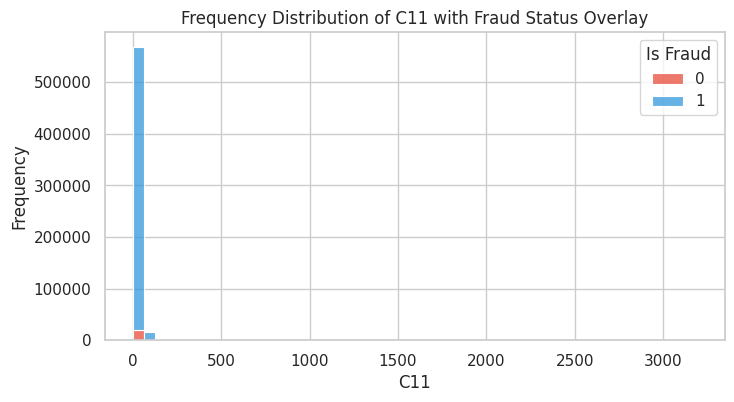

In [ ]:
plt.figure(figsize=(8, 4))

# Overlayed histogram with isFraud as hue
sns.histplot(data=train_data, x='C11', hue='isFraud', bins=50, kde=False, palette=['#3498db', '#e74c3c'], multiple='stack')

# Customize the plot
plt.title('Frequency Distribution of C11 with Fraud Status Overlay')
plt.xlabel('C11')
plt.ylabel('Frequency')
plt.legend(title='Is Fraud', labels=['0', '1'])

plt.show()

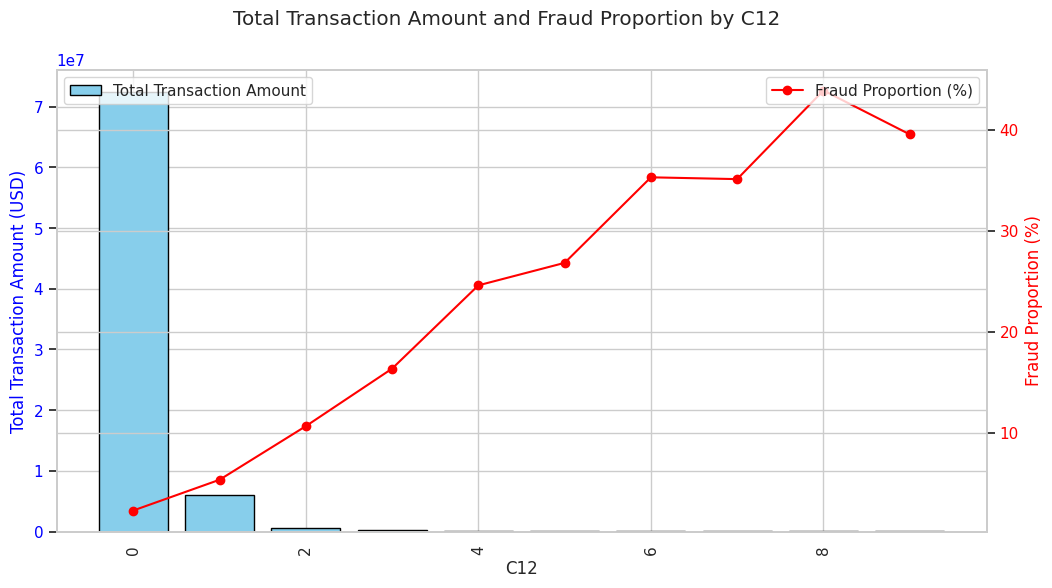

In [ ]:
# Group by C12 and calculate total transaction amount and fraud proportion
C12_amt_sum = train_data.groupby('C12')['TransactionAmt'].sum()  # Total transaction amount
C12_fraud_prop = train_data.groupby('C12')['isFraud'].mean() * 100  # Fraud proportion in percentage

# Select the top 10 C11 values by total transaction amount for clarity
top_C12 = C12_amt_sum.nlargest(10).index
C12_amt_sum_top = C12_amt_sum[top_C12]
C12_fraud_prop_top = C12_fraud_prop[top_C12]


# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for transaction amount
ax1.bar(top_C12, C12_amt_sum_top, color='skyblue', edgecolor='black', label='Total Transaction Amount')
ax1.set_xlabel('C12')
ax1.set_ylabel('Total Transaction Amount (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Rotate x-axis labels to vertical
plt.xticks(rotation=90)

# Secondary y-axis for fraud proportion
ax2 = ax1.twinx()
ax2.plot(top_C12, C12_fraud_prop_top, color='red', marker='o', label='Fraud Proportion (%)')
ax2.set_ylabel('Fraud Proportion (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add title and legends
fig.suptitle('Total Transaction Amount and Fraud Proportion by C12')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

#### C13

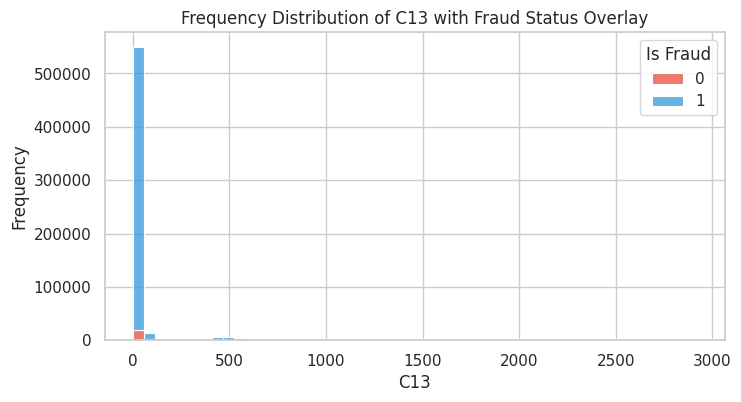

In [ ]:
plt.figure(figsize=(8, 4))

# Overlayed histogram with isFraud as hue
sns.histplot(data=train_data, x='C13', hue='isFraud', bins=50, kde=False, palette=['#3498db', '#e74c3c'], multiple='stack')

# Customize the plot
plt.title('Frequency Distribution of C13 with Fraud Status Overlay')
plt.xlabel('C13')
plt.ylabel('Frequency')
plt.legend(title='Is Fraud', labels=['0', '1'])

plt.show()

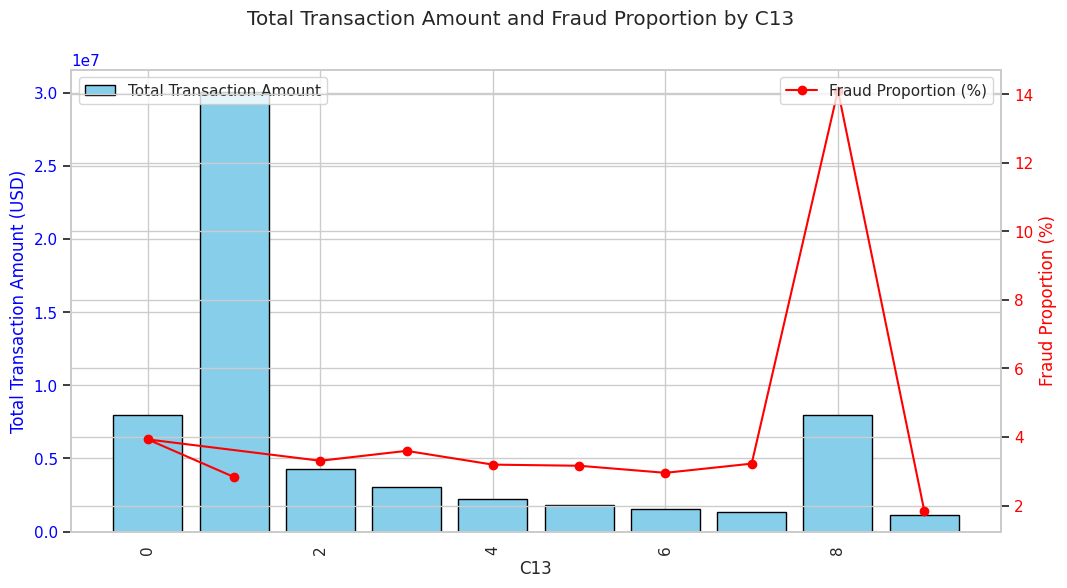

In [ ]:
# Group by C13 and calculate total transaction amount and fraud proportion
C13_amt_sum = train_data.groupby('C13')['TransactionAmt'].sum()  # Total transaction amount
C13_fraud_prop = train_data.groupby('C13')['isFraud'].mean() * 100  # Fraud proportion in percentage

# Select the top 10 C13 values by total transaction amount for clarity
top_C13 = C13_amt_sum.nlargest(10).index
C13_amt_sum_top = C13_amt_sum[top_C11]
C13_fraud_prop_top = C13_fraud_prop[top_C11]


# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for transaction amount
ax1.bar(top_C13, C13_amt_sum_top, color='skyblue', edgecolor='black', label='Total Transaction Amount')
ax1.set_xlabel('C13')
ax1.set_ylabel('Total Transaction Amount (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Rotate x-axis labels to vertical
plt.xticks(rotation=90)

# Secondary y-axis for fraud proportion
ax2 = ax1.twinx()
ax2.plot(top_C13, C13_fraud_prop_top, color='red', marker='o', label='Fraud Proportion (%)')
ax2.set_ylabel('Fraud Proportion (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add title and legends
fig.suptitle('Total Transaction Amount and Fraud Proportion by C13')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

#### C14

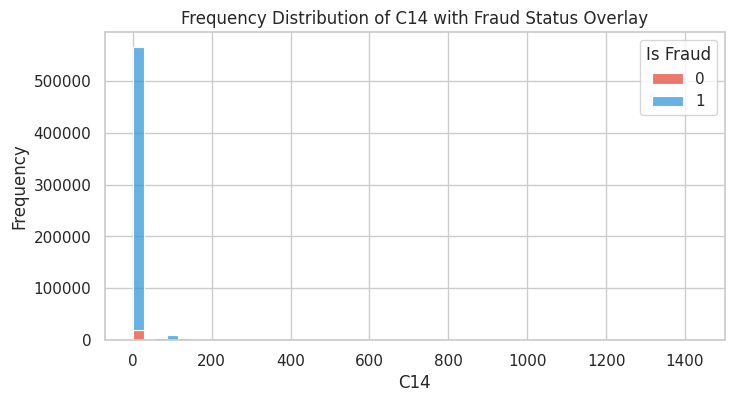

In [ ]:
plt.figure(figsize=(8, 4))

# Overlayed histogram with isFraud as hue
sns.histplot(data=train_data, x='C14', hue='isFraud', bins=50, kde=False, palette=['#3498db', '#e74c3c'], multiple='stack')

# Customize the plot
plt.title('Frequency Distribution of C14 with Fraud Status Overlay')
plt.xlabel('C14')
plt.ylabel('Frequency')
plt.legend(title='Is Fraud', labels=['0', '1'])

plt.show()

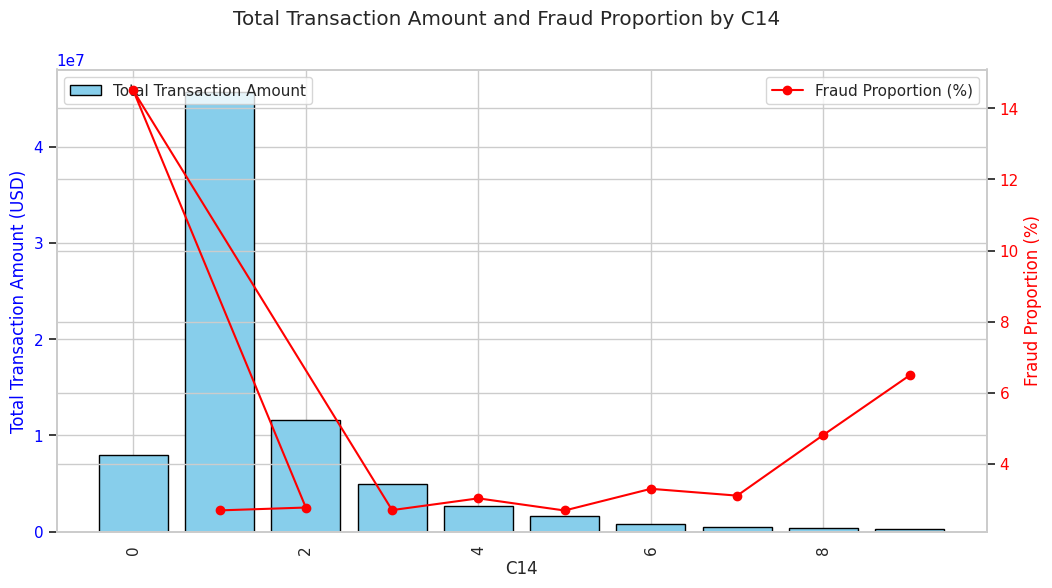

In [ ]:
# Group by C14 and calculate total transaction amount and fraud proportion
C14_amt_sum = train_data.groupby('C14')['TransactionAmt'].sum()  # Total transaction amount
C14_fraud_prop = train_data.groupby('C14')['isFraud'].mean() * 100  # Fraud proportion in percentage

# Select the top 10 C14 values by total transaction amount for clarity
top_C14 = C14_amt_sum.nlargest(10).index
C14_amt_sum_top = C14_amt_sum[top_C14]
C14_fraud_prop_top = C14_fraud_prop[top_C14]


# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for transaction amount
ax1.bar(top_C14, C14_amt_sum_top, color='skyblue', edgecolor='black', label='Total Transaction Amount')
ax1.set_xlabel('C14')
ax1.set_ylabel('Total Transaction Amount (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Rotate x-axis labels to vertical
plt.xticks(rotation=90)

# Secondary y-axis for fraud proportion
ax2 = ax1.twinx()
ax2.plot(top_C14, C14_fraud_prop_top, color='red', marker='o', label='Fraud Proportion (%)')
ax2.set_ylabel('Fraud Proportion (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add title and legends
fig.suptitle('Total Transaction Amount and Fraud Proportion by C14')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

#### **Insights observed from data visualisation**

1.   569,877 of the total number of transactions were non-fraudulent and form 96.5% of the entire dataset and 20,663 transactions were fraudulent and make up 3.50% of the dataset.

2.   76,655,103 (dollars) making up 96.13% of the total transaction amount was non-fraudulent and 3,083,844 (dollars) making up 3.87% of the total transaction amount was fraudulent.

3.   74.45% of the number of transactions totaling 439,670 were done on product W.

4.   Visa cards were the most used for transactions and also had the most fraudulent transactions as well.

5.   More transactions were done by gmail linked accounts than any other email domain.



#### **DATA PREPROCESSING**

#### **Feature Engineering**

###### 1. **Creating "Transaction time features" using TransactionDT**

TransactionDT first value is 86400, which corresponds to the number of seconds in a day (60 * 60 * 24 = 86400) so the unit is seconds. Using this, we know the data spans 6 months, as the maximum value is 15811131, which would correspond to day 183. We will assume a start date while using this feature. We will then go on to create the following features.

*   TransactionDate
*   WeekDay
*   Day
*   Hour



In [ ]:
# Define the start date as a reference point
START_DATE = '2017-12-01'
start_date = pd.to_datetime(START_DATE)

# Convert TransactionDT to timedelta and add to the start date
train_data['TransactionDate'] = start_date + pd.to_timedelta(train_data['TransactionDT'], unit='s')

# Create the time-based features
train_data['Weekday'] = train_data['TransactionDate'].dt.dayofweek             # Day of the week (0=Monday, 6=Sunday)
train_data['Day'] = train_data['TransactionDate'].dt.day                       # Day of the month (1-31)
train_data['Hour'] = train_data['TransactionDate'].dt.hour                     # Hour of the day (0-23)

# Display the new columns to confirm
train_data[['TransactionDT', 'TransactionDate', 'Weekday', 'Day', 'Hour']].head()

TransactionDT     TransactionDate  Weekday  Day  Hour
0          86400 2017-12-02 00:00:00        5    2     0
1          86401 2017-12-02 00:00:01        5    2     0
2          86469 2017-12-02 00:01:09        5    2     0
3          86499 2017-12-02 00:01:39        5    2     0
4          86506 2017-12-02 00:01:46        5    2     0

#### **Weekday Feature**

This code calculates and visualizes the distribution of total transaction amounts and fraud percentages for each weekday. It uses a bar chart to show transaction amounts and a line plot to show fraud percentages, helping identify patterns related to fraud and transaction activity across weekdays.

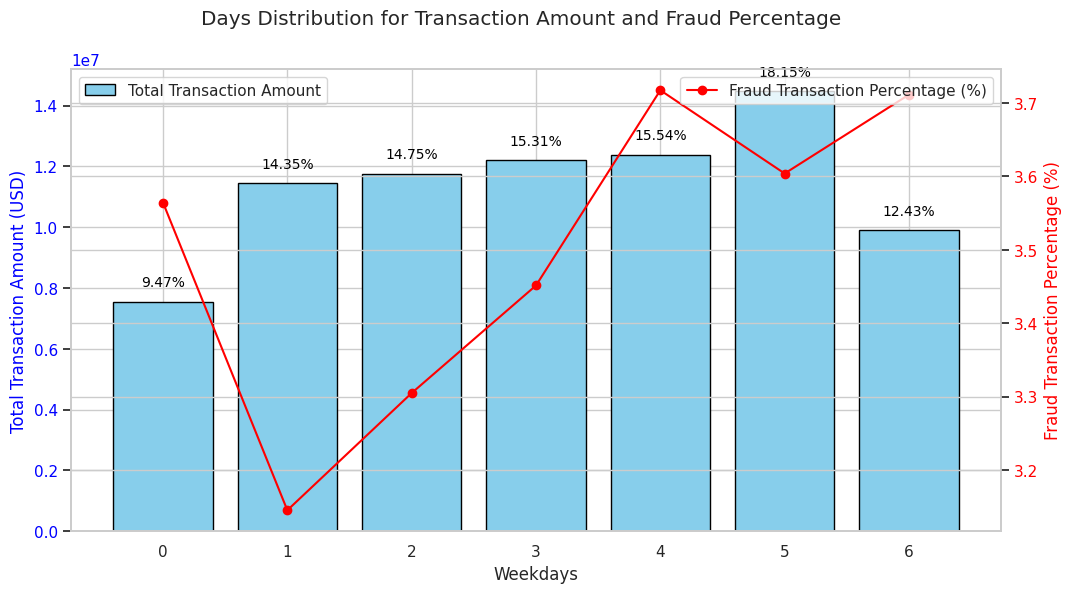

In [ ]:
# Calculate the total transaction amount for each Weekday, split by fraud and non-fraud
weekday_total_amt = train_data.groupby('Weekday')['TransactionAmt'].sum()                               # Aggregates the total transaction amount for all transactions on each weekday.
fraud_transactions = train_data[train_data['isFraud'] == 1]                                             # Filters only fraudulent transactions.
weekday_fraud_amt_sum = fraud_transactions.groupby('Weekday')['TransactionAmt'].sum()                   # Aggregates the total transaction amount for fraudulent transactions on each weekday.

# Calculate the overall transaction amount to get each day's percentage of it
total_amt = train_data['TransactionAmt'].sum()                                                          # Computes the total transaction amount across all data.
weekday_total_amt_percentage = (weekday_total_amt / total_amt) * 100                                    # Calculates the percentage of total transaction amounts for each weekday.

# Calculate the fraud transaction percentage (fraud count relative to total count per weekday)
weekday_total_counts = train_data['Weekday'].value_counts().sort_index()                                # Counts the total number of transactions for each weekday.
weekday_fraud_counts = fraud_transactions['Weekday'].value_counts().sort_index()                        # Counts the number of fraudulent transactions for each weekday.
weekday_fraud_percentage = (weekday_fraud_counts / weekday_total_counts) * 100                          # Calculates the percentage of fraudulent transactions for each weekday.

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for the total transaction amount by weekday
bars = ax1.bar(weekday_total_amt.index, weekday_total_amt.values, color='skyblue', edgecolor='black', label='Total Transaction Amount')   # Plots a bar chart showing total transaction amounts for each weekday.

ax1.set_xlabel('Weekdays')  # Sets the x-axis label.
ax1.set_ylabel('Total Transaction Amount (USD)', color='blue')                                          # Sets the y-axis label for total transaction amounts.
ax1.tick_params(axis='y', labelcolor='blue')                                                            # Colors y-axis labels for clarity.

# Annotate each bar with the percentage of the overall transaction amount
for i, bar in enumerate(bars):
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + total_amt * 0.005,
             f'{weekday_total_amt_percentage.iloc[i]:.2f}%', ha='center', va='bottom', fontsize=10, color='black')  # Adds percentage annotations above each bar.

# Secondary y-axis for fraud transaction percentage line plot
ax2 = ax1.twinx()
ax2.plot(weekday_fraud_percentage.index, weekday_fraud_percentage.values, color='red', marker='o', label='Fraud Transaction Percentage (%)')      # Plots a line graph showing the percentage of fraudulent transactions for each weekday.

ax2.set_ylabel('Fraud Transaction Percentage (%)', color='red')                                         # Sets the y-axis label for fraud percentage.
ax2.tick_params(axis='y', labelcolor='red')                                                             # Colors y-axis labels for clarity.

# Add title and legends
fig.suptitle('Days Distribution for Transaction Amount and Fraud Percentage')  # Sets the plot title.
ax1.legend(loc='upper left')                                                                            # Adds a legend for the bar chart.
ax2.legend(loc='upper right')                                                                           # Adds a legend for the line plot.

plt.show()                                                                                              # Displays the plot.

Here we calculate and visualize the distribution of total transaction counts and fraud percentages across weekdays. It uses a bar chart to represent the total number of transactions (fraudulent and non-fraudulent) for each day of the week and overlays a line plot to show the percentage of fraudulent transactions relative to the total transactions for each day.

The goal is to identify trends or patterns in transaction activity and fraud occurrences across different weekdays, aiding in fraud detection and analysis

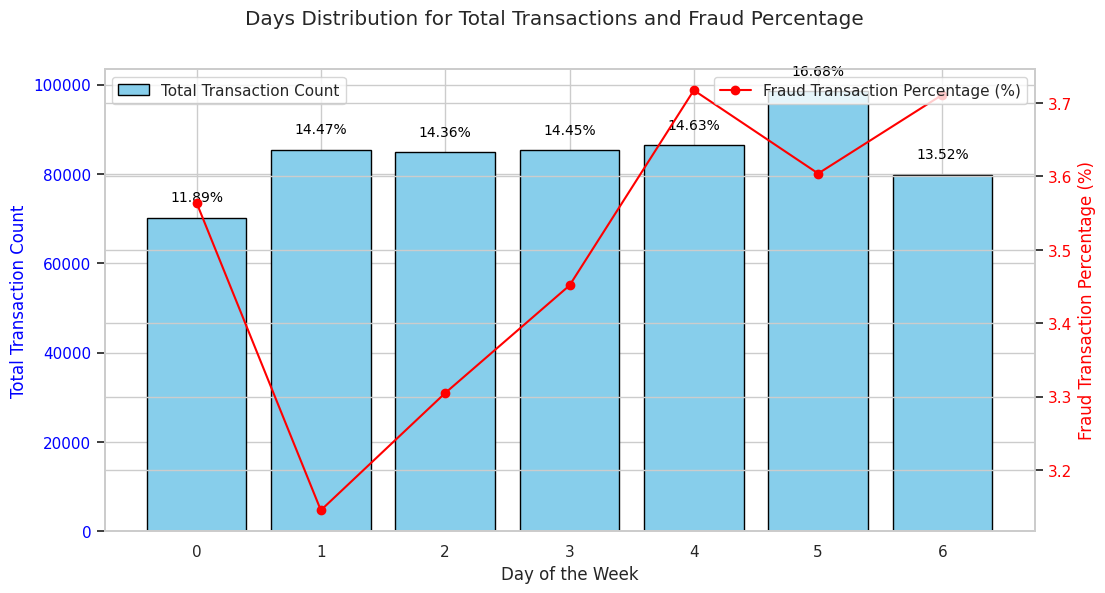

In [ ]:
# Calculate the total count of transactions (fraudulent + non-fraudulent) per weekday
weekday_total_counts = train_data['Weekday'].value_counts().sort_index()                # Total transaction count per weekday
fraud_transactions = train_data[train_data['isFraud'] == 1]
weekday_fraud_counts = fraud_transactions['Weekday'].value_counts().sort_index()        # Fraudulent transaction count per weekday

# Calculate the overall transaction count to get each day's percentage of it
total_transaction_count = len(train_data)
weekday_total_count_percentage = (weekday_total_counts / total_transaction_count) * 100 # Percentage of total transactions per weekday

# Calculate the fraud transaction percentage for each day
weekday_fraud_percentage = (weekday_fraud_counts / weekday_total_counts) * 100              # Percentage of fraud transactions per weekday

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for the total count of transactions by day
bars = ax1.bar(weekday_total_counts.index, weekday_total_counts.values, color='skyblue', edgecolor='black', label='Total Transaction Count')
ax1.set_xlabel('Day of the Week')
ax1.set_ylabel('Total Transaction Count', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Annotate each bar with the percentage of the overall transaction count
for i, bar in enumerate(bars):
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + total_transaction_count * 0.005,
             f'{weekday_total_count_percentage.iloc[i]:.2f}%', ha='center', va='bottom', fontsize=10, color='black')

# Secondary y-axis for fraud transaction percentage line plot
ax2 = ax1.twinx()
ax2.plot(weekday_fraud_percentage.index, weekday_fraud_percentage.values, color='red', marker='o', label='Fraud Transaction Percentage (%)')
ax2.set_ylabel('Fraud Transaction Percentage (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add title and legends
fig.suptitle('Days Distribution for Total Transactions and Fraud Percentage')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

#### **Day Features**

This code analyzes and visualizes the daily distribution of transaction amounts and fraud percentages. It computes the total transaction amount and fraud-specific transaction amounts for each day, determines the percentage of total transactions contributed by each day, and calculates the fraud transaction percentage relative to all transactions per day.
The goal is to identify daily patterns in transaction activities and fraud occurrences, aiding in fraud detection and behavioral analysis.

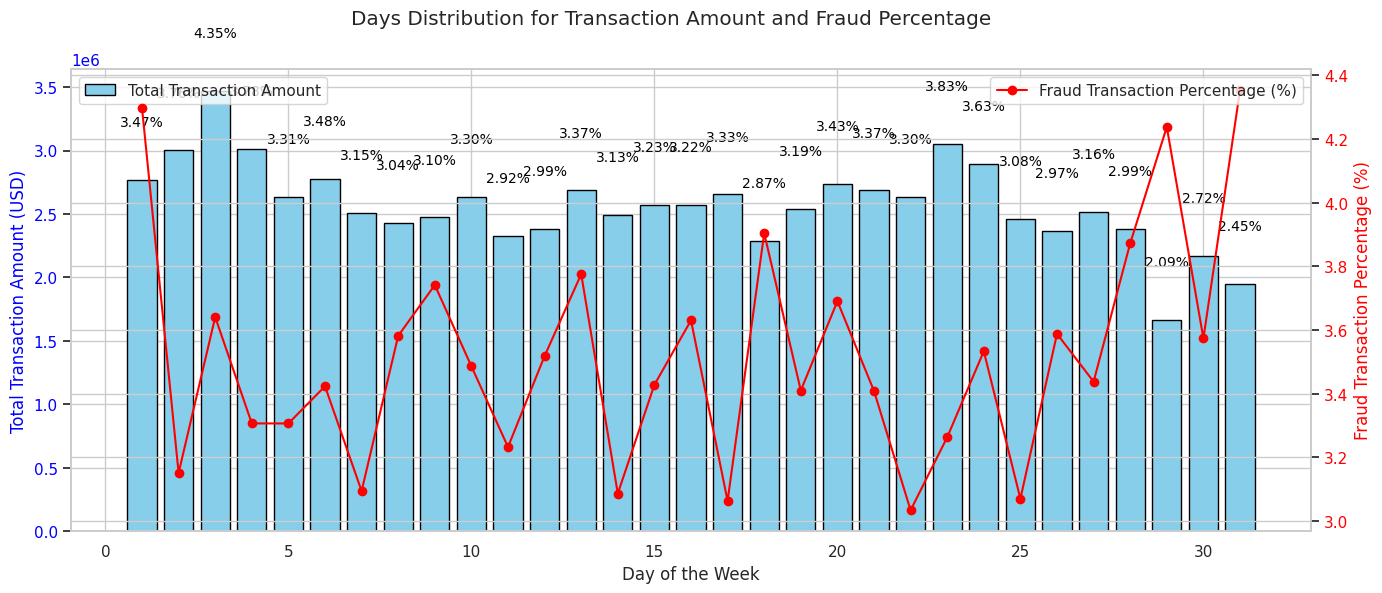

In [ ]:
# Calculate the total transaction amount for each day, split by fraud and non-fraud
day_total_amt = train_data.groupby('Day')['TransactionAmt'].sum()                    # Total transaction amount (fraud + non-fraud) per day
fraud_transactions = train_data[train_data['isFraud'] == 1]
day_fraud_amt_sum = fraud_transactions.groupby('Day')['TransactionAmt'].sum()         # Total fraud transaction amount per day

# Calculate the overall transaction amount to get each day's percentage of it
total_amt = train_data['TransactionAmt'].sum()
day_total_amt_percentage = (day_total_amt / total_amt) * 100                          # Percentage of total transaction amount per day

# Calculate the fraud transaction percentage (fraud count relative to total count per day)
day_total_counts = train_data['Day'].value_counts().sort_index()                      # Total transactions per day
day_fraud_counts = fraud_transactions['Day'].value_counts().sort_index()              # Fraud transactions per day
day_fraud_percentage = (day_fraud_counts / day_total_counts) * 100                    # Percentage of fraud transactions per day

# Plotting
fig, ax1 = plt.subplots(figsize=(16, 6))

# Bar plot for the total transaction amount by day
bars = ax1.bar(day_total_amt.index, day_total_amt.values, color='skyblue', edgecolor='black', label='Total Transaction Amount')
ax1.set_xlabel('Day of the Week')
ax1.set_ylabel('Total Transaction Amount (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Annotate each bar with the percentage of the overall transaction amount
for i, bar in enumerate(bars):
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + total_amt * 0.005,
             f'{day_total_amt_percentage.iloc[i]:.2f}%', ha='center', va='bottom', fontsize=10, color='black')

# Secondary y-axis for fraud transaction percentage line plot
ax2 = ax1.twinx()
ax2.plot(day_fraud_percentage.index, day_fraud_percentage.values, color='red', marker='o', label='Fraud Transaction Percentage (%)')
ax2.set_ylabel('Fraud Transaction Percentage (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add title and legends
fig.suptitle('Days Distribution for Transaction Amount and Fraud Percentage')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


This code analyzes and visualizes the daily distribution of transaction counts and fraud percentages. It calculates the total transaction count, the percentage of transactions for each day, and the percentage of fraudulent transactions relative to all transactions for each day. The visualization combines:
The purpose is to identify trends in transaction activity and fraud distribution across days, supporting fraud detection and monitoring.

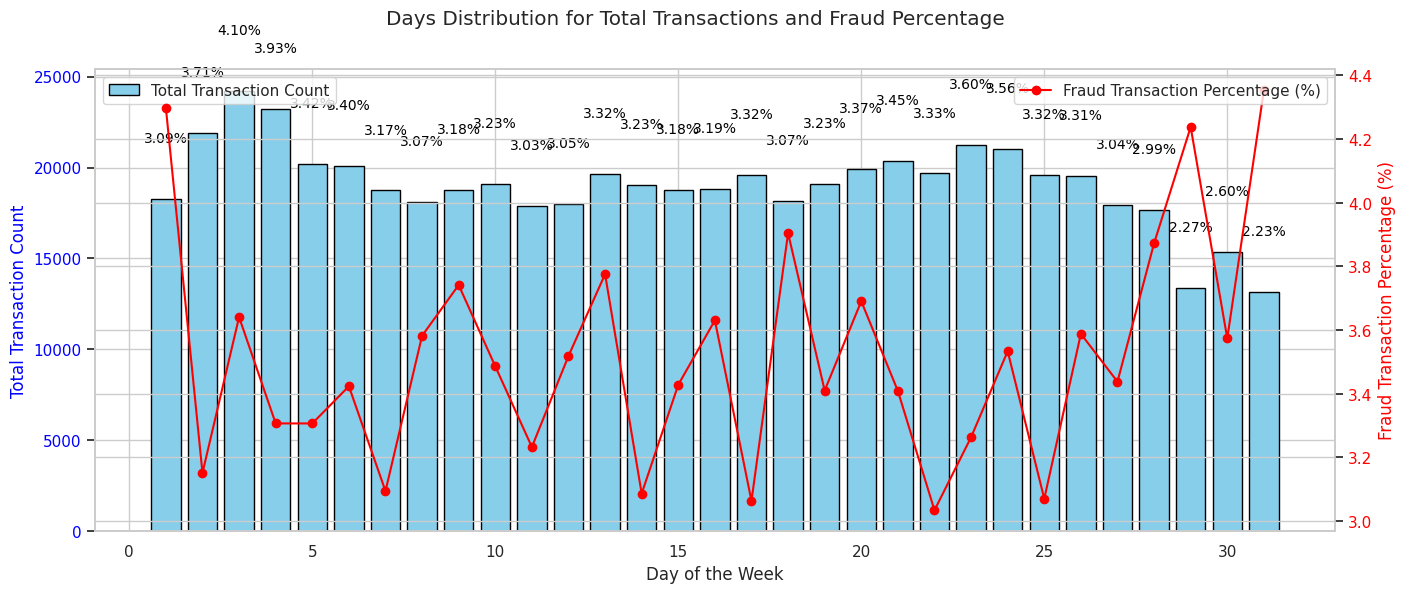

In [ ]:
# Calculate the total count of transactions (fraudulent + non-fraudulent) per day
day_total_counts = train_data['Day'].value_counts().sort_index()                # Total transaction count per day
fraud_transactions = train_data[train_data['isFraud'] == 1]
day_fraud_counts = fraud_transactions['Day'].value_counts().sort_index()        # Fraudulent transaction count per day

# Calculate the overall transaction count to get each day's percentage of it
total_transaction_count = len(train_data)
day_total_count_percentage = (day_total_counts / total_transaction_count) * 100 # Percentage of total transactions per day

# Calculate the fraud transaction percentage for each day
day_fraud_percentage = (day_fraud_counts / day_total_counts) * 100              # Percentage of fraud transactions per day

# Plotting
fig, ax1 = plt.subplots(figsize=(16, 6))

# Bar plot for the total count of transactions by day
bars = ax1.bar(day_total_counts.index, day_total_counts.values, color='skyblue', edgecolor='black', label='Total Transaction Count')
ax1.set_xlabel('Day of the Week')
ax1.set_ylabel('Total Transaction Count', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Annotate each bar with the percentage of the overall transaction count
for i, bar in enumerate(bars):
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + total_transaction_count * 0.005,
             f'{day_total_count_percentage.iloc[i]:.2f}%', ha='center', va='bottom', fontsize=10, color='black')

# Secondary y-axis for fraud transaction percentage line plot
ax2 = ax1.twinx()
ax2.plot(day_fraud_percentage.index, day_fraud_percentage.values, color='red', marker='o', label='Fraud Transaction Percentage (%)')
ax2.set_ylabel('Fraud Transaction Percentage (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add title and legends
fig.suptitle('Days Distribution for Total Transactions and Fraud Percentage')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


#### **Hours**

This code analyzes and visualizes the hourly distribution of transaction counts and fraud percentages. It calculates: The total transaction count per hour,
The percentage of total transactions for each hour,
The percentage of fraudulent transactions relative to total transactions for each hour.
The purpose is to identify patterns in transaction activity and fraud occurrences across different hours of the day, aiding in time-based fraud detection and analysis.

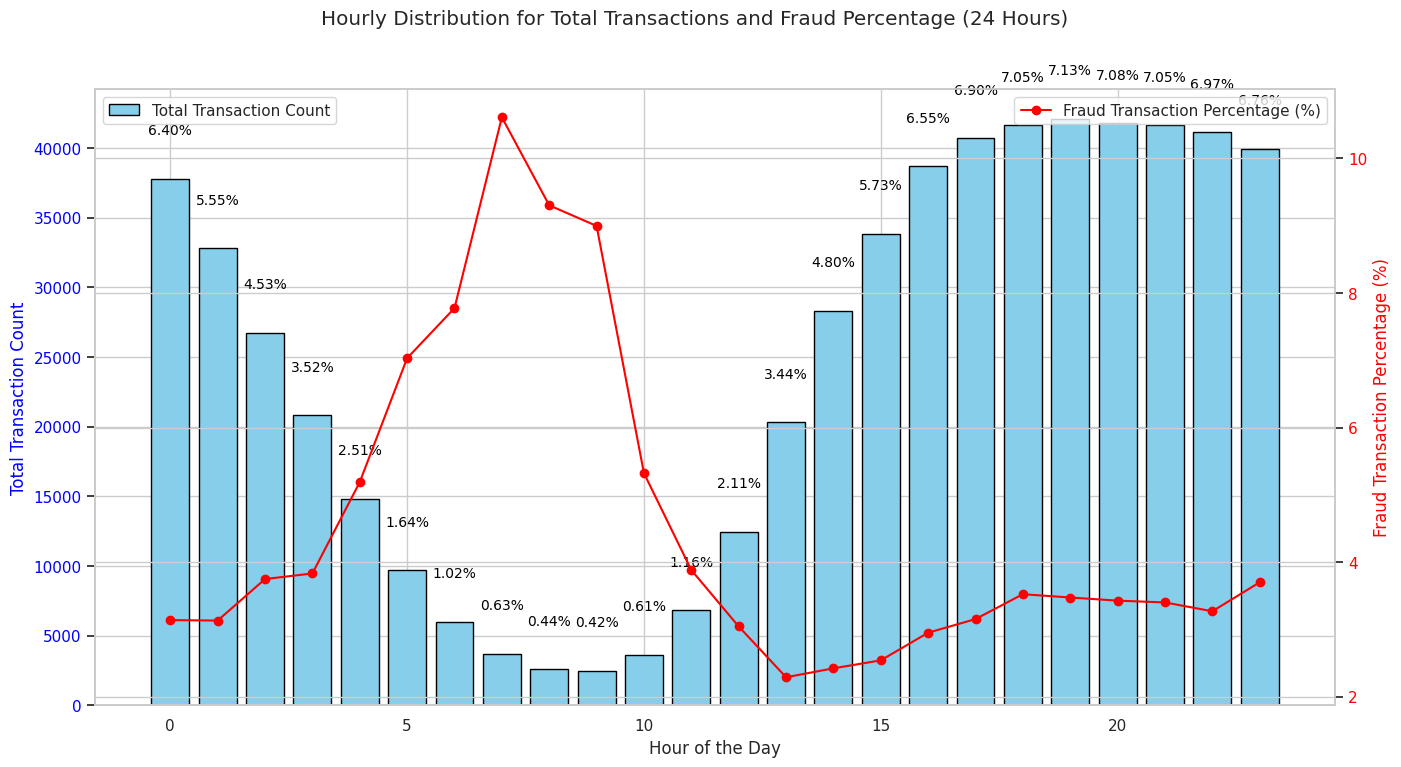

In [ ]:
# Calculate the total count of transactions (fraudulent + non-fraudulent) per hour
hour_total_counts = train_data['Hour'].value_counts().sort_index()                # Total transaction count per hour
fraud_transactions = train_data[train_data['isFraud'] == 1]
hour_fraud_counts = fraud_transactions['Hour'].value_counts().sort_index()        # Fraudulent transaction count per hour

# Calculate the overall transaction count to get each hour's percentage of it
total_transaction_count = len(train_data)
hour_total_count_percentage = (hour_total_counts / total_transaction_count) * 100 # Percentage of total transactions per hour

# Calculate the fraud transaction percentage for each hour
hour_fraud_percentage = (hour_fraud_counts / hour_total_counts) * 100             # Percentage of fraud transactions per hour

# Plotting
fig, ax1 = plt.subplots(figsize=(16, 8))

# Bar plot for the total count of transactions by hour
bars = ax1.bar(hour_total_counts.index, hour_total_counts.values, color='skyblue', edgecolor='black', label='Total Transaction Count')
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Total Transaction Count', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Annotate each bar with the percentage of the overall transaction count
for i, bar in enumerate(bars):
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + total_transaction_count * 0.005,
             f'{hour_total_count_percentage.iloc[i]:.2f}%', ha='center', va='bottom', fontsize=10, color='black')

# Secondary y-axis for fraud transaction percentage line plot
ax2 = ax1.twinx()
ax2.plot(hour_fraud_percentage.index, hour_fraud_percentage.values, color='red', marker='o', label='Fraud Transaction Percentage (%)')
ax2.set_ylabel('Fraud Transaction Percentage (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add title and legends
fig.suptitle('Hourly Distribution for Total Transactions and Fraud Percentage (24 Hours)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


This code analyzes and visualizes the hourly distribution of transaction amounts and fraud percentages. It computes:
The total transaction amount (fraudulent and non-fraudulent) for each hour,
The percentage of the overall transaction amount contributed by each hour,
The percentage of fraudulent transactions relative to the total transactions for each hour.
The purpose is to identify patterns in transaction volumes and fraud behavior across different hours of the day, providing insights for time-based fraud analysis and monitoring.

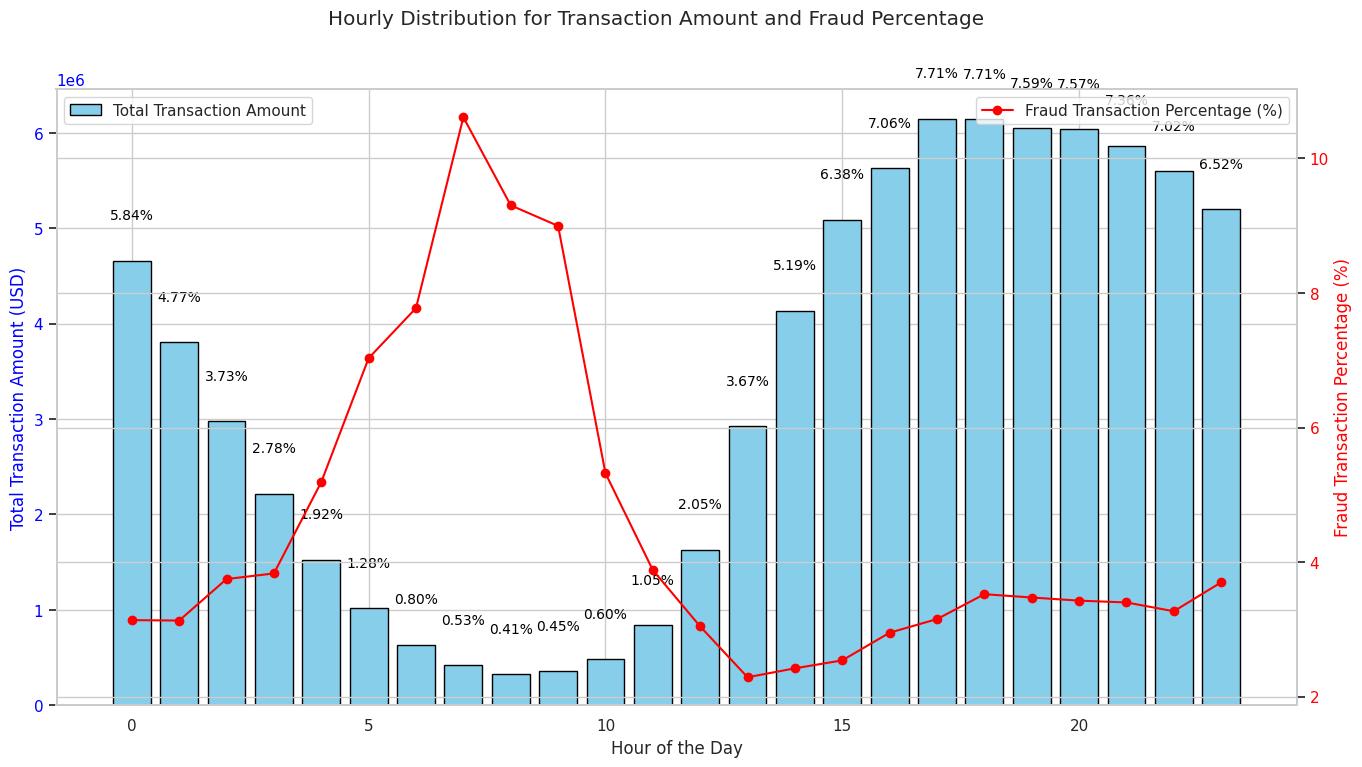

In [ ]:
# Calculate the total transaction amount for each hour, split by fraud and non-fraud
hour_total_amt = train_data.groupby('Hour')['TransactionAmt'].sum()                    # Total transaction amount (fraud + non-fraud) per hour
fraud_transactions = train_data[train_data['isFraud'] == 1]
hour_fraud_amt_sum = fraud_transactions.groupby('Hour')['TransactionAmt'].sum()         # Total fraud transaction amount per hour

# Calculate the overall transaction amount to get each hour's percentage of it
total_amt = train_data['TransactionAmt'].sum()
hour_total_amt_percentage = (hour_total_amt / total_amt) * 100                          # Percentage of total transaction amount per hour

# Calculate the fraud transaction percentage (fraud count relative to total count per hour)
hour_total_counts = train_data['Hour'].value_counts().sort_index()                      # Total transactions per hour
hour_fraud_counts = fraud_transactions['Hour'].value_counts().sort_index()              # Fraud transactions per hour
hour_fraud_percentage = (hour_fraud_counts / hour_total_counts) * 100                   # Percentage of fraud transactions per hour

# Plotting
fig, ax1 = plt.subplots(figsize=(16, 8))

# Bar plot for the total transaction amount by hour
bars = ax1.bar(hour_total_amt.index, hour_total_amt.values, color='skyblue', edgecolor='black', label='Total Transaction Amount')
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Total Transaction Amount (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Annotate each bar with the percentage of the overall transaction amount
for i, bar in enumerate(bars):
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + total_amt * 0.005,
             f'{hour_total_amt_percentage.iloc[i]:.2f}%', ha='center', va='bottom', fontsize=10, color='black')

# Secondary y-axis for fraud transaction percentage line plot
ax2 = ax1.twinx()
ax2.plot(hour_fraud_percentage.index, hour_fraud_percentage.values, color='red', marker='o', label='Fraud Transaction Percentage (%)')
ax2.set_ylabel('Fraud Transaction Percentage (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add title and legends
fig.suptitle('Hourly Distribution for Transaction Amount and Fraud Percentage')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


#### **2. Days Since Last Transaction (Using D1)**

This code introduces new features to analyze transaction behavior:
* D1_High: Identifies whether a card's transactions are frequent or infrequent based on D1.
* Time_Diff_Between_Transactions: Measures the time gap between consecutive transactions.
* Rapid_Transaction: Flags transactions occurring in rapid succession, which may indicate unusual activity.

These features can help detect patterns, anomalies, or potential fraud based on transaction frequency and intervals.

In [ ]:
# Sort the data by Card ID and TransactionDT to calculate intervals correctly
train_data = train_data.sort_values(by=['card1', 'TransactionDT'])

# 1. Days Since Last Transaction (Using D1)
# D1 is already a feature in the dataset representing days since the last transaction.
# Here, we keep it as is for analysis, or we can use D1 to mark high values as infrequent usage and low values as rapid usage.

# Create a binary indicator for high/low D1 values based on a threshold (e.g., median D1)
median_d1 = train_data['D1'].median()
train_data['D1_High'] = (train_data['D1'] > median_d1).astype(int)  # 1 if days since last transaction is high, else 0

# 2. Time Intervals Between Transactions
# Calculate time difference in seconds between consecutive transactions for each card
train_data['Time_Diff_Between_Transactions'] = train_data.groupby('card1')['TransactionDT'].diff()

# Set a threshold for rapid transactions
# Here, we'll create a binary indicator for rapid transactions based on a threshold (e.g., 1 hour = 3600 seconds)
train_data['Rapid_Transaction'] = (train_data['Time_Diff_Between_Transactions'] < 3600).astype(int)

# Display the new features
train_data[['card1', 'TransactionDT', 'D1', 'D1_High', 'Time_Diff_Between_Transactions', 'Rapid_Transaction']].head()


card1  TransactionDT    D1  D1_High  Time_Diff_Between_Transactions  \
243924   1000        5787419   0.0        0                             NaN   
36634    1001         916268   0.0        0                             NaN   
164336   1001        3504180  30.0        1                       2587912.0   
223739   1001        5270458  51.0        1                       1766278.0   
33767    1004         842821   0.0        0                             NaN   

        Rapid_Transaction  
243924                  0  
36634                   0  
164336                  0  
223739                  0  
33767                   0

### **3. Card and Payment Information Features**

This code creates several new features to analyze transaction behavior for fraud detection:

1. Anomaly Detection: Identifies anomalous transactions using Z-scores based on
the mean and standard deviation of transaction amounts per card.
2. Spending Velocity: Measures the rate of spending by dividing transaction amounts by the time interval between consecutive transactions. Flags high-velocity transactions.
3. Product Code Analysis:Computes the volume of transactions for each product code, providing insights into transaction patterns by product type.

These features help detect unusual spending behavior, rapid transactions, and card-specific anomalies, aiding in fraud detection and pattern analysis.

In [ ]:
# 1. Average and Standard Deviation of Transaction Amount per Card ID
# Group by card1 to calculate average and standard deviation of TransactionAmt
card_stats = train_data.groupby('card1')['TransactionAmt'].agg(['mean', 'std']).rename(columns={'mean': 'TransactionAmt_Mean', 'std': 'TransactionAmt_Std'})
train_data = train_data.merge(card_stats, on='card1', how='left')

# Calculate Z-score for each transaction amount to identify anomalies
train_data['TransactionAmt_Zscore'] = (train_data['TransactionAmt'] - train_data['TransactionAmt_Mean']) / train_data['TransactionAmt_Std']

# Flag transactions with a high Z-score as potential anomalies (e.g., Z > 3 or Z < -3)
train_data['TransactionAmt_Anomalous'] = (train_data['TransactionAmt_Zscore'].abs() > 3).astype(int)

# 2. Spending Velocity (Amount per Time Interval)
# First, calculate time difference between consecutive transactions for each card ID
train_data = train_data.sort_values(by=['card1', 'TransactionDT'])
train_data['Time_Diff_Between_Transactions'] = train_data.groupby('card1')['TransactionDT'].diff()

# Calculate spending velocity as transaction amount divided by time interval
# Use 'TransactionAmt_Per_Hour' as the feature name
train_data['TransactionAmt_Per_Hour'] = train_data['TransactionAmt'] / (train_data['Time_Diff_Between_Transactions'] / 3600)

# Flag high-velocity transactions based on a threshold (e.g., top 1% of TransactionAmt_Per_Hour)
high_velocity_threshold = train_data['TransactionAmt_Per_Hour'].quantile(0.99)
train_data['High_Spending_Velocity'] = (train_data['TransactionAmt_Per_Hour'] > high_velocity_threshold).astype(int)

# 3. Transaction Volume per Product Code
# Group by card1 and ProductCD to calculate transaction count per product code
product_volume = train_data.groupby(['card1', 'ProductCD']).size().unstack(fill_value=0).add_prefix('ProductCD_Volume_')
train_data = train_data.join(product_volume, on='card1')

# Display the new features
train_data[['card1', 'TransactionAmt', 'TransactionAmt_Mean', 'TransactionAmt_Std', 'TransactionAmt_Zscore',
            'TransactionAmt_Anomalous', 'Time_Diff_Between_Transactions', 'TransactionAmt_Per_Hour',
            'High_Spending_Velocity'] + list(product_volume.columns)].head()


card1  TransactionAmt  TransactionAmt_Mean  TransactionAmt_Std  \
0   1000          23.443            23.443000                 NaN   
1   1001         183.000            79.666667           89.494879   
2   1001          29.000            79.666667           89.494879   
3   1001          27.000            79.666667           89.494879   
4   1004         150.000           136.400000           93.577775   

   TransactionAmt_Zscore  TransactionAmt_Anomalous  \
0                    NaN                         0   
1               1.154628                         0   
2              -0.566140                         0   
3              -0.588488                         0   
4               0.145334                         0   

   Time_Diff_Between_Transactions  TransactionAmt_Per_Hour  \
0                             NaN                      NaN   
1                             NaN                      NaN   
2                       2587912.0                 0.040341   
3                       1766278.0                 0.055031   
4                             NaN                      NaN   

   High_Spending_Velocity  ProductCD_Volume_C  ProductCD_Volume_H  \
0                       0                   1                   0   
1                       0                   0                   0   
2                       0                   0                   0   
3                       0                   0                   0   
4                       0                   0                   2   

   ProductCD_Volume_R  ProductCD_Volume_S  ProductCD_Volume_W  
0                   0                   0                   0  
1                   0                   0                   3  
2                   0                   0                   3  
3                   0                   0                   3  
4                   1                   0                   2

#### **4. Geolocation Features**

This code creates features to analyze transaction behavior and location consistency:

1. Anomaly Detection: Identifies anomalies in dist1 and dist2 using rolling statistics and Z-scores. Flags transactions with large deviations as potentially anomalous.
2. Location Consistency: Measures the variability of location data (addr1, addr2) for each card by counting the unique values. High variability might indicate unusual or suspicious activity.

These features are useful for detecting anomalies in transaction patterns and identifying inconsistent or suspicious location behavior, aiding in fraud detection.

In [ ]:
# Sort the data by card1 and TransactionDT for correct rolling calculations
train_data = train_data.sort_values(by=['card1', 'TransactionDT'])

# 1. Distance-Based Anomalies for dist1 and dist2
# Calculate rolling mean and standard deviation for dist1 within each card
train_data['dist1_Rolling_Mean'] = train_data.groupby('card1')['dist1'].transform(lambda x: x.rolling(window=5, min_periods=1).mean())
train_data['dist1_Rolling_Std'] = train_data.groupby('card1')['dist1'].transform(lambda x: x.rolling(window=5, min_periods=1).std())

# Calculate Z-score for dist1 to identify anomalies
train_data['dist1_Zscore'] = (train_data['dist1'] - train_data['dist1_Rolling_Mean']) / train_data['dist1_Rolling_Std']

# Flag large shifts in dist1 based on Z-score threshold (e.g., |Z-score| > 3)
train_data['dist1_Anomalous'] = (train_data['dist1_Zscore'].abs() > 3).astype(int)

# Repeat the process for dist2
train_data['dist2_Rolling_Mean'] = train_data.groupby('card1')['dist2'].transform(lambda x: x.rolling(window=5, min_periods=1).mean())
train_data['dist2_Rolling_Std'] = train_data.groupby('card1')['dist2'].transform(lambda x: x.rolling(window=5, min_periods=1).std())
train_data['dist2_Zscore'] = (train_data['dist2'] - train_data['dist2_Rolling_Mean']) / train_data['dist2_Rolling_Std']
train_data['dist2_Anomalous'] = (train_data['dist2_Zscore'].abs() > 3).astype(int)

# 2. Location Consistency (using addr1 and addr2)
# Count unique values of addr1 and addr2 per card to assess location variability
location_counts = train_data.groupby('card1').agg({
    'addr1': 'nunique',
    'addr2': 'nunique'
}).rename(columns={'addr1': 'Unique_addr1_Count', 'addr2': 'Unique_addr2_Count'})

# Merge location consistency features back into the main DataFrame
train_data = train_data.merge(location_counts, on='card1', how='left')

# Display the new features
train_data[['card1', 'TransactionDT', 'dist1', 'dist2', 'dist1_Rolling_Mean', 'dist1_Rolling_Std',
            'dist1_Zscore', 'dist1_Anomalous', 'dist2_Rolling_Mean', 'dist2_Rolling_Std',
            'dist2_Zscore', 'dist2_Anomalous', 'Unique_addr1_Count', 'Unique_addr2_Count']].head()


card1  TransactionDT  dist1  dist2  dist1_Rolling_Mean  dist1_Rolling_Std  \
0   1000        5787419    NaN    NaN                 NaN                NaN   
1   1001         916268   11.0    NaN                11.0                NaN   
2   1001        3504180    NaN    NaN                11.0                NaN   
3   1001        5270458    NaN    NaN                11.0                NaN   
4   1004         842821    NaN    NaN                 NaN                NaN   

   dist1_Zscore  dist1_Anomalous  dist2_Rolling_Mean  dist2_Rolling_Std  \
0           NaN                0                 NaN                NaN   
1           NaN                0                 NaN                NaN   
2           NaN                0                 NaN                NaN   
3           NaN                0                 NaN                NaN   
4           NaN                0                 NaN                NaN   

   dist2_Zscore  dist2_Anomalous  Unique_addr1_Count  Unique_addr2_Count  
0           NaN                0                   0                   0  
1           NaN                0                   1                   1  
2           NaN                0                   1                   1  
3           NaN                0                   1                   1  
4           NaN                0                   3                   1

#### **5. Device and Network Features**

This code creates features to assess the consistency of device and network usage for each card:

Device Consistency:
1. Counts unique DeviceType and DeviceInfo values per card to identify whether a card is associated with multiple devices.
2. Flags cards with inconsistent device usage.

Network Consistency:
1. Counts unique IP addresses and ISPs for each card to assess variability in network usage.
2. Flags cards with inconsistent network usage.

These features help detect suspicious behavior, such as a card being used across multiple devices or networks, which could indicate potential fraud or unauthorized activity.

In [ ]:
# 1. Device Consistency per Card
# Count unique values of DeviceType and DeviceInfo per card
device_counts = train_data.groupby('card1').agg({
    'DeviceType': 'nunique',
    'DeviceInfo': 'nunique'
}).rename(columns={'DeviceType': 'Unique_DeviceType_Count', 'DeviceInfo': 'Unique_DeviceInfo_Count'})

# Merge device consistency features back into the main DataFrame
train_data = train_data.merge(device_counts, on='card1', how='left')

# Flag inconsistent device usage if the count of unique DeviceType or DeviceInfo is high
# Here, we flag cards with more than one device type or device info as potentially inconsistent
train_data['Inconsistent_DeviceType'] = (train_data['Unique_DeviceType_Count'] > 1).astype(int)
train_data['Inconsistent_DeviceInfo'] = (train_data['Unique_DeviceInfo_Count'] > 1).astype(int)

# 2. IP and ISP Consistency
# Count unique values of IP addresses (id_30, id_31, id_32 if available) per card
# We use id_30 for IP, id_31 for ISP, and id_32 for additional IP-level consistency if available
network_counts = train_data.groupby('card1').agg({
    'id_30': 'nunique',  # Number of unique IP addresses
    'id_31': 'nunique',  # Number of unique ISPs
    'id_32': 'nunique'   # Additional IP-level feature
}).rename(columns={'id_30': 'Unique_IP_Count', 'id_31': 'Unique_ISP_Count', 'id_32': 'Unique_IP_Additional_Count'})

# Merge IP and ISP consistency features back into the main DataFrame
train_data = train_data.merge(network_counts, on='card1', how='left')

# Flag network inconsistency if the count of unique IPs or ISPs is high
# Here, we flag cards with more than one unique IP or ISP as potentially inconsistent
train_data['Inconsistent_IP'] = (train_data['Unique_IP_Count'] > 1).astype(int)
train_data['Inconsistent_ISP'] = (train_data['Unique_ISP_Count'] > 1).astype(int)

# Display the new features
train_data[['card1', 'DeviceType', 'DeviceInfo', 'Unique_DeviceType_Count', 'Unique_DeviceInfo_Count',
            'Inconsistent_DeviceType', 'Inconsistent_DeviceInfo', 'Unique_IP_Count',
            'Unique_ISP_Count', 'Unique_IP_Additional_Count', 'Inconsistent_IP', 'Inconsistent_ISP']].head()

card1 DeviceType                DeviceInfo  Unique_DeviceType_Count  \
0   1000     mobile  F3213 Build/36.0.A.2.146                        1   
1   1001        NaN                       NaN                        0   
2   1001        NaN                       NaN                        0   
3   1001        NaN                       NaN                        0   
4   1004    desktop                     MacOS                        2   

   Unique_DeviceInfo_Count  Inconsistent_DeviceType  Inconsistent_DeviceInfo  \
0                        1                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        3                        1                        1   

   Unique_IP_Count  Unique_ISP_Count  Unique_IP_Additional_Count  \
0                0                 1                           0   
1                0                 0                           0   
2                0                 0                           0   
3                0                 0                           0   
4                3                 3                           2   

   Inconsistent_IP  Inconsistent_ISP  
0                0                 0  
1                0                 0  
2                0                 0  
3                0                 0  
4                1                 1

#### **6. Email Domain Features**

Here we will create features to analyze email domain behavior, providing insights into potential anomalies and fraud:

1. Email Domain Matching: Flags whether the purchaser's and recipient's email domains match, which may indicate a more typical or atypical transaction.
2. Common/Uncommon Domains: Identifies transactions involving common email domains (e.g., Gmail, Yahoo) versus less typical ones.
3. Domain Sharing Frequency: Tracks how frequently email domains are associated with multiple cards. Flags domains with unusually high sharing, which might indicate potential misuse or fraud.

These features enhance the detection of unusual email usage patterns and potential fraudulent activity.

In [ ]:
# 1. Email Domain Matching (P_emaildomain == R_emaildomain)
# Create a binary feature to flag if purchaser and recipient email domains match
train_data['EmailDomain_Match'] = (train_data['P_emaildomain'] == train_data['R_emaildomain']).astype(int)

# 2. Common/Uncommon Domain Flag
# Define a list of common email domains (Gmail, Yahoo, etc.)
common_domains = ['gmail.com', 'yahoo.com', 'hotmail.com', 'aol.com', 'outlook.com', 'icloud.com', 'mail.com']

# Create a flag for common and uncommon domains for P_emaildomain and R_emaildomain
train_data['P_emaildomain_Common'] = train_data['P_emaildomain'].apply(lambda x: 1 if str(x).lower() in common_domains else 0)
train_data['R_emaildomain_Common'] = train_data['R_emaildomain'].apply(lambda x: 1 if str(x).lower() in common_domains else 0)

# Combine into a single common/uncommon domain flag for both P_emaildomain and R_emaildomain
train_data['Emaildomain_Common_Flag'] = train_data['P_emaildomain_Common'] | train_data['R_emaildomain_Common']

# 3. Domain Sharing Frequency
# Calculate the frequency of each P_emaildomain and R_emaildomain across multiple cards
# We count how often each email domain is associated with different card IDs (card1)
p_domain_counts = train_data.groupby('P_emaildomain')['card1'].nunique().rename('P_emaildomain_Sharing_Frequency')
r_domain_counts = train_data.groupby('R_emaildomain')['card1'].nunique().rename('R_emaildomain_Sharing_Frequency')

# Merge domain sharing frequency back into the main DataFrame
train_data = train_data.merge(p_domain_counts, on='P_emaildomain', how='left')
train_data = train_data.merge(r_domain_counts, on='R_emaildomain', how='left')

# Flag email domains with high sharing frequency (e.g., > certain threshold)
high_sharing_threshold = 5  # Define your threshold
train_data['P_emaildomain_High_Sharing'] = (train_data['P_emaildomain_Sharing_Frequency'] > high_sharing_threshold).astype(int)
train_data['R_emaildomain_High_Sharing'] = (train_data['R_emaildomain_Sharing_Frequency'] > high_sharing_threshold).astype(int)

# Display the new features
train_data[['P_emaildomain', 'R_emaildomain', 'EmailDomain_Match',
            'P_emaildomain_Common', 'R_emaildomain_Common', 'Emaildomain_Common_Flag',
            'P_emaildomain_Sharing_Frequency', 'R_emaildomain_Sharing_Frequency',
            'P_emaildomain_High_Sharing', 'R_emaildomain_High_Sharing']].head()

P_emaildomain R_emaildomain  EmailDomain_Match  P_emaildomain_Common  \
0     gmail.com     gmail.com                  1                     1   
1     yahoo.com           NaN                  0                     1   
2     yahoo.com           NaN                  0                     1   
3     yahoo.com           NaN                  0                     1   
4     gmail.com     yahoo.com                  0                     1   

   R_emaildomain_Common  Emaildomain_Common_Flag  \
0                     1                        1   
1                     0                        1   
2                     0                        1   
3                     0                        1   
4                     1                        1   

   P_emaildomain_Sharing_Frequency  R_emaildomain_Sharing_Frequency  \
0                           8933.0                           5093.0   
1                           5751.0                              NaN   
2                           5751.0                              NaN   
3                           5751.0                              NaN   
4                           8933.0                           2163.0   

   P_emaildomain_High_Sharing  R_emaildomain_High_Sharing  
0                           1                           1  
1                           1                           0  
2                           1                           0  
3                           1                           0  
4                           1                           1

#### **7. Behavioural Features**

Here we will create features to detect anomalies and unusual patterns in transactions:

1. Transaction Matching Patterns: Aggregates mismatch information from M1 to M9 to detect transactions with multiple mismatches or any mismatch.

2. Usage Patterns for Count Features:
* Computes aggregate statistics (sum, mean) for count-related features (C1 to
C14) to understand transaction behavior.
* Flags cards with unusually high usage across count features, indicating potentially suspicious activity.

These features are valuable for identifying unusual or inconsistent transaction patterns, which may indicate fraudulent behavior.

In [ ]:
# 1. Transaction Matching Patterns (M1-M9)
# For M1-M9, we assume a binary pattern of matching (e.g., M1 might indicate whether name matches address).
# Let's create a feature that counts how many of M1-M9 show mismatches (assuming 0 means a mismatch).
matching_columns = ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']

# Create a feature that counts how many M1-M9 features indicate a mismatch
train_data['M_Mismatch_Count'] = train_data[matching_columns].apply(lambda x: (x == 0).sum(), axis=1)

# Create a binary flag for any mismatch (if any of M1-M9 shows a mismatch)
train_data['Any_Mismatch_Flag'] = (train_data['M_Mismatch_Count'] > 0).astype(int)

# 2. Usage Patterns for Count Features (C1-C14)
# Aggregate statistics (sum, mean, etc.) for C1-C14 features by card1
count_columns = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14']
count_aggregates = train_data.groupby('card1')[count_columns].agg(['sum', 'mean'])

# Flatten the multi-level column index
count_aggregates.columns = [f'{col[0]}_agg_{col[1]}' for col in count_aggregates.columns]

# Merge the flattened DataFrame back into the main DataFrame
train_data = train_data.merge(count_aggregates, on='card1', how='left')

# Create a flag for suspiciously high counts if desired, for example:
# Flagging cards with an unusually high sum across C1-C14 (e.g., sum greater than a certain threshold)
train_data['High_Count_Flag'] = (train_data[[f'C{i}_agg_sum' for i in range(1, 15)]].sum(axis=1) > 100).astype(int)

# Display the new features
train_data[['card1', 'M_Mismatch_Count', 'Any_Mismatch_Flag'] + list(count_aggregates.columns) + ['High_Count_Flag']].head()



card1  M_Mismatch_Count  Any_Mismatch_Flag  C1_agg_sum  C1_agg_mean  \
0   1000                 0                  0         2.0          2.0   
1   1001                 0                  0         6.0          2.0   
2   1001                 0                  0         6.0          2.0   
3   1001                 0                  0         6.0          2.0   
4   1004                 0                  0         5.0          1.0   

   C2_agg_sum  C2_agg_mean  C3_agg_sum  C3_agg_mean  C4_agg_sum  ...  \
0         2.0          2.0         0.0          0.0         1.0  ...   
1         3.0          1.0         0.0          0.0         0.0  ...   
2         3.0          1.0         0.0          0.0         0.0  ...   
3         3.0          1.0         0.0          0.0         0.0  ...   
4         5.0          1.0         0.0          0.0         1.0  ...   

   C10_agg_mean  C11_agg_sum  C11_agg_mean  C12_agg_sum  C12_agg_mean  \
0           2.0          1.0           1.0          1.0           1.0   
1           0.0          3.0           1.0          0.0           0.0   
2           0.0          3.0           1.0          0.0           0.0   
3           0.0          3.0           1.0          0.0           0.0   
4           0.6          5.0           1.0          2.0           0.4   

   C13_agg_sum  C13_agg_mean  C14_agg_sum  C14_agg_mean  High_Count_Flag  
0          1.0           1.0          1.0           1.0                0  
1          9.0           3.0          6.0           2.0                0  
2          9.0           3.0          6.0           2.0                0  
3          9.0           3.0          6.0           2.0                0  
4          3.0           0.6          3.0           0.6                0  

[5 rows x 32 columns]

#### **8. Network Relationship Features**

###### **Shared IP and Device Frequency**

Here we will create features to analyze the sharing frequency of IP addresses and devices:

1. IP Sharing:Tracks how many unique cards and email domains are associated with each IP address. High sharing may indicate unusual behavior, such as multiple accounts using the same IP.
2. Device Sharing:Tracks how many unique cards and email domains are associated with each device. High sharing could signal shared or compromised devices.

These features help identify potentially suspicious activity, such as multiple accounts or transactions originating from the same IP or device, which could be indicative of fraud.

In [ ]:
# 1. Shared IP and Device Frequency
# Count how many unique cards or email domains are associated with each IP address and device

# IP sharing (id_30 for IP addresses)
ip_card_count = train_data.groupby('id_30')['card1'].nunique().rename('IP_Shared_Card_Count')
ip_email_count = train_data.groupby('id_30')['P_emaildomain'].nunique().rename('IP_Shared_Email_Count')

# Device sharing (DeviceInfo)
device_card_count = train_data.groupby('DeviceInfo')['card1'].nunique().rename('Device_Shared_Card_Count')
device_email_count = train_data.groupby('DeviceInfo')['P_emaildomain'].nunique().rename('Device_Shared_Email_Count')

# Merge back into the main DataFrame
train_data = train_data.merge(ip_card_count, on='id_30', how='left')
train_data = train_data.merge(ip_email_count, on='id_30', how='left')
train_data = train_data.merge(device_card_count, on='DeviceInfo', how='left')
train_data = train_data.merge(device_email_count, on='DeviceInfo', how='left')

# Display the shared IP and device features
train_data[['id_30', 'DeviceInfo', 'IP_Shared_Card_Count', 'IP_Shared_Email_Count',
            'Device_Shared_Card_Count', 'Device_Shared_Email_Count']].head()


id_30                DeviceInfo  IP_Shared_Card_Count  \
0               NaN  F3213 Build/36.0.A.2.146                   NaN   
1               NaN                       NaN                   NaN   
2               NaN                       NaN                   NaN   
3               NaN                       NaN                   NaN   
4  Mac OS X 10_13_2                     MacOS                 542.0   

   IP_Shared_Email_Count  Device_Shared_Card_Count  Device_Shared_Email_Count  
0                    NaN                      14.0                        5.0  
1                    NaN                       NaN                        NaN  
2                    NaN                       NaN                        NaN  
3                    NaN                       NaN                        NaN  
4                   31.0                    2287.0                       45.0

#### **Cross-Account Relationship Mapping**

Here we create features to map cross-account relationships by identifying shared attributes:

1. Shared IPs Across Cards:Tracks how many cards share the same IP address, highlighting potential clustering of accounts around a single IP.
2. Shared Email Domains Across Cards: Counts the number of cards linked to the same email domain, which may indicate shared or fraudulent usage.
3. Shared Devices Across Cards:Measures how many cards are associated with the same device, which could indicate a shared or compromised device.

These features provide insights into the interconnectedness of accounts, helping detect suspicious clusters of activity or potential fraud.

In [ ]:
# 2. Cross-Account Relationship Mapping
# This feature will count the number of shared attributes across cards, email domains, devices, and IPs.

# Shared IPs between cards
ip_card_relationship = train_data.groupby('id_30')['card1'].apply(lambda x: x.nunique()).rename('IP_Card_Shared')

# Shared email domains across cards
email_card_relationship = train_data.groupby('P_emaildomain')['card1'].apply(lambda x: x.nunique()).rename('Email_Card_Shared')

# Shared devices across cards
device_card_relationship = train_data.groupby('DeviceInfo')['card1'].apply(lambda x: x.nunique()).rename('Device_Card_Shared')

# Merge these features into the main DataFrame
train_data = train_data.merge(ip_card_relationship, on='id_30', how='left')
train_data = train_data.merge(email_card_relationship, on='P_emaildomain', how='left')
train_data = train_data.merge(device_card_relationship, on='DeviceInfo', how='left')

# Display the cross-account relationship features
train_data[['id_30', 'P_emaildomain', 'DeviceInfo', 'IP_Card_Shared', 'Email_Card_Shared', 'Device_Card_Shared']].head()

id_30 P_emaildomain                DeviceInfo  IP_Card_Shared  \
0               NaN     gmail.com  F3213 Build/36.0.A.2.146             NaN   
1               NaN     yahoo.com                       NaN             NaN   
2               NaN     yahoo.com                       NaN             NaN   
3               NaN     yahoo.com                       NaN             NaN   
4  Mac OS X 10_13_2     gmail.com                     MacOS           542.0   

   Email_Card_Shared  Device_Card_Shared  
0             8933.0                14.0  
1             5751.0                 NaN  
2             5751.0                 NaN  
3             5751.0                 NaN  
4             8933.0              2287.0

#### **9. Aggregated Historical Features**



##### **Historical Averages of Transaction Amounts and Counts**

Here we will create features to analyze historical transaction patterns for each card:

1. Rolling Statistics: Tracks the rolling mean and standard deviation of transaction amounts to monitor spending trends.
2. Transaction Counts: Maintains a cumulative count of transactions to provide a historical perspective on card activity.
3. Anomaly Detection: Flags transactions that deviate significantly from historical averages, identifying potential fraud or unusual activity.

These features help detect unusual spending patterns and provide insights into the transaction behavior of individual cards.

In [ ]:
# Sort the data by card1 and TransactionDT for correct rolling calculations
train_data = train_data.sort_values(by=['card1', 'TransactionDT'])

# 1. Historical Averages of Transaction Amounts
# Calculate rolling mean and count for each card
train_data['TransactionAmt_Rolling_Mean'] = train_data.groupby('card1')['TransactionAmt'].transform(lambda x: x.rolling(window=5, min_periods=1).mean())
train_data['TransactionAmt_Rolling_Std'] = train_data.groupby('card1')['TransactionAmt'].transform(lambda x: x.rolling(window=5, min_periods=1).std())

# 2. Historical Transaction Counts
# Maintain a cumulative count of transactions for each card
train_data['Transaction_Count_Rolling'] = train_data.groupby('card1').cumcount() + 1

# Flag transactions that deviate significantly from historical averages
# For example, flagging if the transaction amount deviates more than 3 standard deviations from the rolling mean
train_data['TransactionAmt_Anomalous'] = (train_data['TransactionAmt'] > train_data['TransactionAmt_Rolling_Mean'] + 3 * train_data['TransactionAmt_Rolling_Std']).astype(int)

# Display the new features
train_data[['card1', 'TransactionDT', 'TransactionAmt', 'TransactionAmt_Rolling_Mean', 'TransactionAmt_Rolling_Std', 'Transaction_Count_Rolling', 'TransactionAmt_Anomalous']].head()


card1  TransactionDT  TransactionAmt  TransactionAmt_Rolling_Mean  \
0   1000        5787419          23.443                    23.443000   
1   1001         916268         183.000                   183.000000   
2   1001        3504180          29.000                   106.000000   
3   1001        5270458          27.000                    79.666667   
4   1004         842821         150.000                   150.000000   

   TransactionAmt_Rolling_Std  Transaction_Count_Rolling  \
0                         NaN                          1   
1                         NaN                          1   
2                  108.894444                          2   
3                   89.494879                          3   
4                         NaN                          1   

   TransactionAmt_Anomalous  
0                         0  
1                         0  
2                         0  
3                         0  
4                         0

#### **Rolling Window Features**

This code calculates features to analyze short-term transaction behavior for each card within a 1-day rolling window:
1. Transaction Count: Tracks the number of transactions within a 1-day window, highlighting bursts of activity.
2. Transaction Sum: Calculates the total spending within a 1-day window, identifying spikes in transaction amounts.

These features are useful for detecting anomalies or suspicious patterns, such as unusually frequent or high-value transactions within a short time frame, which may indicate potential fraud.

In [ ]:
# 1. Rolling Transaction Count and Sum within 1 day (86400 seconds)
# We first need to sort by card1 and TransactionDT for proper time-based rolling
train_data = train_data.sort_values(by=['card1', 'TransactionDT'])

# Define the time window in seconds (1 day = 86400 seconds, 1 week = 604800 seconds)
time_window_seconds = 86400  # 1 day window

# For each card, we calculate rolling transaction count and sum over the last day
train_data['Transaction_Count_1day'] = train_data.groupby('card1')['TransactionDT'].transform(lambda x: x.rolling(window=5, min_periods=1).apply(lambda y: (x.max() - x.min()) <= time_window_seconds))
train_data['Transaction_Sum_1day'] = train_data.groupby('card1')['TransactionAmt'].transform(lambda x: x.rolling(window=5, min_periods=1).sum())


In [ ]:
# Checking the shape of the dataset
train_data.shape

(590540, 523)

##### **Feature Engineeering Summary**: After creating new features, the attributes in the dataset increased from 434 to 523. 89 new features were created.

#### **Data Cleaning & Dimensionality Reduction**

For data cleaning i will be carrying out the following tasks;


1.   Removing features with 90% or more of its values missing.
2.   Removing features that have more than 90% of its values the same.
3.   Label encoding categorical values.
4.   Use feature importance to reduce dimensionality by applying a tree based classifier.
5.   Replacing all infinity values with NaN.
6.   Filling in missing data using iterative imputation.
7.   Addressing class imbalance using SMOTE technique.







In [ ]:
# Calculate the percentage of missing values for each column
missing_data_percentage = train_data.isnull().mean() * 100

# Convert to a DataFrame with column names and missing percentage, and sort by percentage
missing_data_df = missing_data_percentage.reset_index()
missing_data_df.columns = ['column', 'missing_percentage']
missing_data_df = missing_data_df.sort_values(by='missing_percentage', ascending=False)

# Display the result
print(missing_data_df)

                       column  missing_percentage
417                     id_24           99.196159
418                     id_25           99.130965
400                     id_07           99.127070
401                     id_08           99.127070
414                     id_21           99.126393
..                        ...                 ...
447    High_Spending_Velocity            0.000000
445  TransactionAmt_Anomalous            0.000000
442       TransactionAmt_Mean            0.000000
441         Rapid_Transaction            0.000000
522      Transaction_Sum_1day            0.000000

[523 rows x 2 columns]


#### **Removing features with 90% or more missing values from the dataset**

In [ ]:
# Set the threshold for missing values (90%)
threshold = 0.90

# Identify columns with 90% or more missing values
columns_to_drop = train_data.columns[train_data.isnull().mean() >= threshold]

# Drop these columns from the dataset
train_data = train_data.drop(columns=columns_to_drop)

# Check to confirm removal
print(f"Removed columns with 90% or more missing values: {columns_to_drop.tolist()}")
print("Remaining columns after removal:", train_data.columns)


Removed columns with 90% or more missing values: ['dist2', 'D7', 'id_07', 'id_08', 'id_18', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'dist2_Rolling_Std', 'dist2_Zscore']
Remaining columns after removal: Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'Device_Shared_Card_Count', 'Device_Shared_Email_Count',
       'IP_Card_Shared', 'Email_Card_Shared', 'Device_Card_Shared',
       'TransactionAmt_Rolling_Mean', 'TransactionAmt_Rolling_Std',
       'Transaction_Count_Rolling', 'Transaction_Count_1day',
       'Transaction_Sum_1day'],
      dtype='object', length=504)


#### **Removing columns that have more than 90% of its values as the same**

In [ ]:
# Set the threshold for the proportion of the same value
threshold = 0.90

# Identify columns where more than 90% of the values are the same
highly_constant_feature = [
    col for col in train_data.columns
    if col != 'isFraud' and train_data[col].value_counts(normalize=True).iloc[0] > threshold
]

# Drop these columns from the dataset
train_data = train_data.drop(columns=highly_constant_feature)

# Check to confirm removal
print(f"Removed columns with more than 90% of the same values: {highly_constant_feature}")
print("Remaining columns after removal:", train_data.columns)


Removed columns with more than 90% of the same values: ['addr2', 'C3', 'M1', 'V1', 'V2', 'V3', 'V6', 'V7', 'V8', 'V9', 'V14', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V37', 'V38', 'V41', 'V44', 'V45', 'V46', 'V47', 'V55', 'V56', 'V65', 'V66', 'V67', 'V68', 'V77', 'V78', 'V86', 'V87', 'V88', 'V89', 'V98', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V129', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V138', 'V141', 'V142', 'V146', 'V147', 'V161', 'V162', 'V163', 'V169', 'V172', 'V173', 'V184', 'V185', 'V186', 'V187', 'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197', 'V198', 'V205', 'V206', 'V220', 'V223', 'V226', 'V227', 'V235', 'V238', 'V239', 'V240', 'V241', 'V242', 'V243', 'V244', 'V246', 'V247', 'V248', 'V249', 'V252', 'V253', 'V254', 'V266', 'V269', 'V270', 'V271', 'V272', 'V276', 'V281', 'V284', 'V286', 'V29

#### **Checking for redundant features**

In [ ]:
# Identify features with only a single unique value (constant features)

constant_features = train_data.nunique()[train_data.nunique() == 1].index.tolist()
print(f"Number of constant features in the dataset: {len(constant_features)}")

Number of constant features in the dataset: 5


In [ ]:
print(f"Constant features in the dataset: {constant_features}")

Constant features in the dataset: ['TransactionAmt_Anomalous', 'dist1_Anomalous', 'dist2_Anomalous', 'M_Mismatch_Count', 'Any_Mismatch_Flag']


In [ ]:
# Drop the constant features from the dataset
train_data = train_data.drop(columns=constant_features)

#### **Encoding categorical features of the Dataset using Label Encoder**

In [ ]:
# Identify categorical columns
categorical_columns = train_data.select_dtypes(include=['object', 'category']).columns

# Apply Label Encoding
label_encoders = {}  # Store encoders for later use
for col in categorical_columns:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col].astype(str))  # Convert to string for consistency
    label_encoders[col] = le  # Save the encoder for inverse transformation or future use

# Save the encoders to a file for later use
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

# Check the transformed dataset
print("Transformed dataset shape:", train_data.shape)
print("Sample of label-encoded data:")
print(train_data[categorical_columns].head())

Transformed dataset shape: (590540, 351)
Sample of label-encoded data:
   ProductCD  card4  card6  P_emaildomain  R_emaildomain  M2  M3  M4  M5  M6  \
0          0      2      2             16             16   2   2   2   2   2   
1          4      4      2             54             32   1   1   1   1   1   
2          4      4      2             54             32   2   2   1   1   1   
3          4      4      2             54             32   2   2   1   1   1   
4          2      4      1             16             55   2   2   3   2   2   

   ...  id_29  id_30  id_31  id_33  id_34  id_35  id_37  id_38  DeviceType  \
0  ...      0     74     48    260      4      0      1      0           1   
1  ...      2     74    103    260      4      2      2      2           2   
2  ...      2     74    103    260      4      2      2      2           2   
3  ...      2     74    103    260      4      2      2      2           2   
4  ...      0     33     47    232      3      1      1   

### **Feature importance and Dimensionality Reduction using Random Forest Tree-Based Classifier**

In [ ]:
# Define features and target
features = train_data.drop(columns=['isFraud', 'TransactionDate', 'TransactionID'])  # Drop target and TransactionID
target = train_data['isFraud']

# Replace NaN values with the median of each column
features = features.fillna(features.median())

# Replace Infinity values with the maximum finite value in the column
features = features.replace([np.inf, -np.inf], np.nan)
features = features.fillna(features.median())

# Cap values larger than a threshold (e.g., 99th percentile)
for col in features.columns:
    upper_limit = features[col].quantile(0.99)
    features[col] = np.clip(features[col], a_min=None, a_max=upper_limit)

# Apply SMOTE
oversampler = SMOTE(random_state=42)
features_resampled, target_resampled = oversampler.fit_resample(features, target)

# Train Random Forest on resampled dataset
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(features_resampled, target_resampled)

# Compute feature importances
feature_importances = pd.DataFrame({
    'feature': features.columns,
    'importance': rf_model.feature_importances_
}).sort_values(by='importance', ascending=False)

# Display the top features
pd.set_option('display.max_rows', None)  # Display all rows
print(feature_importances)


                             feature  importance
219                             V294    0.032976
210                             V280    0.025777
231                             V317    0.022218
201                             V265    0.019172
89                               V69    0.018809
209                             V279    0.018093
212                             V283    0.016944
173                             V218    0.016496
25                               C14    0.016139
200                             V264    0.015859
174                             V219    0.015407
104                              V90    0.014895
19                                C8    0.014231
211                             V282    0.013871
13                                C1    0.013638
225                             V308    0.012897
274                          D1_High    0.012422
111                              V97    0.012197
109                              V95    0.011835
114                 

#### **Comparing number of features to be retained for different thresholds of feature importance**.

In [ ]:
# Check retained features for each threshold
thresholds = [0.005, 0.001, 0.0005]

# Calculate retained features count
retained_features = {}
for threshold in thresholds:
    retained_features[threshold] = (feature_importances['importance'] >= threshold).sum()

# Display retained feature counts
print(retained_features)

{0.005: 57, 0.001: 201, 0.0005: 265}


#### **Retaining features for Graph Construction**

In [ ]:
# Retain features with importance >= 0.001
threshold = 0.001
selected_features = feature_importances[feature_importances['importance'] >= threshold]['feature']

# Reduced dataset with selected features and target
reduced_data = train_data[selected_features.tolist() + ['isFraud', 'TransactionDate', 'TransactionID']]

print(f"Number of features retained: {len(selected_features)}")

Number of features retained: 201


In [ ]:
# Convert to a list
selected_features_list = selected_features.tolist()

# Print all retained features
print("List of retained features:")
print(selected_features_list)


List of retained features:
['V294', 'V280', 'V317', 'V265', 'V69', 'V279', 'V283', 'V218', 'C14', 'V264', 'V219', 'V90', 'C8', 'V282', 'C1', 'V308', 'D1_High', 'V97', 'V95', 'V126', 'C13', 'V257', 'M4', 'V232', 'V258', 'V287', 'C11', 'C2', 'V29', 'C6', 'D3', 'V70', 'V217', 'V274', 'V288', 'V204', 'V128', 'V201', 'V30', 'V289', 'V167', 'card6', 'V168', 'V306', 'C12', 'V292', 'V291', 'V312', 'V202', 'V100', 'V91', 'D5', 'D2', 'V285', 'V48', 'V203', 'V96', 'V199', 'D1', 'C10', 'TransactionAmt', 'C4_agg_mean', 'C5', 'V307', 'V230', 'C8_agg_mean', 'V315', 'V99', 'V53', 'C7', 'C4', 'C10_agg_mean', 'V54', 'C3_agg_mean', 'V314', 'V51', 'V10', 'V49', 'V62', 'V310', 'TransactionDT', 'P_emaildomain_Sharing_Frequency', 'C4_agg_sum', 'LogTransactionAmt', 'C9', 'V127', 'V233', 'V200', 'M5', 'V12', 'C7_agg_mean', 'V13', 'Email_Card_Shared', 'TransactionAmt_Mean', 'V76', 'V171', 'V74', 'V229', 'V178', 'TransactionAmt_Std', 'P_emaildomain', 'D4', 'V36', 'Time_Diff_Between_Transactions', 'V231', 'V35', 

In [ ]:
reduced_data.shape

(590540, 204)

In [ ]:
reduced_data.head()

V294  V280  V317  V265  V69  V279  V283  V218  C14  V264  ...  V40   V5  \
0   0.0   0.0   0.0   0.0  0.0   0.0   1.0   0.0  1.0   0.0  ...  1.0  NaN   
1   0.0   0.0   0.0   NaN  0.0   0.0   1.0   NaN  2.0   NaN  ...  0.0  1.0   
2   0.0   0.0   0.0   NaN  0.0   0.0   1.0   NaN  2.0   NaN  ...  0.0  NaN   
3   0.0   0.0   0.0   NaN  0.0   0.0   0.0   NaN  2.0   NaN  ...  0.0  NaN   
4   0.0   0.0   0.0   0.0  NaN   0.0   1.0   0.0  1.0   0.0  ...  NaN  NaN   

   ProductCD  V33  V225  M3  id_17  isFraud     TransactionDate  TransactionID  
0          0  1.0   0.0   2  225.0        0 2018-02-05 23:36:59        3230924  
1          4  0.0   NaN   1    NaN        0 2017-12-11 14:31:08        3023634  
2          4  0.0   NaN   2    NaN        0 2018-01-10 13:23:00        3151336  
3          4  0.0   NaN   2    NaN        0 2018-01-31 00:00:58        3210739  
4          2  NaN   0.0   2  166.0        0 2017-12-10 18:07:01        3020767  

[5 rows x 204 columns]

#### **Preserve the Original TransactionDate**

In [ ]:
# Separate TransactionDate for future graph construction
transaction_date = reduced_data['TransactionDate']

# Drop TransactionDate for imputation purposes
reduced_data = reduced_data.drop(columns=['TransactionDate'], errors='ignore')

#### **Replacing infinity values with NaN**

In [ ]:
# Check for infinity values
print(np.isinf(reduced_data).sum())


V294                                 0
V280                                 0
V317                                 0
V265                                 0
V69                                  0
V279                                 0
V283                                 0
V218                                 0
C14                                  0
V264                                 0
V219                                 0
V90                                  0
C8                                   0
V282                                 0
C1                                   0
V308                                 0
D1_High                              0
V97                                  0
V95                                  0
V126                                 0
C13                                  0
V257                                 0
M4                                   0
V232                                 0
V258                                 0
V287                     

In [ ]:
# Replace inf and -inf with NaN
reduced_data.replace([np.inf, -np.inf], np.nan, inplace=True)

#### **Filling in missing data using Iterative Imputation**


In [ ]:
iterative_imputer = IterativeImputer(max_iter=10, random_state=42)
X_imputed = iterative_imputer.fit_transform(reduced_data)

# Convert back to a DataFrame
reduced_data_imputed = pd.DataFrame(X_imputed, columns=reduced_data.columns)

#### **Addressing class imbalance Using SMOTE technique**

In [ ]:
# Define features and target
# Define features (X) and target (y)
X = reduced_data_imputed.drop(columns=['isFraud'])  # Exclude the target variable
y = reduced_data_imputed['isFraud']  # Target variable

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine resampled data
resampled_data = pd.concat([X_resampled, pd.DataFrame({'isFraud': y_resampled})], axis=1)

# Verify the shape of the resampled dataset
print(f"Original data shape: {reduced_data_imputed.shape}")
print(f"Resampled data shape: {resampled_data.shape}")

Original data shape: (590540, 203)
Resampled data shape: (1139754, 203)


#### **Saving the resampled data for Graph Construction**

In [ ]:
# Save resampled data to a CSV file

resampled_data.to_csv('processed_transaction_data.csv', index=False)

In [ ]:
# Save data to google drive folder

resampled_data.to_csv('/content/drive/MyDrive/processed_transaction_data.csv', index=False)